**Importing the required libraries.**

In [234]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
import urllib.parse
from sqlalchemy import create_engine
import pylab

In [2]:
# Installing termcolor library
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [203]:
# Importing Dataset
df=pd.read_csv('Medical Inventory Optimization Dataset - Cleaned.csv')
df.head()

Typeofsales   Patient_ID    Specialisation         Dept  Dateofbill  \
0        Sale  12018098765   Specialisation6  Department1  01-06-2022   
1        Sale  12018103897   Specialisation7  Department1   7-23-2022   
2        Sale  12018101123   Specialisation2  Department3   6-23-2022   
3        Sale  12018079281  Specialisation40  Department1   3-17-2022   
4        Sale  12018117928   Specialisation5  Department1  12-21-2022   

   Quantity  ReturnQuantity  Final_Cost  Final_Sales  RtnMRP Formulation  \
0         1               0       55.41        59.26    0.00       Form1   
1         1               0      768.64       950.80    0.00       Form1   
2         1               0      774.27      4004.21    0.00       Form2   
3         2               0       40.80        81.04    0.00       Form1   
4         1               0       40.43        40.50    0.00       Form1   

                            DrugName              SubCat  \
0          ZINC ACETATE 20MG/5ML SYP  SYRUP & SUSPENSION   
1    CEFTAZIDIME 2GM+AVIBACTAM 500MG          INJECTIONS   
2             EPTIFIBATIDE 0.75MG/ML          INJECTIONS   
3  WATER FOR INJECTION 10ML SOLUTION          INJECTIONS   
4                      LORAZEPAM 1MG  TABLETS & CAPSULES   

                                 SubCat1  
0                    VITAMINS & MINERALS  
1                        ANTI-INFECTIVES  
2  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  
3  INTRAVENOUS & OTHER STERILE SOLUTIONS  
4                 CENTRAL NERVOUS SYSTEM

# DATA PREPROCESSING

In [173]:
# Checking dimension
df.shape

(14218, 14)

In [174]:
# Checking data types
df.dtypes

Typeofsales        object
Patient_ID          int64
Specialisation     object
Dept               object
Dateofbill         object
Quantity            int64
ReturnQuantity      int64
Final_Cost        float64
Final_Sales       float64
RtnMRP            float64
Formulation        object
DrugName           object
SubCat             object
SubCat1            object
dtype: object

In [7]:
# Checking non null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14218 entries, 0 to 14217
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Typeofsales     14218 non-null  object 
 1   Patient_ID      14218 non-null  int64  
 2   Specialisation  14218 non-null  object 
 3   Dept            14218 non-null  object 
 4   Dateofbill      14218 non-null  object 
 5   Quantity        14218 non-null  int64  
 6   ReturnQuantity  14218 non-null  int64  
 7   Final_Cost      14218 non-null  float64
 8   Final_Sales     14218 non-null  float64
 9   RtnMRP          14218 non-null  float64
 10  Formulation     13565 non-null  object 
 11  DrugName        12550 non-null  object 
 12  SubCat          12550 non-null  object 
 13  SubCat1         12526 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.5+ MB


The describe function gives the count, min, max, mean and standard deviation and quantile values of the dataset, descriptive statistics summary of a given dataframe.

**Descriptive Statistics of Numerical Columns :**

In [181]:
print(colored("Descriptive Statistics of Numerical Columns :\n\n",'blue',attrs=['bold']))
df.describe()

Descriptive Statistics of Numerical Columns :




Patient_ID  Quantity  ReturnQuantity  Final_Cost  Final_Sales  \
count       14218.00  14218.00        14218.00    14218.00     14218.00   
mean  12018086321.30      2.23            0.29      124.82       234.04   
std         28102.29      5.13            1.64      464.78       671.26   
min   12017998218.00      0.00            0.00       40.00         0.00   
25%   12018077889.25      1.00            0.00       44.93        47.81   
50%   12018091934.50      1.00            0.00       53.65        86.42   
75%   12018105403.00      2.00            0.00       77.80       181.00   
max   12018125353.00    150.00           50.00    33178.00     39490.00   

        RtnMRP  
count 14218.00  
mean     29.13  
std     182.26  
min       0.00  
25%       0.00  
50%       0.00  
75%       0.00  
max    8014.00

**Descriptive Statistics of Categorical Columns :**

In [182]:
print(colored("Descriptive Statistics of Categorical Columns :\n\n",'blue',attrs=['bold']),df.describe(include=object).T)

Descriptive Statistics of Categorical Columns :

                 count unique                                    top   freq
Typeofsales     14218      2                                   Sale  12537
Specialisation  14218     58                        Specialisation4   3999
Dept            14218      3                            Department1  12440
Dateofbill      14218    365                             09-07-2022     70
Formulation     13565      4                                  Form1  11622
DrugName        12550    751              SODIUM CHLORIDE IVF 100ML    604
SubCat          12550     17                             INJECTIONS   6500
SubCat1         12526     21  INTRAVENOUS & OTHER STERILE SOLUTIONS   3192


**Checking the Number of Duplicates in the Dataset**

In [204]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(' Number of Duplicate values: ',duplicate_values)

 Number of Duplicate values:  26


**Removing the duplicates in the Dataset**

In [205]:
df.drop_duplicates(keep='first',inplace=True)
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Again checking the number of duplictate values: ','blue',attrs=['bold']),duplicate_values)

 Again checking the number of duplictate values:  0


**Checking the Number and Percentage of Missing Values in the Dataset**

In [206]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 SubCat1           1682
DrugName          1659
SubCat            1659
Formulation        650
Typeofsales          0
Patient_ID           0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
ReturnQuantity       0
Final_Cost           0
Final_Sales          0
RtnMRP               0
dtype: int64


**Percentage of Missing Values**

In [207]:
missing_p=((df.isna().sum()/df.count())*100).sort_values(ascending=False)
missing_p= missing_p[missing_p>0]
print(colored("Percentage of Missing Values\n\n",'blue',attrs=['bold']),missing_p)

Percentage of Missing Values

 SubCat1       13.45
DrugName      13.24
SubCat        13.24
Formulation    4.80
dtype: float64


__Dropping the missing rows and the below columns, removing the missing records as it is a healthcare related dataset we cannot manipulate the data.__

In [208]:
df.dropna(subset=['SubCat1','DrugName','SubCat','Formulation'],inplace=True)

**Again checking the number of missing values**

In [209]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Again checking the number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Again checking the number of Missing Values

 Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       0
DrugName          0
SubCat            0
SubCat1           0
dtype: int64


**Checking the number of unique values in each column**

In [193]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Typeofsales          2
Patient_ID        4506
Specialisation      56
Dept                 3
Dateofbill         365
Quantity            41
ReturnQuantity      16
Final_Cost        2197
Final_Sales       1924
RtnMRP             539
Formulation          4
DrugName           742
SubCat              17
SubCat1             21
dtype: int64


__Again checking the descriptive statistics of the dataset to get a better idea after preprocessing.__

In [194]:
print(colored("Descriptive Statistics of Numerical Columns :\n\n",'blue',attrs=['bold']))
df.describe()

Descriptive Statistics of Numerical Columns :




Patient_ID  Quantity  ReturnQuantity  Final_Cost  Final_Sales  \
count       12022.00  12022.00        12022.00    12022.00     12022.00   
mean  12018085980.69      1.92            0.19      133.36       238.11   
std         28162.81      3.57            0.83      500.42       702.37   
min   12017998218.00      0.00            0.00       40.00         0.00   
25%   12018077484.00      1.00            0.00       44.93        47.86   
50%   12018091515.00      1.00            0.00       54.29        87.80   
75%   12018105064.25      2.00            0.00       83.65       181.00   
max   12018125353.00    150.00           20.00    33178.00     39490.00   

        RtnMRP  
count 12022.00  
mean     20.28  
std     152.51  
min       0.00  
25%       0.00  
50%       0.00  
75%       0.00  
max    8014.00

In [195]:
print(colored("Descriptive Statistics of Categorical Columns :\n\n",'blue',attrs=['bold']),df.describe(include=object).T)

Descriptive Statistics of Categorical Columns :

                 count unique                                    top   freq
Typeofsales     12022      2                                   Sale  10874
Specialisation  12022     56                        Specialisation4   3218
Dept            12022      3                            Department1  10654
Dateofbill      12022    365                             09-07-2022     59
Formulation     12022      4                                  Form1  10081
DrugName        12022    742              SODIUM CHLORIDE IVF 100ML    604
SubCat          12022     17                             INJECTIONS   6220
SubCat1         12022     21  INTRAVENOUS & OTHER STERILE SOLUTIONS   2880


In [242]:
# Convert date formate to month
df['Dateofbill'] = pd.to_datetime(df['Dateofbill'])
df['Month'] = df['Dateofbill'].dt.strftime('%b')
df.head()

Typeofsales   Patient_ID    Specialisation         Dept Dateofbill  \
0        Sale  12018098765   Specialisation6  Department1 2022-01-06   
1        Sale  12018103897   Specialisation7  Department1 2022-07-23   
2        Sale  12018101123   Specialisation2  Department3 2022-06-23   
3        Sale  12018079281  Specialisation40  Department1 2022-03-17   
4        Sale  12018117928   Specialisation5  Department1 2022-12-21   

   Quantity  ReturnQuantity  Final_Cost  Final_Sales  RtnMRP Formulation  \
0         1               0       55.41        59.26    0.00       Form1   
1         1               0      768.64       950.80    0.00       Form1   
2         1               0      774.27      4004.21    0.00       Form2   
3         2               0       40.80        81.04    0.00       Form1   
4         1               0       40.43        40.50    0.00       Form1   

                            DrugName              SubCat  \
0          ZINC ACETATE 20MG/5ML SYP  SYRUP & SUSPENSION   
1    CEFTAZIDIME 2GM+AVIBACTAM 500MG          INJECTIONS   
2             EPTIFIBATIDE 0.75MG/ML          INJECTIONS   
3  WATER FOR INJECTION 10ML SOLUTION          INJECTIONS   
4                      LORAZEPAM 1MG  TABLETS & CAPSULES   

                                 SubCat1 Month  
0                    VITAMINS & MINERALS   Jan  
1                        ANTI-INFECTIVES   Jul  
2  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM   Jun  
3  INTRAVENOUS & OTHER STERILE SOLUTIONS   Mar  
4                 CENTRAL NERVOUS SYSTEM   Dec

# EXPLORATORY DATA ANALYSIS

## First Moment Business Decision or Measures of Central Tendency.
The first moment in business decision-making, often referred to as the mean or expected value, provides a critical measure of central tendency. It offers valuable insights into the anticipated outcomes, allowing organizations to assess risks, allocate resources, and optimize strategies based on a reliable benchmark. By focusing on the first moment, companies can make more informed choices to enhance efficiency, profitability, and overall performance.

- Provides mean, median, and mode dataset statistics.
- Mean represents the data's average, sensitive to outliers.
- Median signifies the dataset's central value.
- Mode identifies the most frequently occurring value.
- If mean, median, and mode align, the data exhibits a normal distribution; otherwise, it deviates from normality.

In [210]:
df.mean()

Patient_ID       12018085980.69
Quantity                   1.92
ReturnQuantity             0.19
Final_Cost               133.36
Final_Sales              238.11
RtnMRP                    20.28
dtype: float64

In [211]:
df.median()

Patient_ID       12018091515.00
Quantity                   1.00
ReturnQuantity             0.00
Final_Cost                54.29
Final_Sales               87.80
RtnMRP                     0.00
dtype: float64

In [212]:
df.mode()

Typeofsales   Patient_ID   Specialisation         Dept  Dateofbill  \
0        Sale  12018085615  Specialisation4  Department1  09-07-2022   

   Quantity  ReturnQuantity  Final_Cost  Final_Sales  RtnMRP Formulation  \
0         1               0       42.46         0.00    0.00       Form1   

                    DrugName      SubCat  \
0  SODIUM CHLORIDE IVF 100ML  INJECTIONS   

                                 SubCat1  
0  INTRAVENOUS & OTHER STERILE SOLUTIONS

- The average number of medicines sold in each transaction is approximately 1.92 units.
- The mean cost of medicines per transaction is roughly \$133.36.
- The average sales revenue generated per transaction amounts to about \$238.11.
- The estimated value of a medicine, based on the manufacturer's retail price, is around \$20.28.
- The median quantity of medicines sold per transaction is 1.0, indicating that 50\% of transactions involve the purchase of just one unit of a drug.
- The most frequently occurring data point is Patient_ID 120180856515, associated with a final cost of \$42.46.

## Second Moment Business Decision or Measures of Dispersion
The Second Moment in business decision-making refers to assessing the variability or risk associated with a particular choice. It involves understanding the spread or dispersion of potential outcomes. Analyzing the second moment helps businesses make informed decisions by evaluating the range of possible results, which is crucial for risk management and resource allocation.

- Encompasses Variance, Standard Deviation, and Range.
- Offers insights into data dispersion within the dataset.
- Variance measures the mean of squared deviations from the mean.
- Standard Deviation is the square root of the Variance.
- Range quantifies the gap between the dataset's maximum and minimum values.

In [215]:
df.var()

Patient_ID       793144123.72
Quantity                12.78
ReturnQuantity           0.69
Final_Cost          250424.38
Final_Sales         493330.31
RtnMRP               23260.59
dtype: float64

In [216]:
df.std()

Patient_ID       28162.81
Quantity             3.57
ReturnQuantity       0.83
Final_Cost         500.42
Final_Sales        702.37
RtnMRP             152.51
dtype: float64

- The variance, measuring approximately 12.78, indicates a significant level of variability in the "Quantity" values.
- This implies that the quantities of products sold in different transactions deviate notably from the average.
- The computed standard deviation of about 3.57 serves to underscore the extent of dispersion within the "Quantity" data.

## THIRD MOMENT BUSINESS DECISION OR SKEWNESS
The third moment in business, known as "skewness" or "skew," measures the asymmetry of a probability distribution of a dataset. It tells us whether the data is skewed to the left or right relative to the mean. Positive skewness indicates that the data is stretched to the right, with a longer tail on the positive side, while negative skewness suggests a stretch to the left, with a longer tail on the negative side. Skewness helps in understanding the shape and distribution of data, which is valuable for decision-making and risk assessment in various business scenarios.

- Skewness quantifies the degree of asymmetry in a dataset.
- It can take three forms:
  - Negative skewness, indicating leftward asymmetry.
  - Positive skewness, indicating rightward asymmetry.
  - Skewness of 0 suggests a normally distributed dataset.

In [218]:
df.skew()

Patient_ID       -1.35
Quantity         16.98
ReturnQuantity    8.33
Final_Cost       32.58
Final_Sales      21.42
RtnMRP           22.42
dtype: float64

**Quantity:**
- A skewness value of 16.98 indicates a positive skew in the data distribution.
- Positive skewness suggests that the data distribution's tail extends to the right, with a concentration of lower values and a few exceptionally high values.
- This skewness implies that there are numerous transactions with relatively lower quantities of medicines sold, alongside a few transactions involving significantly higher quantities.

**Final Sales:**
- A skewness value of 21.42 suggests a positive skew in the "Final_Sales" data distribution.
- This indicates that there are many transactions with lower sales amounts and a smaller number of transactions with higher sales amounts.
- The skewness may be attributed to the varying prices and sales quantities of different medicines.

## FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
The fourth moment in business, known as kurtosis, delves into the distribution's tails and the likelihood of extreme values. Positive kurtosis signifies a heavy concentration of data points around the mean, resulting in fat tails that indicate the potential for extreme outcomes. On the other hand, negative kurtosis suggests a more dispersed distribution with thinner tails, indicating a reduced likelihood of extreme events. Understanding kurtosis is essential in risk assessment, portfolio management, and decision-making when dealing with financial and business data.

* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [220]:
df.kurt()

Patient_ID          1.57
Quantity          454.08
ReturnQuantity    104.98
Final_Cost       1780.05
Final_Sales       934.26
RtnMRP            808.54
dtype: float64

**Quantity:**
- A kurtosis value of 454.08 indicates a highly positively kurtotic data distribution.
- High positive kurtosis suggests that the distribution has heavy tails, exceeding what one would expect in a normal distribution.

**Final Sales:**
- A kurtosis value of 934.26 indicates an exceptionally high positive kurtosis in the data.
- The elevated kurtosis could be attributed to a small number of transactions with exceptionally high sales amounts.

**1st Moment Business Decision (Measure of Central Tendency):**
* The disparity between the mean, median, and mode implies an absence of clear data centrality.

**2nd Moment Business Decision (Measure of Dispersion):**
* Considering variance and standard deviation, the data exhibits extensive dispersion, confirming the high variability and the potential presence of outliers.

**3rd Moment Business Decision (Skewness):**
* Positive skewness in all data points suggests a predominance of lower values.

**4th Moment Business Decision (Kurtosis):**
* Positive kurtosis indicates that the distribution has more extreme values in the tails and fewer values near the center compared to a normal distribution, implying that the data might not follow a normal distribution.

In [223]:
# Maximum Quantity
df.Quantity.max()

150

(0.0, 160.0)

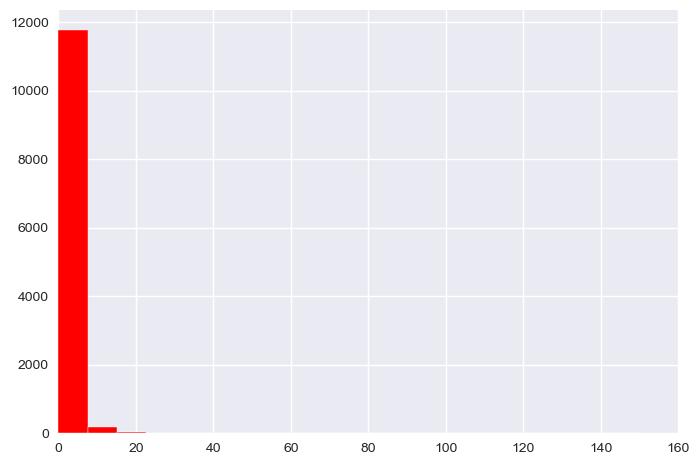

In [221]:
# Plotting histogram
plt.hist(df.Quantity, color = 'red', bins = 20, alpha = 1)
plt.xlim(0,160)

- The maximum value is 150.
- The data distribution is right-skewed.
- Most transactions typically involve lower quantities, with occasional instances of higher quantities.

In [226]:
# Maximum Final Cost
df.Final_Cost.max()

33178.0

(0.0, 3500.0)

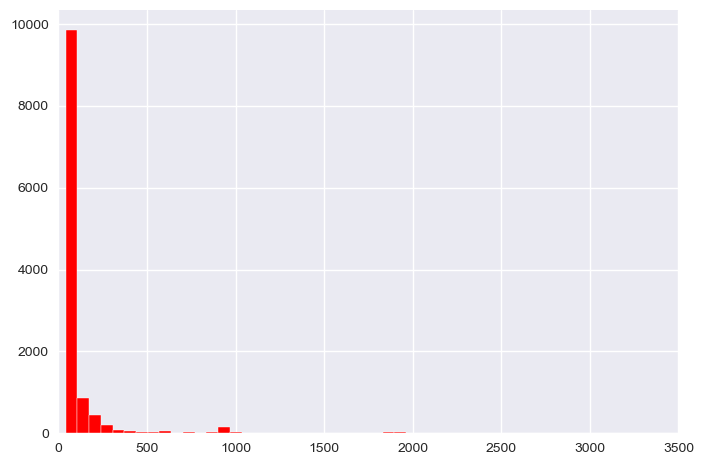

In [227]:
# Plotting histogram
plt.hist(df.Final_Cost, color = 'red', bins = 500, alpha = 1)
plt.xlim(0,3500)

- The maximum value is 33,178.
- The data distribution exhibits a right-skew.
- There are relatively few instances with significantly high final costs, which contribute to the extended tail on the right side of the distribution.

In [228]:
# Maximum Final Sales
df.Final_Sales.max()

39490.0

(0.0, 4000.0)

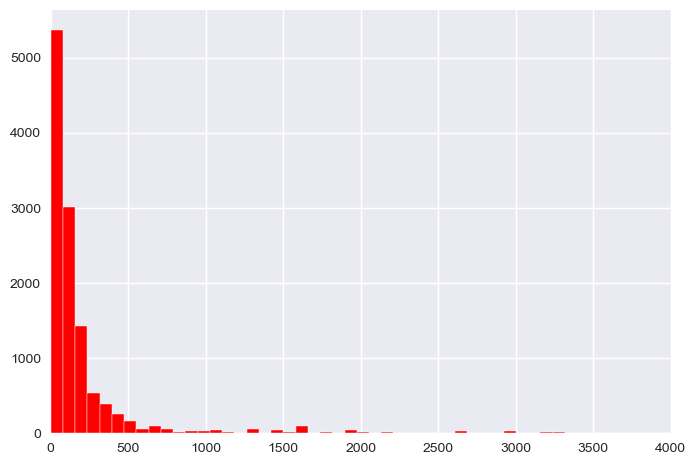

In [229]:
# Plotting histogram
plt.hist(df.Final_Sales, color = 'red', bins = 500, alpha = 1)
plt.xlim(0,4000)

- The maximum value is 39,490.
- The data distribution displays a right-skew.
- The majority of transactions are associated with lower sales amounts, although there are a few instances characterized by significantly higher sales amounts.

In [231]:
# Maximum Return Price
df.RtnMRP.max()

8014.0

(0.0, 1000.0)

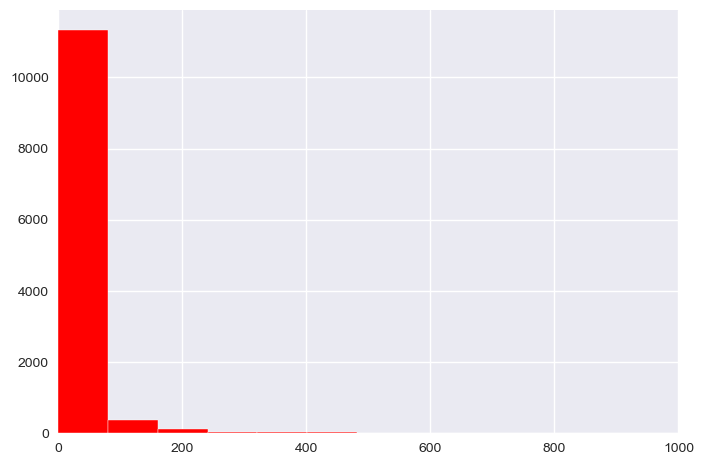

In [232]:
# Plotting histogram
plt.hist(df.RtnMRP, color = 'red', bins = 100, alpha = 1)
plt.xlim(0,1000)

- The maximum return value is 8,014.000.
- The data distribution exhibits a right-skew.
- While the majority of return values are lower, there are a few cases with notably higher return values.

### Data Distribution

((array([-3.85588901, -3.63323028, -3.5111029 , ...,  3.5111029 ,
          3.63323028,  3.85588901]),
  array([  0,   0,   0, ...,  90, 100, 150], dtype=int64)),
 (1.8851132236871413, 1.9238895358509394, 0.5272224099626615))

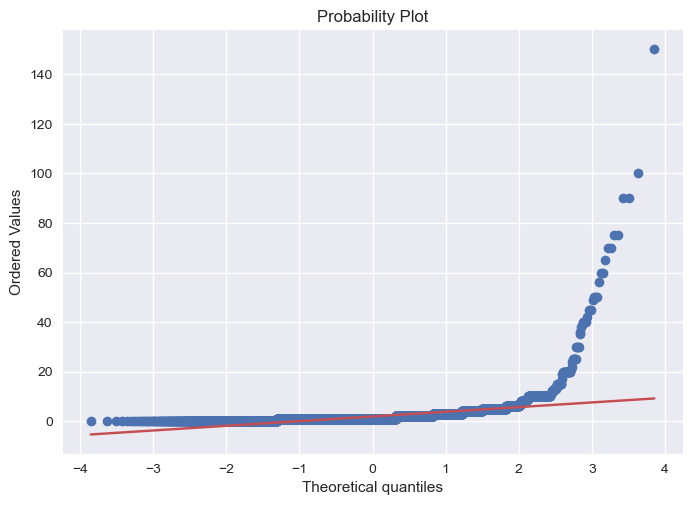

In [235]:
# Distribution of data
stats.probplot(df.Quantity, dist="norm", plot=pylab)

 - The deviation from a straight line in the Quantity data's probability plot suggests that the data does not follow a normal distribution.

### Data Transformation : Log Transformation

((array([-3.83127098, -3.60726351, -3.48433468, ...,  3.48433468,
          3.60726351,  3.83127098]),
  array([0.        , 0.        , 0.        , ..., 4.49980967, 4.60517019,
         5.01063529])),
 (0.5440132854895939, 0.45588835960227053, 0.8568708660823958))

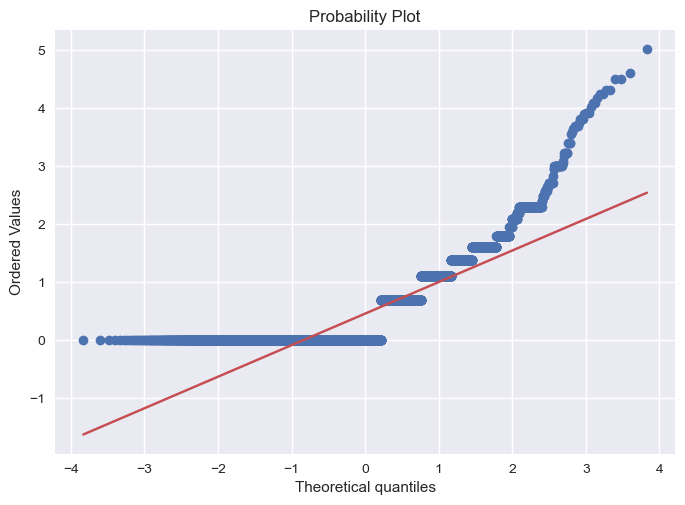

In [251]:
# Filter out zero and negative values
valid_quantity = df[df.Quantity > 0]['Quantity']
# Create the probability plot
stats.probplot(np.log(valid_quantity), dist="norm", plot=pylab)


 - The log transformation successfully normalized the data.

### Trend in Quantity

2023-10-22 19:59:00,268 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-10-22 19:59:00,272 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


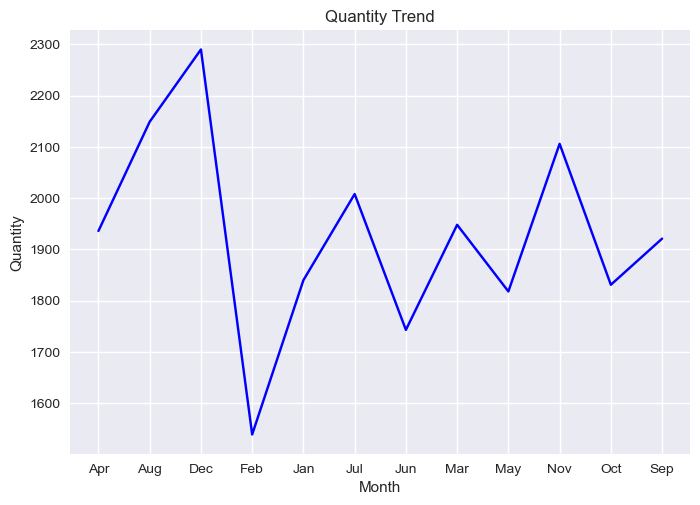

In [250]:
# Plotting linechart
Month = df.groupby('Month')['Quantity'].sum()
plt.plot(Month.index, Month.values, color = 'blue')
plt.title('Quantity Trend')
plt.xlabel('Month')
plt.ylabel('Quantity')

plt.show()

The data reveals that December records the highest quantity of medicines sold, whereas February and June exhibit the lowest sales figures.

# AUTO EDA USING  SWEETVIZ 

- Sweetviz is a library designed for generating detailed reports about your datasets.
- These reports include an overview of the dataset's general characteristics.
- Sweetviz provides insights into variable properties, including data types and sample values.
- It analyzes categorical associations, helping you understand how categorical variables relate to one another.
- For numerical features, Sweetviz offers valuable information about associations and statistics, such as the most frequent, smallest, and largest values.
- It simplifies data analysis and visualization, making it a valuable tool for data exploration and understanding your dataset.

In [26]:
# Installing 'sweetviz'
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


                                             |          | [  0%]   00:00 -> (? left)


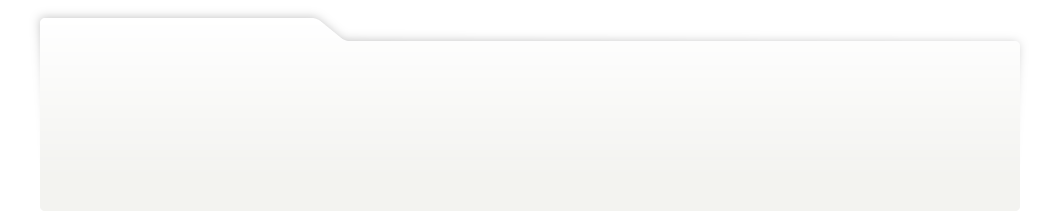
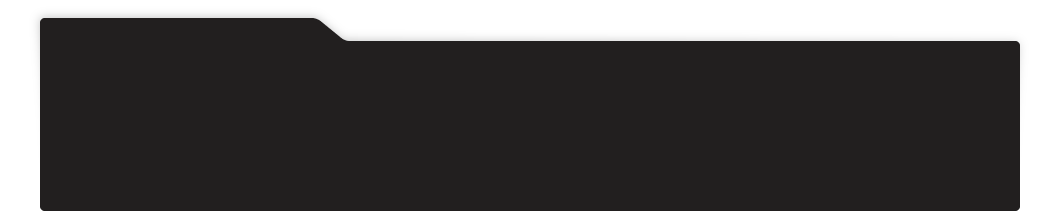
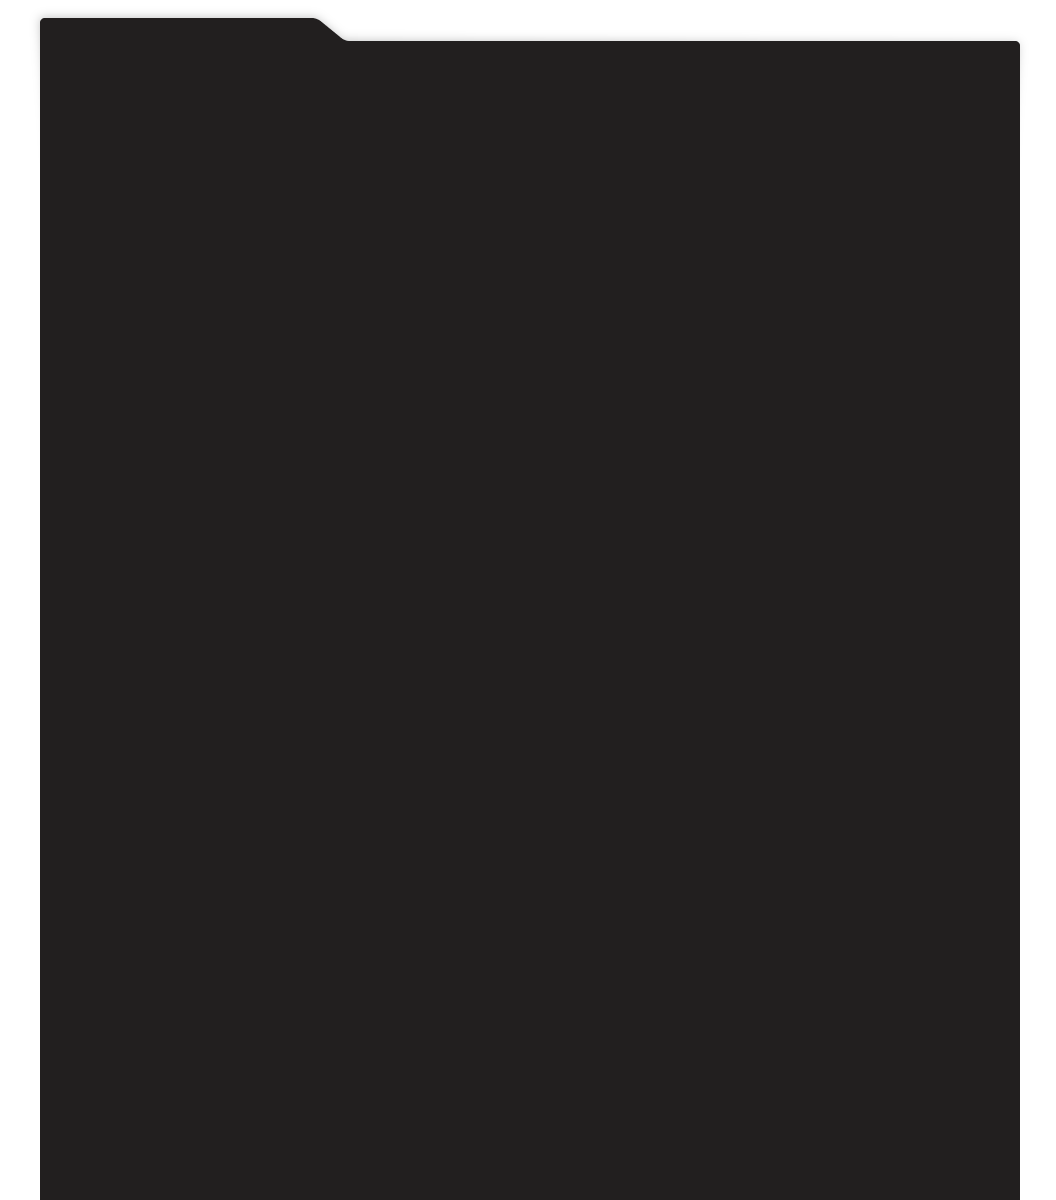
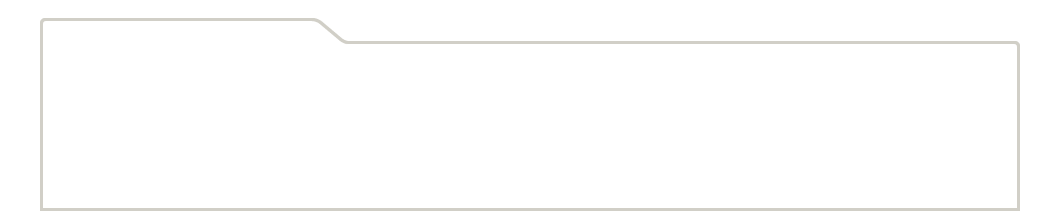
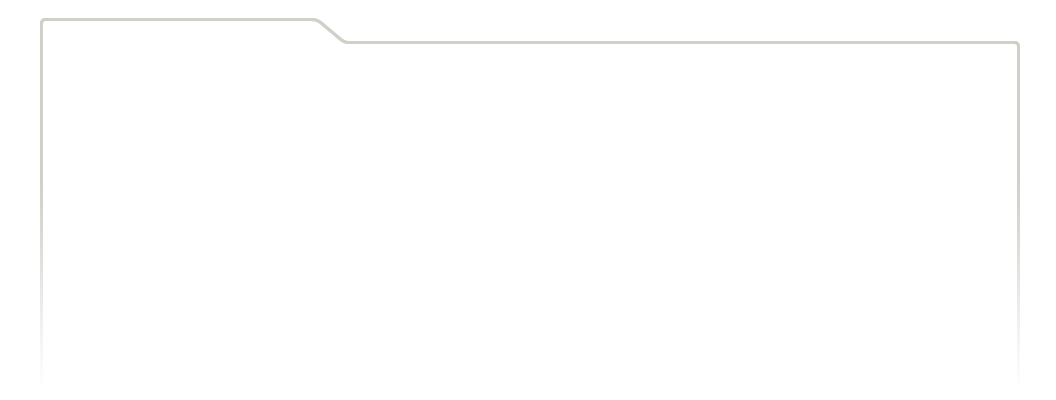
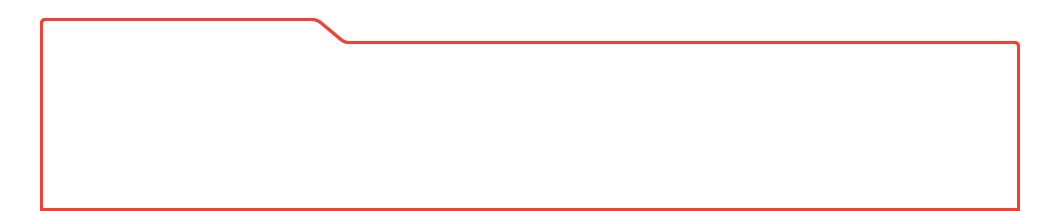
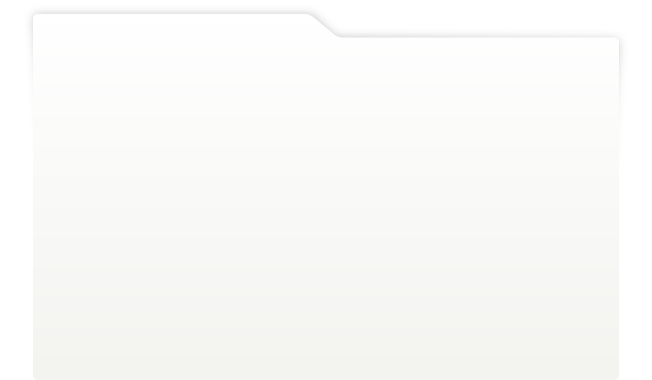
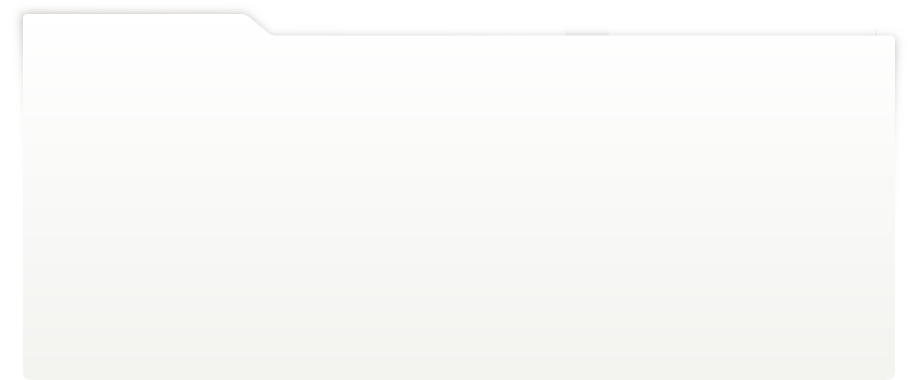
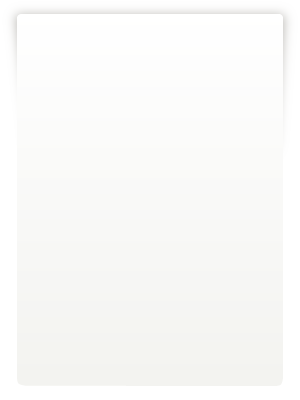
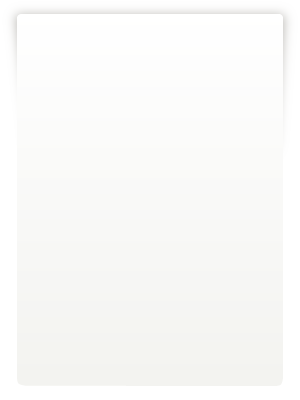
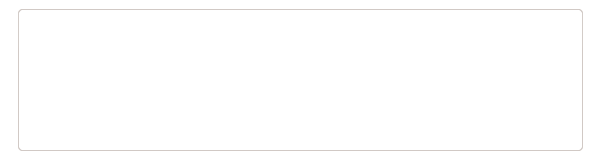
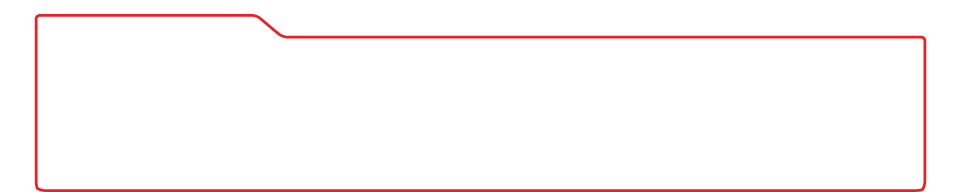
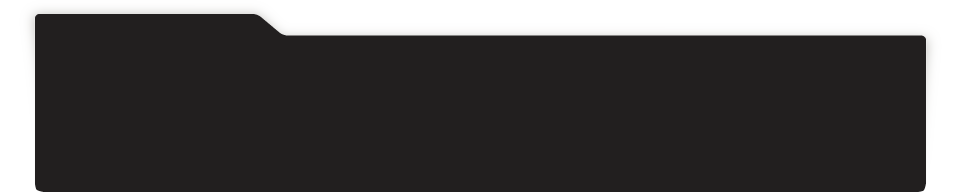
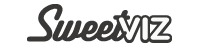
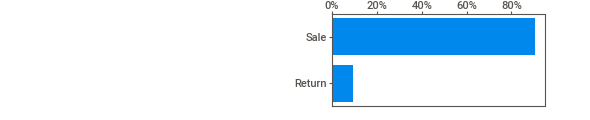
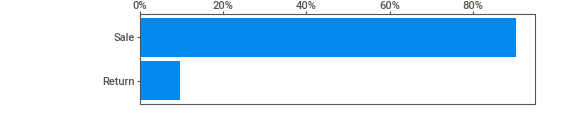
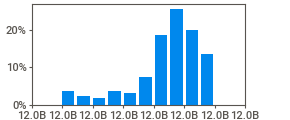
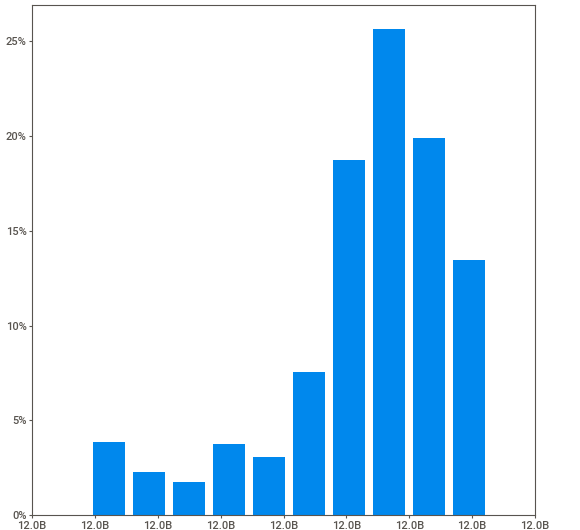
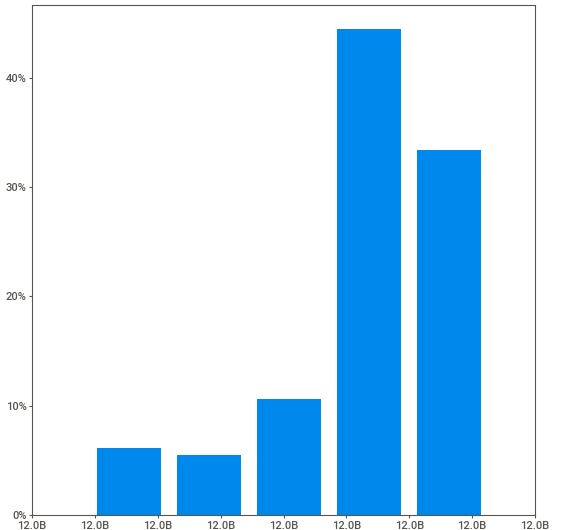
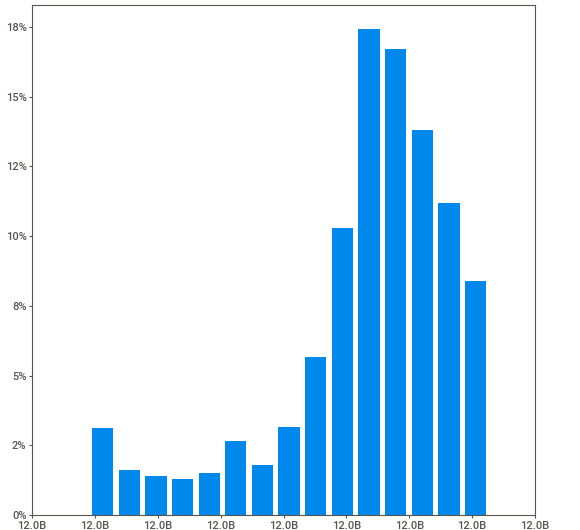
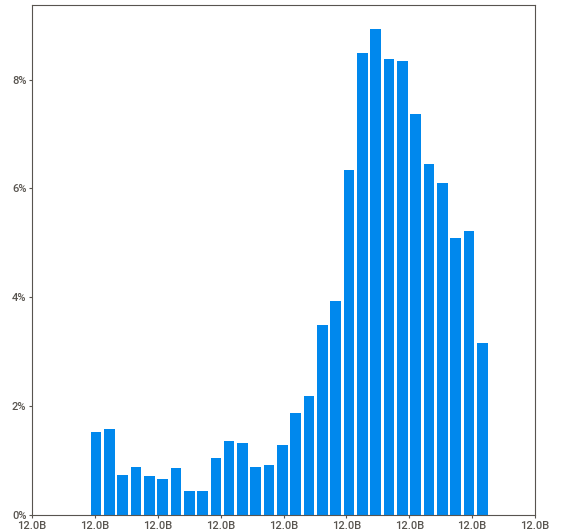
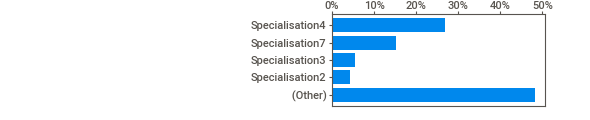
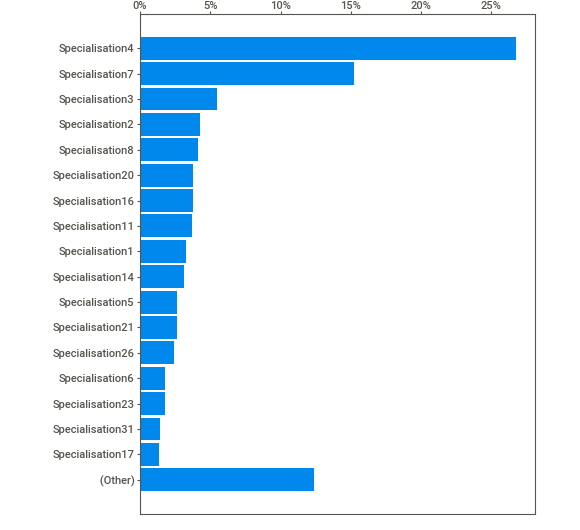
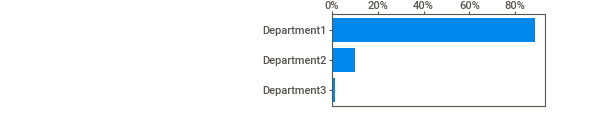
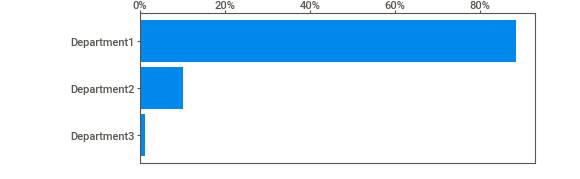
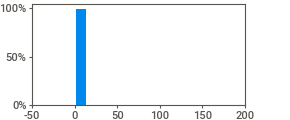
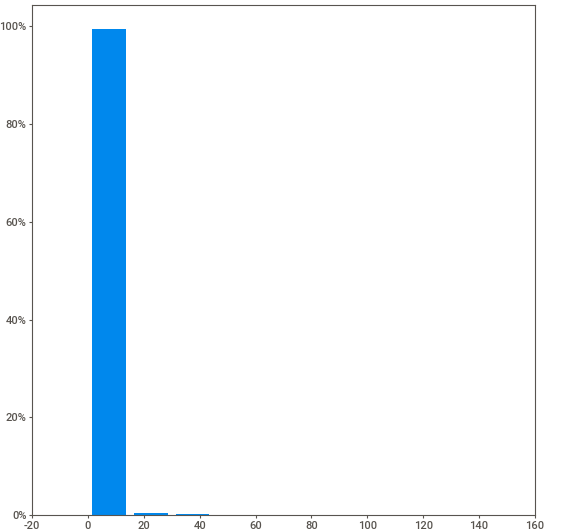
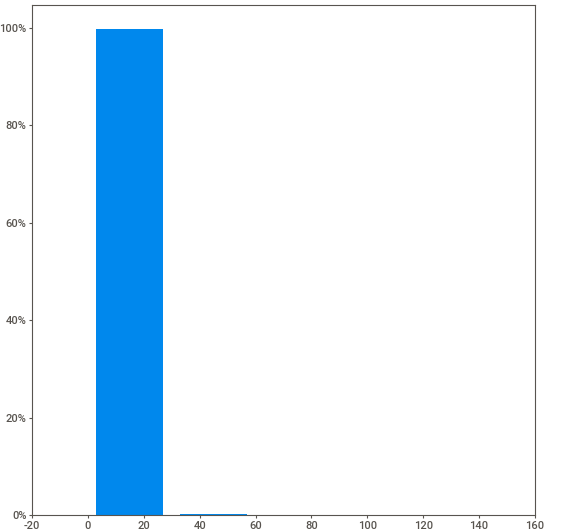
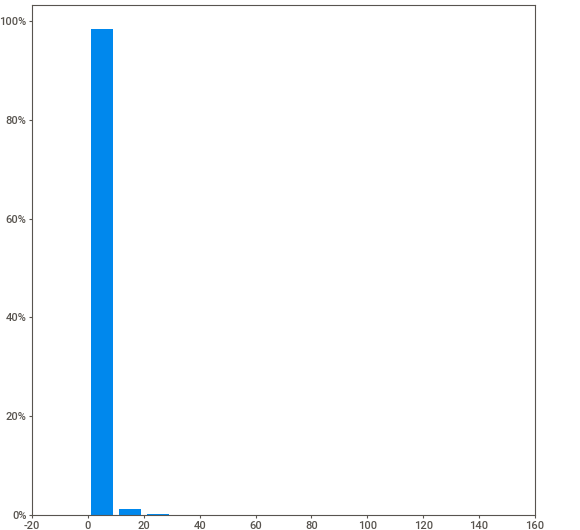
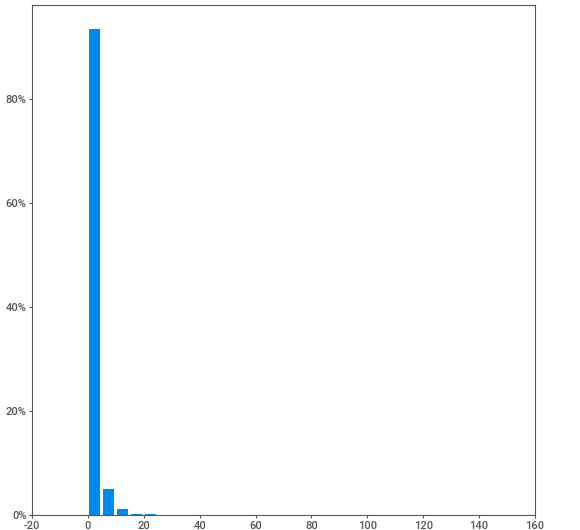
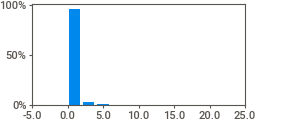
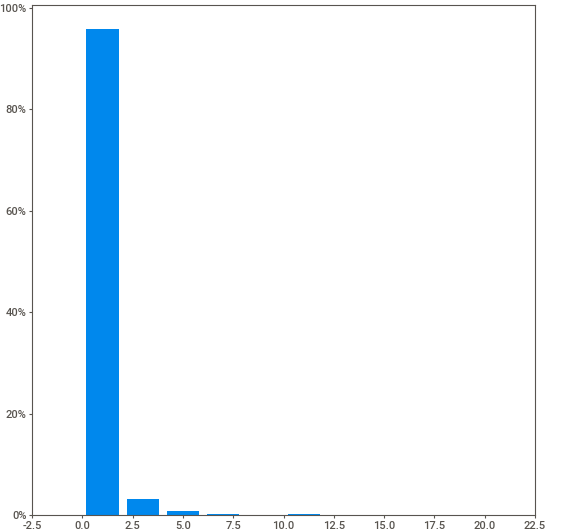
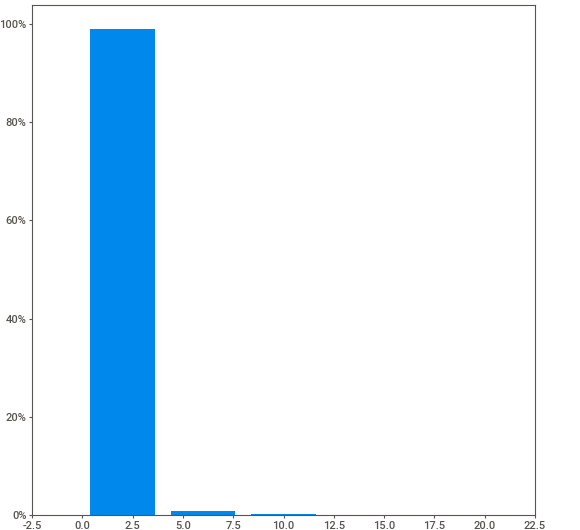
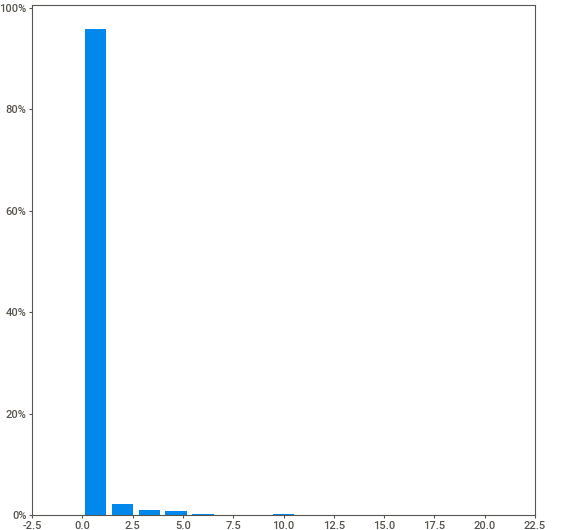
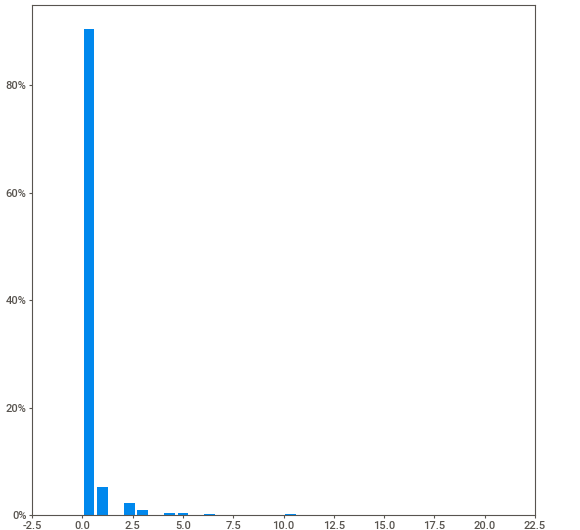
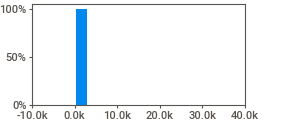
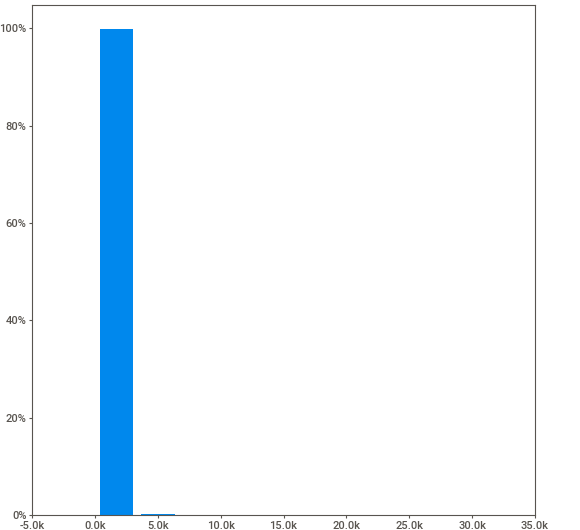
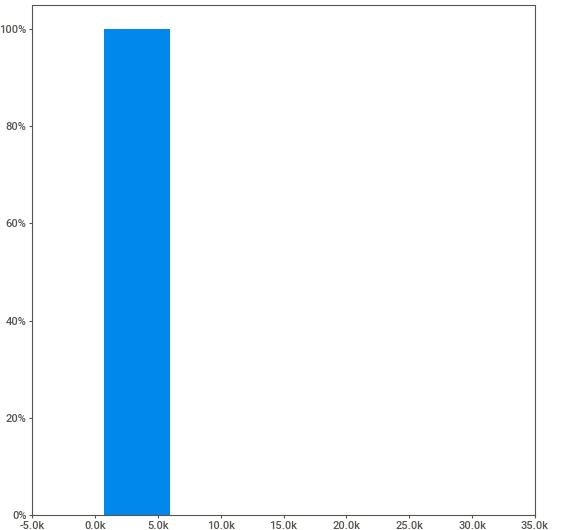
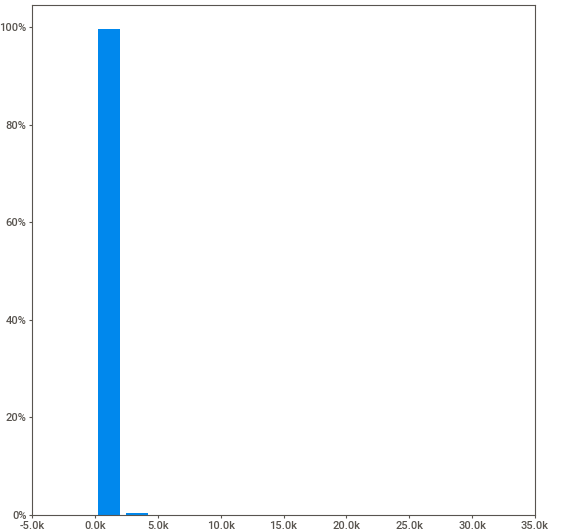
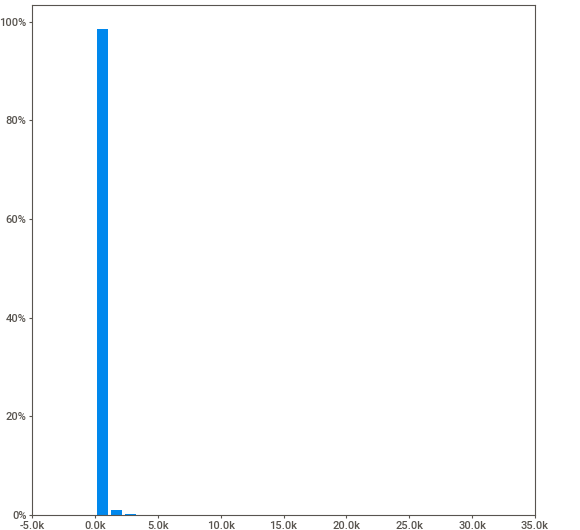
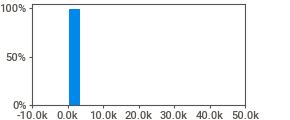
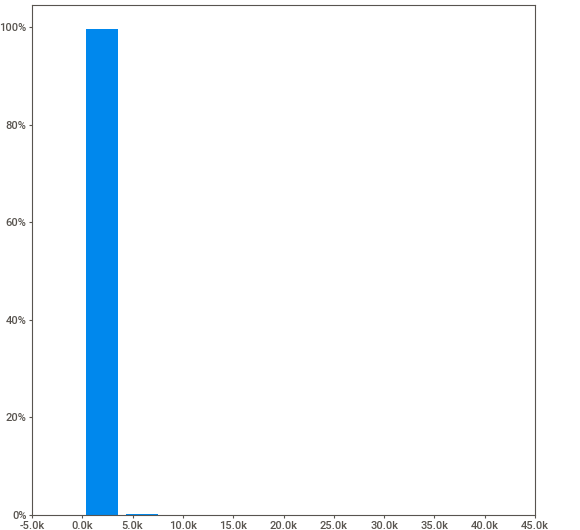
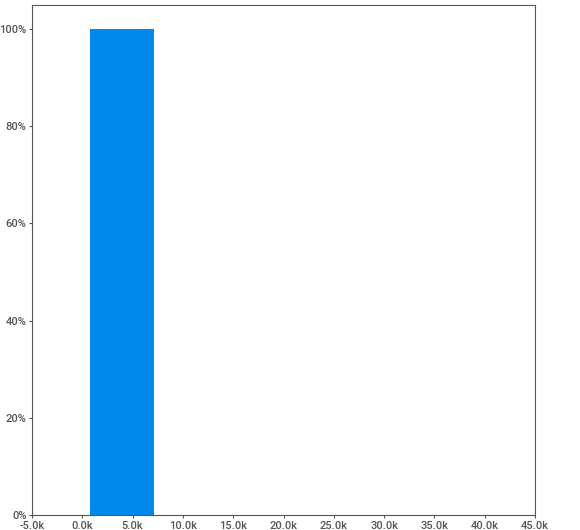
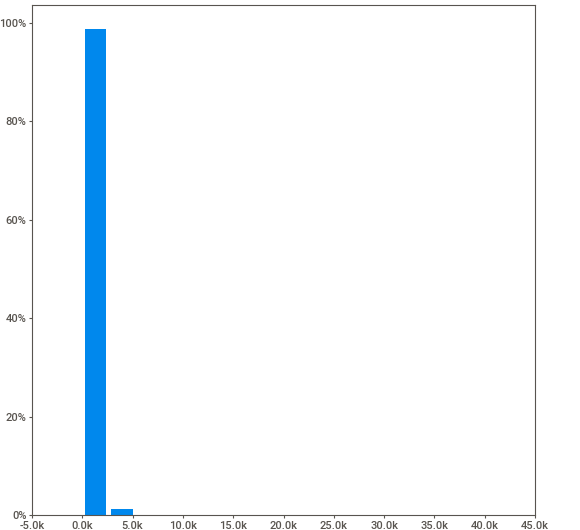
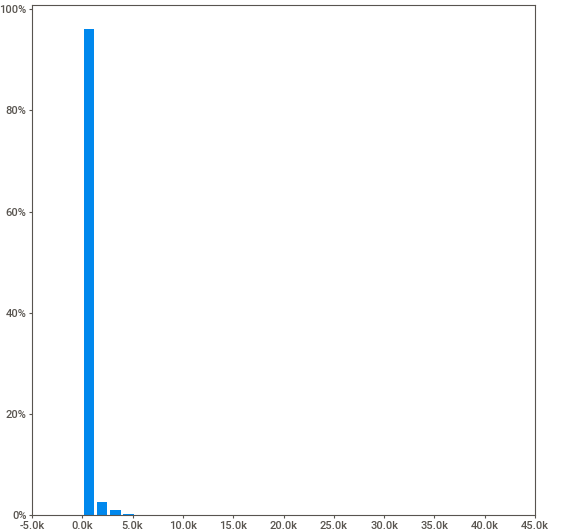
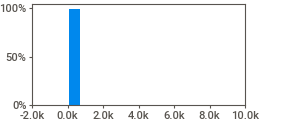
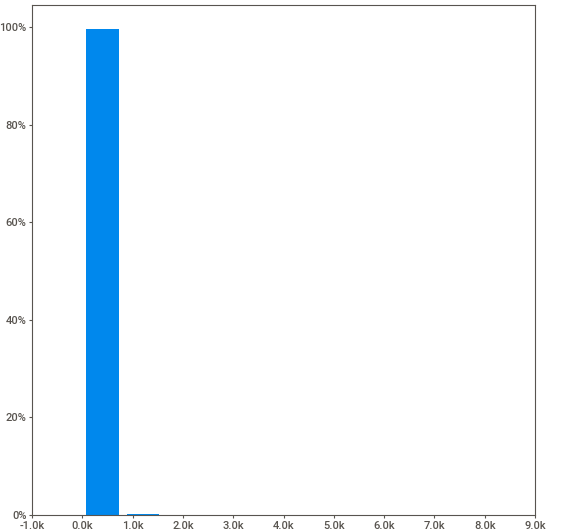
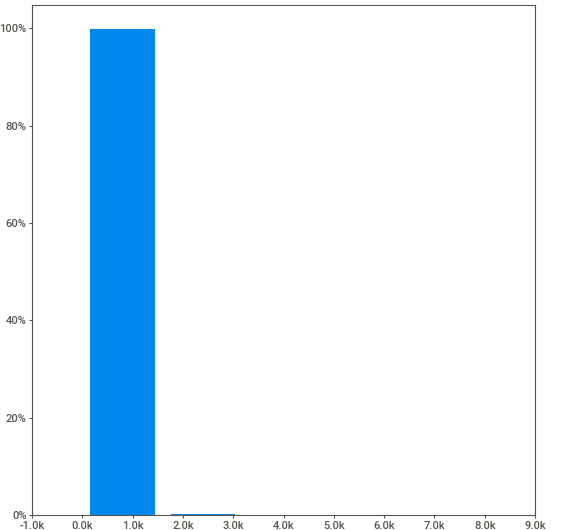
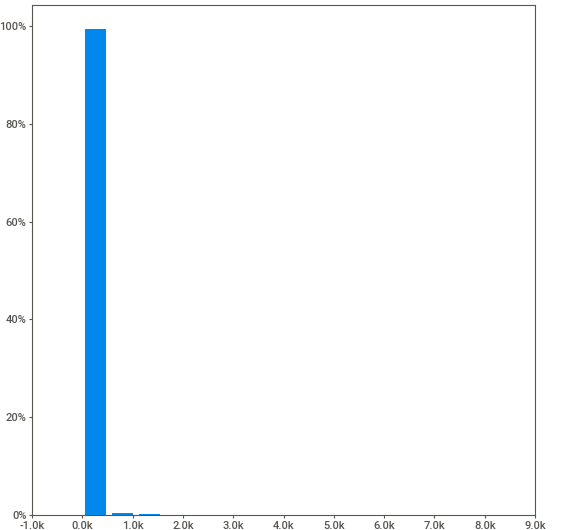
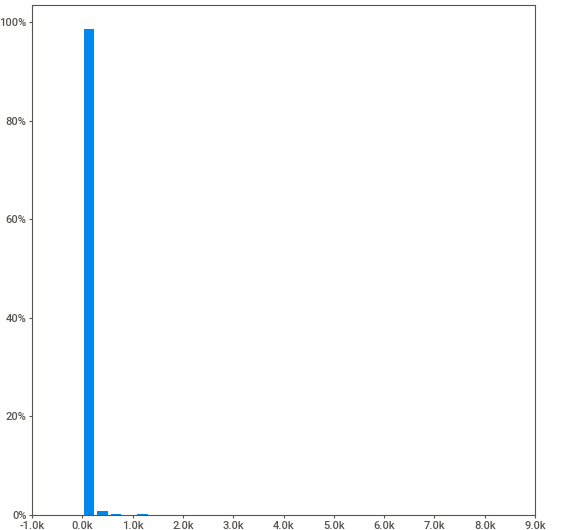
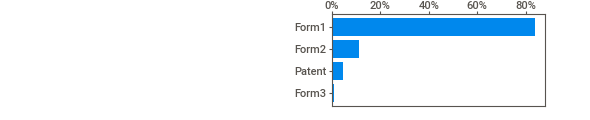
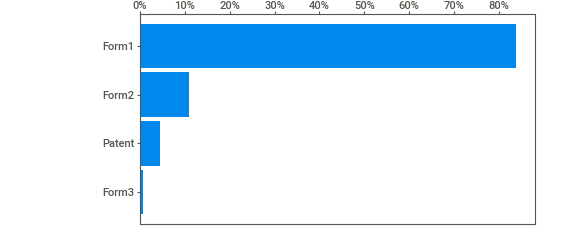
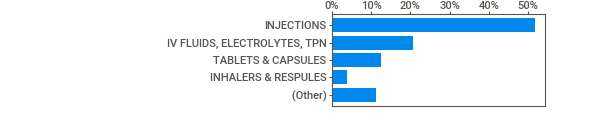
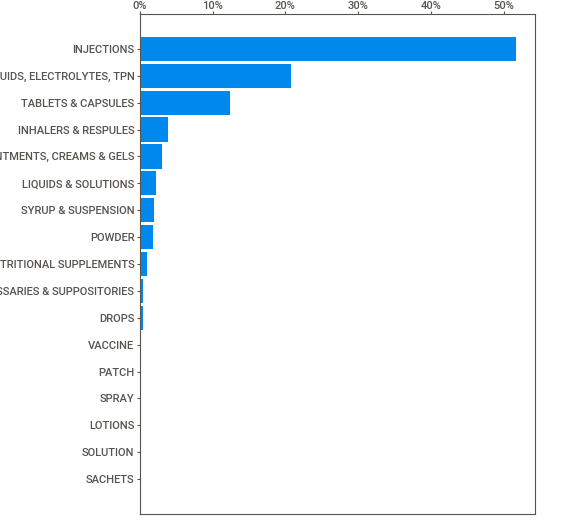
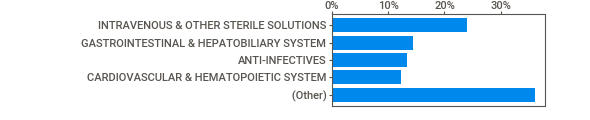
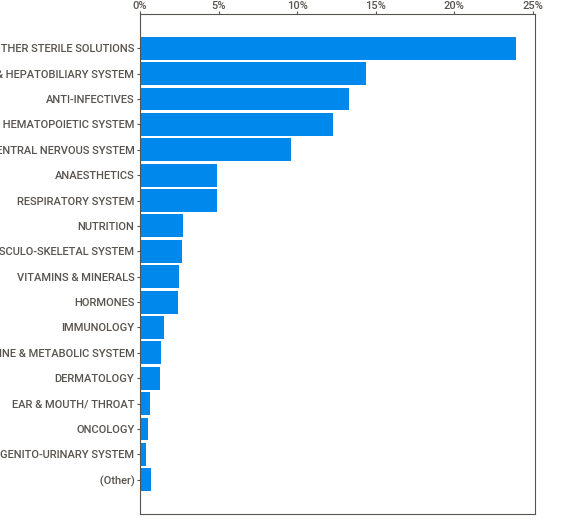
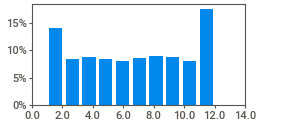
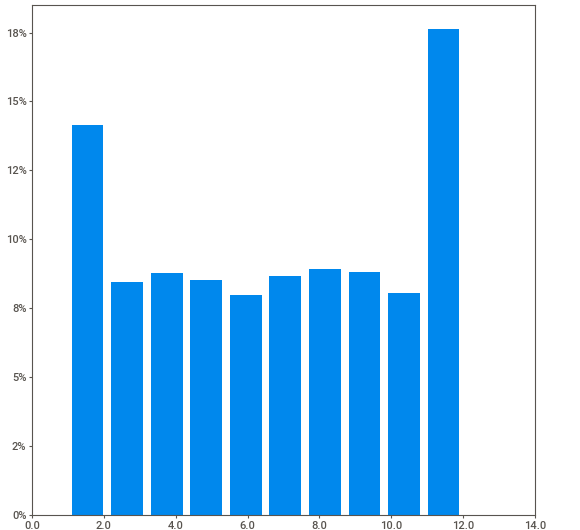
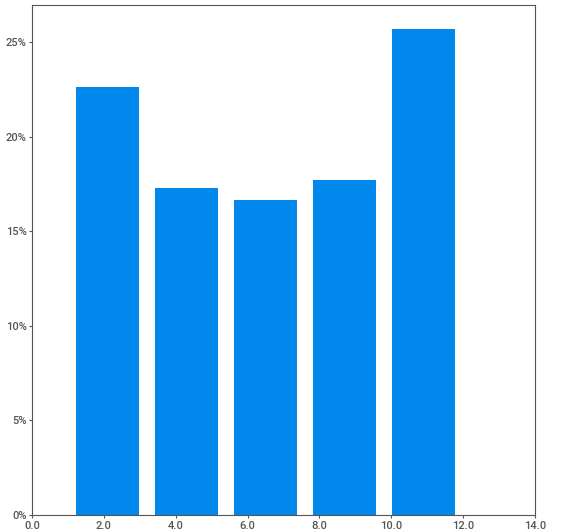
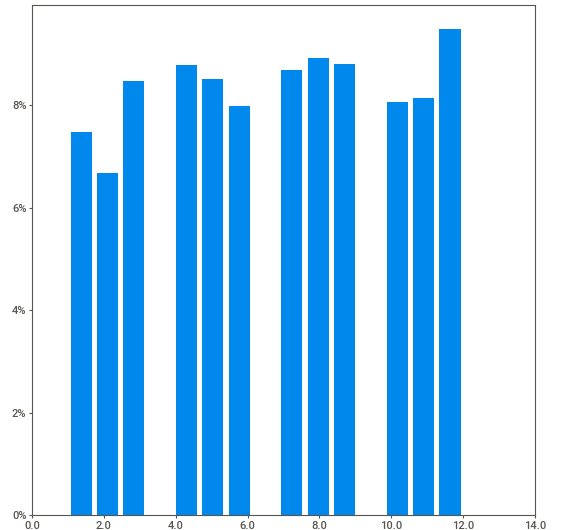
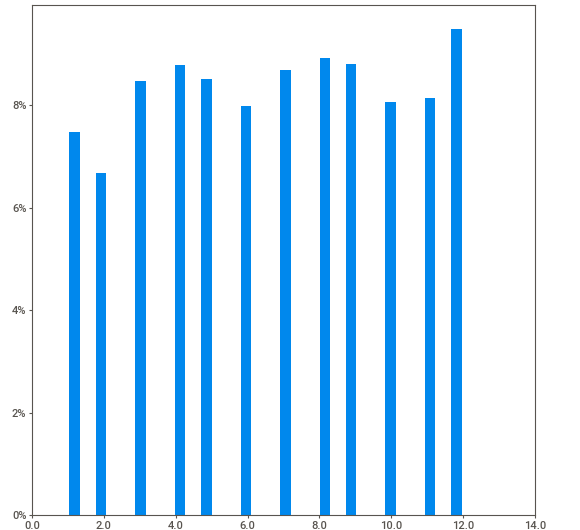
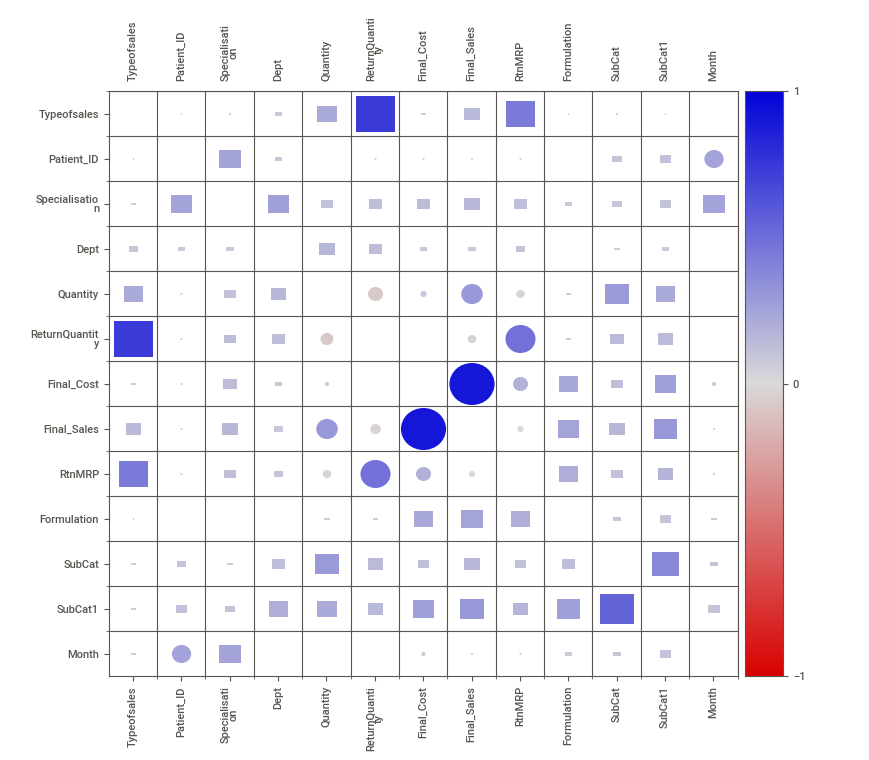
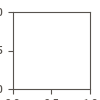

In [128]:
# Importing 'sweetviz'
import sweetviz as sv
s=sv.analyze(df)
s.show_notebook()

### AUTO EDA USING DTALE

- Dtale is a library used for generating interactive reports and visualizations of datasets.
- These reports include a comprehensive overview of the dataset's general characteristics and statistics.
- It provides insights into variable properties, such as data types, missing values, and unique values.
- Dtale enables in-depth data exploration and visualization with interactive plots, histograms, and correlation matrices.
- Users can filter, sort, and drill down into data to gain a deeper understanding of their datasets.
- It simplifies the process of data analysis, making it a valuable tool for both data scientists and analysts.

In [129]:
# Importing 'dtale'
import dtale
d = dtale.show(df)
d.open_browser()

# Top 20 Specialisations Based on FinalSales

In [30]:
# Filtering top 20 specialisation based upon final sales
pd.set_option('display.max_rows', 71) #to display maximum rows
pd.options.display.float_format = '{:.2f}'.format

top_spec_sales = df.groupby(['Specialisation'])['Final_Sales'].sum().reset_index()
top_spec_sales = top_spec_sales.sort_values(by='Final_Sales', ascending=False).head(20)

top_spec_sales

Specialisation  Final_Sales
29   Specialisation4    974209.02
51   Specialisation7    607712.82
54   Specialisation8    140787.21
21   Specialisation3    120148.47
12  Specialisation20    107067.08
11   Specialisation2     84788.65
7   Specialisation16     80522.92
18  Specialisation26     78773.46
0    Specialisation1     72874.84
38   Specialisation5     67785.38
13  Specialisation21     65389.95
15  Specialisation23     63028.47
5   Specialisation14     48284.55
2   Specialisation11     46661.56
8   Specialisation17     40498.33
46   Specialisation6     35121.29
22  Specialisation31     30388.98
23  Specialisation33     19095.99
6   Specialisation15     16790.99
31  Specialisation41     15564.65

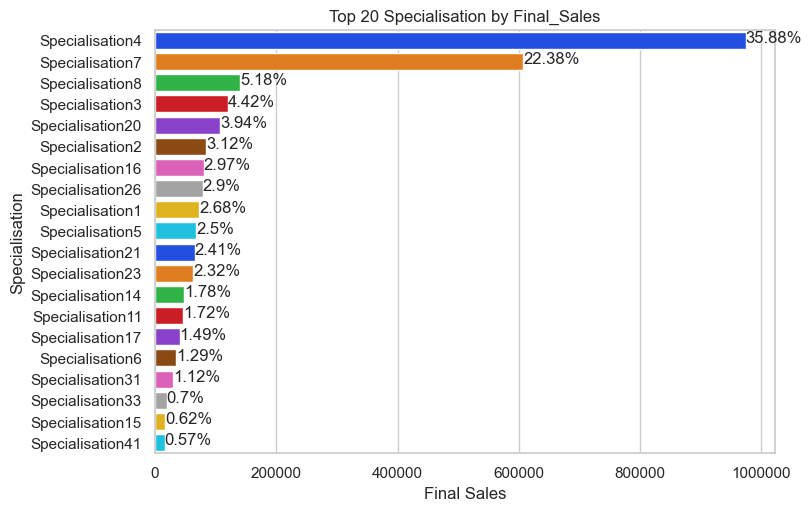

In [145]:
'''
This code creates a bar plot using Seaborn and Matplotlib to visualize the top 20 specializations based on
their total final sales. 
'''
# Plotting barplot
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by SpecialisationName and sum the NetSales
top_spec_sales = df.groupby(['Specialisation'])['Final_Sales'].sum().reset_index()

# Sort the data by NetSales in descending order and select the top 20 rows
top_spec_sales = top_spec_sales.sort_values(by='Final_Sales', ascending=False).head(20)

# Create the barplot
sns.set(style="whitegrid")
ax = sns.barplot(x='Final_Sales', y='Specialisation', data=top_spec_sales, palette='bright')

# Add labels and title
plt.xlabel('Final Sales')
plt.ylabel('Specialisation')
plt.title('Top 20 Specialisation by Final_Sales')


# Add the percentage labels to the bars
for i, v in enumerate(top_spec_sales['Final_Sales']):
    ax.text(v + 0.5, i + 0.1, str(round((v/top_spec_sales['Final_Sales'].sum())*100,2)) + '%')

# Show the plot
plt.show()

### Sub-Categories and Final Sales

In [132]:
# Filtering subcategories and final sales
pd.set_option('display.max_rows', 71) #to display maximum rows
pd.options.display.float_format = '{:.2f}'.format

SubCat = df.groupby(['SubCat'])['Final_Sales'].sum().reset_index()
SubCat = SubCat.sort_values(by='Final_Sales', ascending=False).head(20)

SubCat

SubCat  Final_Sales
2                     INJECTIONS   1813878.48
3   IV FLUIDS, ELECTROLYTES, TPN    629414.06
15            TABLETS & CAPSULES    159012.80
4            LIQUIDS & SOLUTIONS     93688.03
1            INHALERS & RESPULES     64724.28
10                        POWDER     27103.70
6        NUTRITIONAL SUPPLEMENTS     25970.20
7       OINTMENTS, CREAMS & GELS     21526.29
14            SYRUP & SUSPENSION     16755.93
9      PESSARIES & SUPPOSITORIES      3721.80
0                          DROPS      2846.31
8                          PATCH      1289.90
16                       VACCINE      1009.59
13                         SPRAY       783.00
5                        LOTIONS       404.37
12                      SOLUTION       267.00
11                       SACHETS       219.43

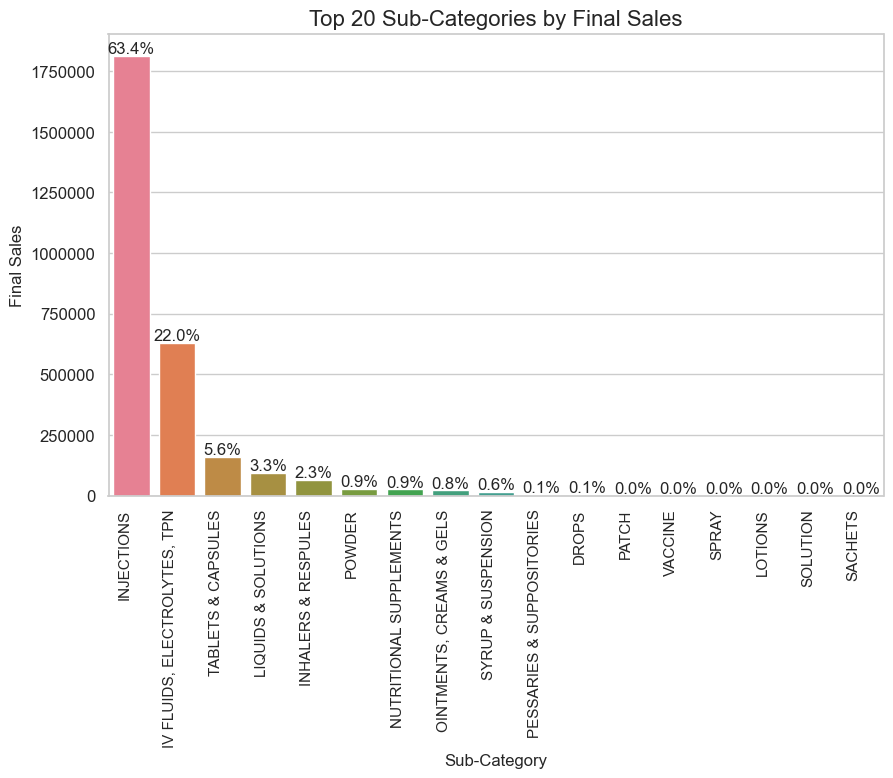

In [144]:
'''
This code calculates and visualizes the top 20 subcategories based on their final sales, along with the 
percentage of net sales each subcategory contributes.
'''
# Plotting barplot
# Calculate the percentage of NetSales for each subcategory
SubCat['NetSales_percentage'] = SubCat['Final_Sales'] / SubCat['Final_Sales'].sum() * 100

# Create a barplot
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x='SubCat', y='Final_Sales', data=SubCat, palette='husl')

# Add NetSales percentage after the bars
for i, p in enumerate(ax.patches):
    ax.annotate('{:.1f}%'.format(SubCat['NetSales_percentage'].values[i]), 
                (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')
    
# Set x-axis label and rotate x-axis tick labels
plt.xlabel('Sub-Category', fontsize=12)
plt.xticks(rotation=90, ha='right')

# Set y-axis label and format y-axis ticks
plt.ylabel('Final Sales', fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.ticklabel_format(style='plain', axis='y')

# Set plot title
plt.title('Top 20 Sub-Categories by Final Sales', fontsize=16)

plt.show()

# Sub-Category 1 wise Final Sales

In [36]:
pd.set_option('display.max_rows', 71) #to display maximum rows
pd.options.display.float_format = '{:.2f}'.format

SubCat1 = df.groupby(['SubCat1'])['Final_Sales'].sum().reset_index()
SubCat1 = SubCat1.sort_values(by='Final_Sales', ascending=False).head(20)

SubCat1

SubCat1  Final_Sales
1                           ANTI-INFECTIVES   1008195.83
13    INTRAVENOUS & OTHER STERILE SOLUTIONS    711443.16
4     CARDIOVASCULAR & HEMATOPOIETIC SYSTEM    207402.39
5                    CENTRAL NERVOUS SYSTEM    163520.05
9   GASTROINTESTINAL & HEPATOBILIARY SYSTEM    145328.96
0                              ANAESTHETICS    122732.94
12                               IMMUNOLOGY     91082.76
19                       RESPIRATORY SYSTEM     83001.34
17                                 ONCOLOGY     73693.52
11                                 HORMONES     67296.41
16                                NUTRITION     54614.80
15                  MUSCULO-SKELETAL SYSTEM     53135.99
20                      VITAMINS & MINERALS     27185.95
8              ENDOCRINE & METABOLIC SYSTEM     15231.70
3       CARDIIVASCULAR&HEMATOPOIETIC SYSTEM     13650.00
6                               DERMATOLOGY     11021.26
7                       EAR & MOUTH/ THROAT      4852.25
10                    GENITO-URINARY SYSTEM      4313.45
14                            MISCELLANEOUS      2148.00
18                            OPHTHALMOLOGY      2006.28

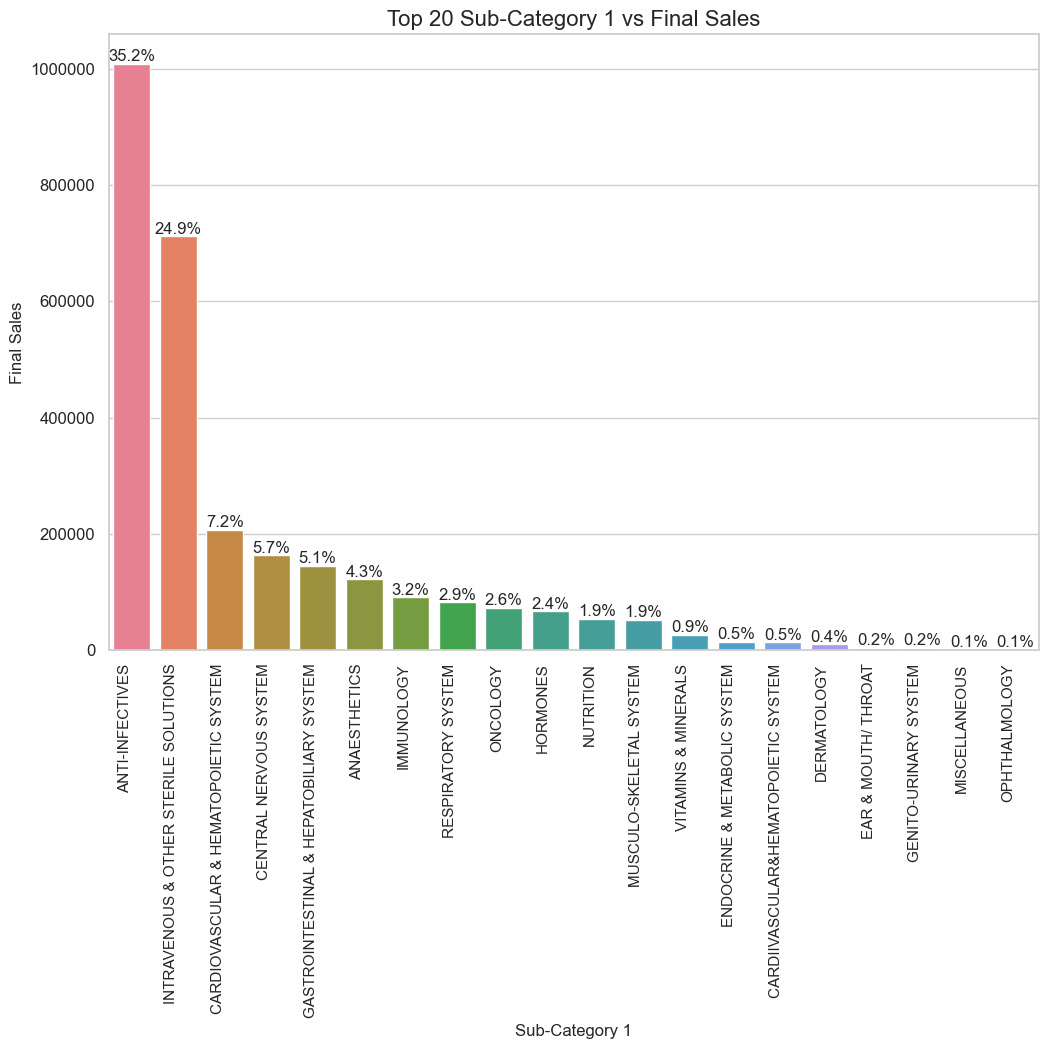

In [142]:
'''
This code calculates the percentage of NetSales for each subcategory (SubCat1) and creates a barplot
to visualize the distribution of Final Sales in the top 20 subcategories. 
'''
# Plotting barplot
# Calculate the percentage of NetSales for each subcategory
SubCat1['NetSales_percentage'] = SubCat1['Final_Sales'] / SubCat1['Final_Sales'].sum() * 100

# Create a barplot
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
ax = sns.barplot(x='SubCat1', y='Final_Sales', data=SubCat1, palette='husl')

# Add NetSales percentage after the bars
for i, p in enumerate(ax.patches):
    ax.annotate('{:.1f}%'.format(SubCat1['NetSales_percentage'].values[i]), 
                (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')
    
# Set x-axis label and rotate x-axis tick labels
plt.xlabel('Sub-Category 1', fontsize=12)
plt.xticks(rotation=90, ha='right')

# Set y-axis label and format y-axis ticks
plt.ylabel('Final Sales', fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.ticklabel_format(style='plain', axis='y')

# Set plot title
plt.title('Top 20 Sub-Category 1 vs Final Sales', fontsize=16)

plt.show()

### Formulary wise Final Sales

In [39]:
pd.set_option('display.max_rows', 71) #to display maximum rows
pd.options.display.float_format = '{:.2f}'.format

Formulary = df.groupby(['Formulation'])['Final_Sales'].sum().reset_index()
Formulary = Formulary.sort_values(by='Final_Sales', ascending=False)

Formulary

Formulation  Final_Sales
0       Form1   2050230.63
3      Patent    465381.97
1       Form2    285578.25
2       Form3     61424.30

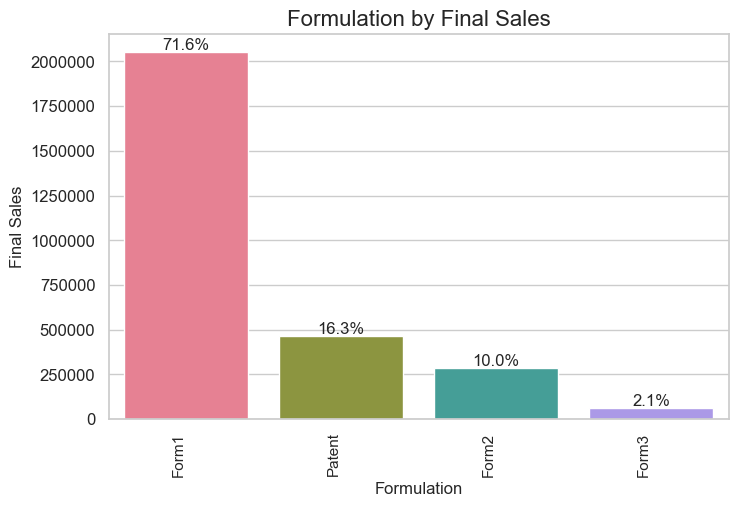

In [143]:
'''
This code calculates the percentage of NetSales for each formulary and creates a barplot to visualize the
distribution of Final Sales across different formulations. 
'''
# Plotting barplot
# Calculate the percentage of NetSales for each formulary
Formulary['NetSales_percentage'] = Formulary['Final_Sales'] / Formulary['Final_Sales'].sum() * 100

# Create a barplot
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Formulation', y='Final_Sales', data=Formulary, palette='husl')

# Add NetSales percentage after the bars
for i, p in enumerate(ax.patches):
    ax.annotate('{:.1f}%'.format(Formulary['NetSales_percentage'].values[i]), 
                (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')
    
# Set x-axis label and rotate x-axis tick labels
plt.xlabel('Formulation', fontsize=12)
plt.xticks(rotation=90, ha='right')

# Set y-axis label and format y-axis ticks
plt.ylabel('Final Sales', fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.ticklabel_format(style='plain', axis='y')

# Set plot title
plt.title('Formulation by Final Sales', fontsize=16)

plt.show()

# FSN (Fast, Slow, Non-Moving) Inventory Analysis


1. **Calculating Average Daily Sales Velocity:** The code begins by processing pharmaceutical sales data, first converting date columns into a consistent format. It then computes the total duration of the dataset by finding the difference between the start and end dates. The primary objective is to determine the average daily sales velocity for each drug, which is achieved by dividing the total sales by the number of days in the dataset. This metric provides insights into how much of a drug is sold, on average, per day, a crucial performance indicator for businesses.

2. **Sorting Drugs by Performance:** The code sorts the drugs based on their average daily sales velocity, presenting them in descending order. This sorting operation reveals which drugs are top performers in terms of daily sales. Such information is vital for inventory management, marketing strategies, and identifying star products within the pharmaceutical portfolio.

3. **Categorization and Visualization:** To offer a comprehensive view of the dataset, the code categorizes drugs into three groups: fast-moving, slow-moving, and not-moving drugs. The categorization criteria are adaptable to meet specific business requirements. Finally, the code visualizes the top fast-moving drugs using a colorful bar chart. Each bar represents a different drug, with drug names on the y-axis and average weekly sales velocity on the x-axis. This visualization offers a quick, easy-to-interpret overview of the highest-performing drugs, aiding in data-driven decision-making for pharmaceutical businesses.

**Fast Moving Category Drugs which AvgWeeklyVelocity is greater then and equal to 10**

In [42]:
'''
This code analyzes pharmaceutical sales data to identify the top-performing drugs based on their average weekly 
sales velocity. It calculates the total sales for each drug, determines their weekly sales rate, and categorizes 
them as fast-moving, slow-moving, or not-moving. The results reveal the highest-velocity drugs, aiding businesses
in optimizing inventory and marketing strategies. Adjusting the velocity thresholds allows for customized insights
into drug performance.
'''
# Calculate the total sales for each drug
total_sales = df.groupby('DrugName')['Quantity'].sum().reset_index()

# Calculate the average weekly sales velocity for each drug
start_date = pd.to_datetime('01/01/2022')
end_date = pd.to_datetime('12/31/2022')
num_weeks = int(np.ceil((end_date - start_date).days / 7))
total_sales['AvgWeeklyVelocity'] = total_sales['Quantity'] / num_weeks

# Sort the drugs by their average weekly sales velocity
sorted_drugs = total_sales.sort_values('AvgWeeklyVelocity', ascending=False)

# Categorize the drugs based on their average weekly sales velocity
fast_moving = sorted_drugs[sorted_drugs['AvgWeeklyVelocity'] >= 10]  # Adjust the threshold as needed
slow_moving = sorted_drugs[(sorted_drugs['AvgWeeklyVelocity'] >= 1) & (sorted_drugs['AvgWeeklyVelocity'] < 10)]  # Adjust the threshold as needed
not_moving = sorted_drugs[sorted_drugs['AvgWeeklyVelocity'] < 1]

# Output the results
fast_moving.head(10)

DrugName  Quantity  AvgWeeklyVelocity
649                    SODIUM CHLORIDE IVF 100ML      1278              24.58
631                           SEVOFLURANE 99.97%      1193              22.94
644                         SODIUM CHLORIDE 0.9%       942              18.12
507                           ONDANSETRON 2MG/ML       931              17.90
469              MULTIPLE ELECTROLYTES 500ML IVF       919              17.67
734            WATER FOR INJECTION 10ML SOLUTION       871              16.75
384  LEVOSALBUTAMOL/LEVALBUTEROL 0.63MG RESPULES       604              11.62
526                        PANTOPRAZOLE 40MG INJ       594              11.42
534                       PARACETAMOL 1GM IV INJ       593              11.40
498                        NORADRENALINE 2ML INJ       553              10.63

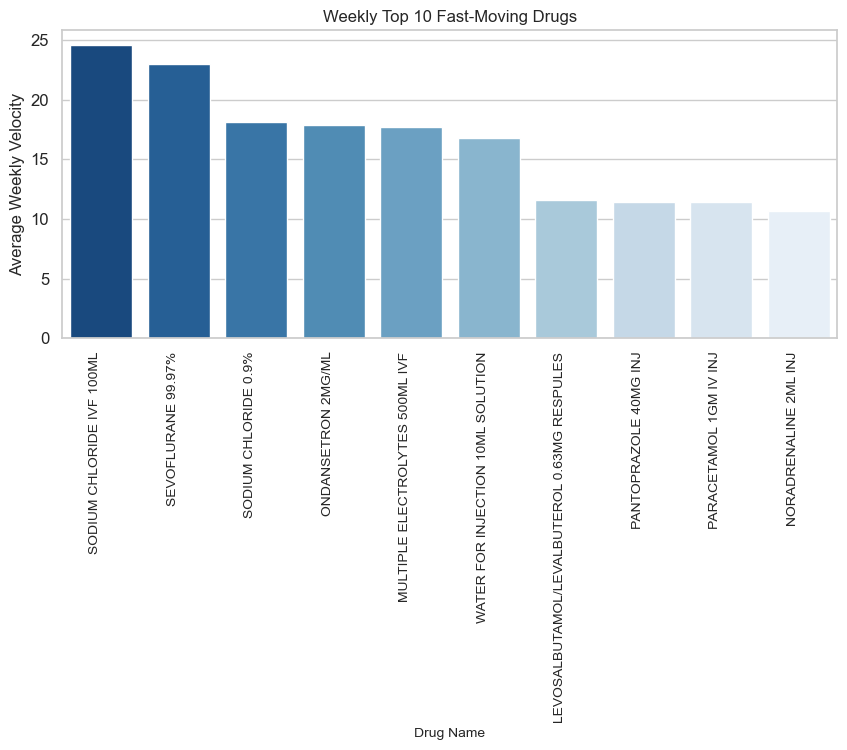

In [139]:
'''
This code selects the top 10 fast-moving drugs based on their average weekly sales velocity and visualizes
them with a horizontal bar hart. The chart displays the drug names on the y-axis and their corresponding
average weekly sales velocities on the x-axis, allowing for a quick and clear overview of the highest-performing
pharmaceuticals in terms of weekly sales velocity.
'''
# Plotting barplot
# Subset the top 10 fast-moving drugs
fast_moving = sorted_drugs[sorted_drugs['AvgWeeklyVelocity'] >= 10].head(10)

# Create a bar chart
sns.set_style('whitegrid')
plt.figure(figsize=(10, 4))
sns.barplot(x='DrugName', y='AvgWeeklyVelocity', data=fast_moving, palette='Blues_r')
plt.title('Weekly Top 10 Fast-Moving Drugs', fontsize=12)
plt.xlabel('Drug Name', fontsize=10)
plt.ylabel('Average Weekly Velocity', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.show()

**Slow Moving category Drugs which Avergae Weekly Velocity is greater than or equal to 1**

In [146]:
# Filtering slow moving drugs
slow_moving = sorted_drugs[(sorted_drugs['AvgWeeklyVelocity'] >= 1) & (sorted_drugs['AvgWeeklyVelocity'] < 10)]  # Adjust the threshold as needed
slow_moving

DrugName  Quantity  AvgWeeklyVelocity
630                      SEVOFLURANE       470               9.04
422                MEROPENEM 1GM INJ       344               6.62
9                 ADRENALINE INJ 1ML       314               6.04
625                 SALBUTAMOL 2.5MG       285               5.48
390  LIGNOCAINE HYDROCHLORIDE 2% INJ       275               5.29
..                               ...       ...                ...
106                  CEFAZOLIN 500MG        55               1.06
666               TACROLIMUS 1MG CAP        54               1.04
651  SODIUM PHOSPHATE 1.963GM POWDER        53               1.02
181               DICLOFENAC 1ML INJ        52               1.00
116  CEFTAZIDIME 2GM+AVIBACTAM 500MG        52               1.00

[75 rows x 3 columns]

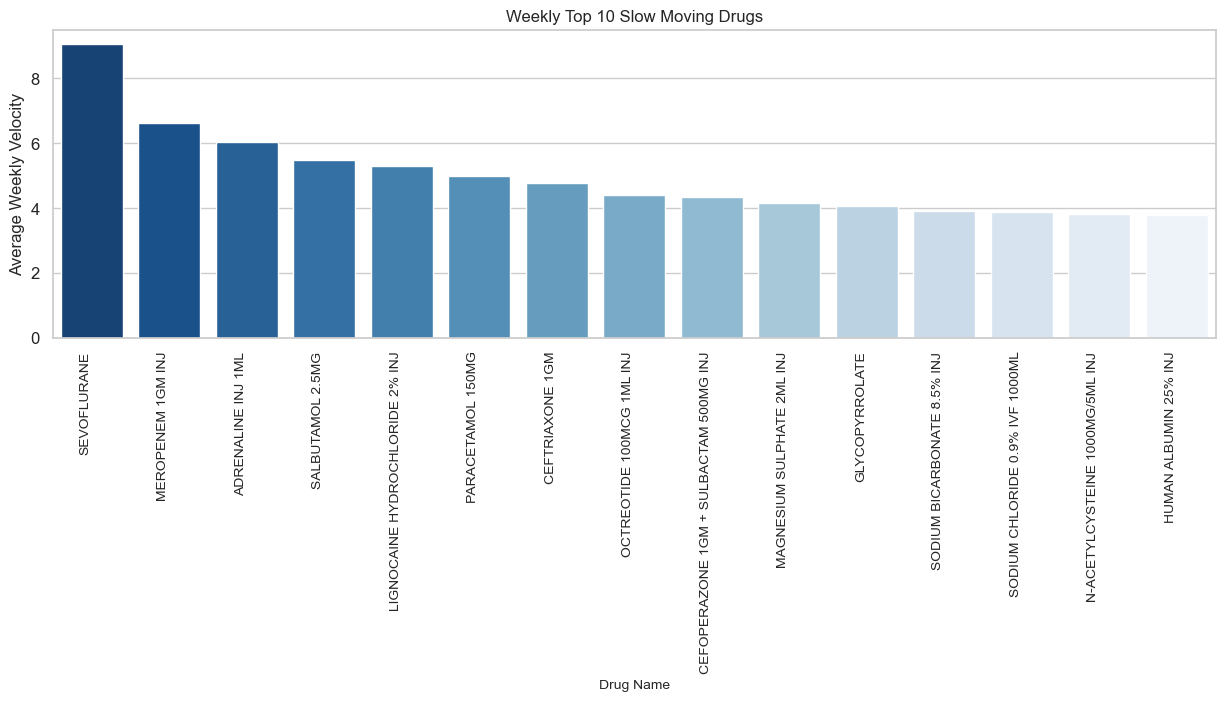

In [151]:
'''
This code selects the top 10 slow-moving drugs based on their average weekly sales velocity and visualizes them
with a horizontal bar chart. The chart displays the drug names on the y-axis and their corresponding average
weekly sales velocities on the x-axis, allowing for a quick and clear overview of the highest-performing
pharmaceuticals in terms of weekly sales velocity.
'''
# Plotting barplot
# Subset the top 10 fast-moving drugs
slow_moving = sorted_drugs[(sorted_drugs['AvgWeeklyVelocity'] >= 1) & (sorted_drugs['AvgWeeklyVelocity'] < 10)].head(15)  # Adjust the threshold as needed

# Create a bar chart
sns.set_style('whitegrid')
plt.figure(figsize=(15, 4))
sns.barplot(x='DrugName', y='AvgWeeklyVelocity', data=slow_moving, palette='Blues_r')
plt.title('Weekly Top 10 Slow Moving Drugs', fontsize=12)
plt.xlabel('Drug Name', fontsize=10)
plt.ylabel('Average Weekly Velocity', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.show()

**Not Moving Category Drugs which AvgWeeklyVelocity is lessthan 1**

In [48]:
not_moving = sorted_drugs[sorted_drugs['AvgWeeklyVelocity'] < 1]
not_moving

DrugName  Quantity  AvgWeeklyVelocity
362                 LACTULOSE 300ML SYP        50               0.96
17                        AMBROXOL 15MG        50               0.96
548     PHENERAMINE MALEATE 22.75MG/2ML        47               0.90
487                 NEOSTIGMINE 1ML INJ        47               0.90
586                PROPOFOL 1% 10ML INJ        47               0.90
..                                  ...       ...                ...
468           MULTI VITAMINS 15ML DROPS         0               0.00
314           IBANDRONIC ACID 150MG TAB         0               0.00
368               LEVETIRACETAM 1GM TAB         0               0.00
319  INFANT NUTRITIONAL PRODUCTS POWDER         0               0.00
307              HYDROCORTISONE 5MG TAB         0               0.00

[655 rows x 3 columns]

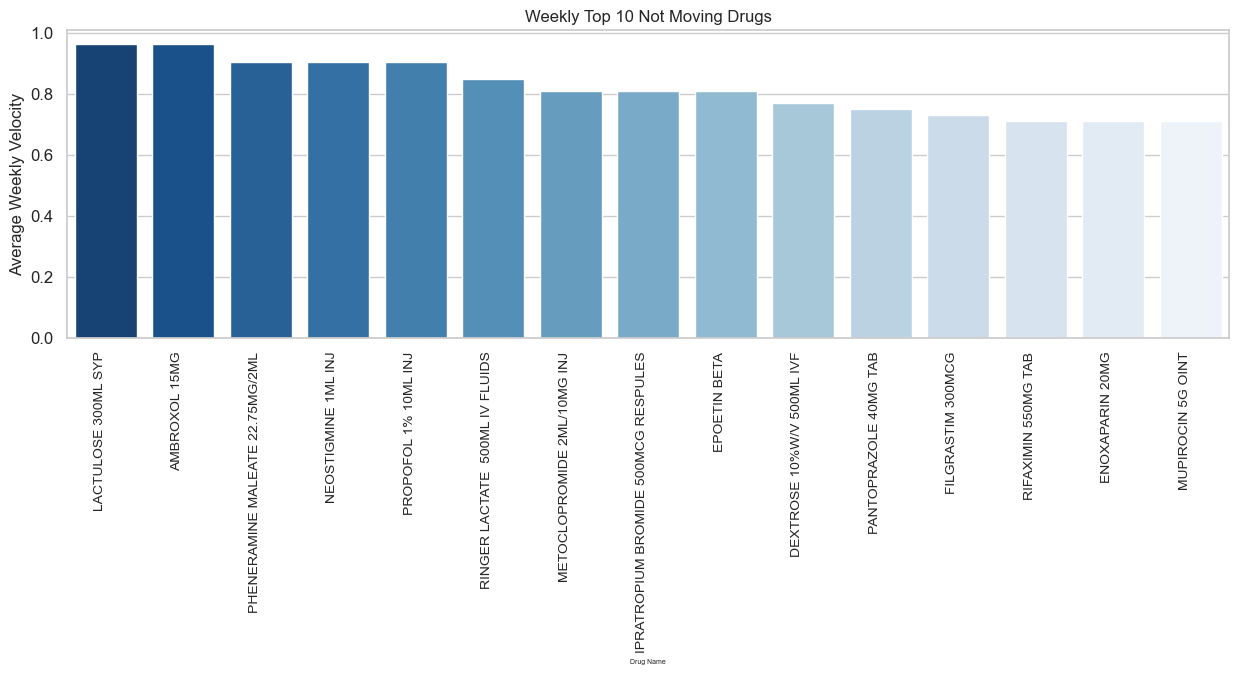

In [152]:
'''
This code selects the top 10 no-moving drugs based on their average weekly sales velocity and visualizes them
with a horizontal bar chart. The chart displays the drug names on the y-axis and their corresponding average
weekly sales velocities on the x-axis, allowing for a quick and clear overview of the highest-performing
pharmaceuticals in terms of weekly sales velocity.
'''
# Plottig barplot
# Subset the top 10 fast-moving drugs
not_moving = sorted_drugs[sorted_drugs['AvgWeeklyVelocity'] < 1].head(15)

# Create a bar chart
sns.set_style('whitegrid')
plt.figure(figsize=(15, 4))
sns.barplot(x='DrugName', y='AvgWeeklyVelocity', data=not_moving, palette='Blues_r')
plt.title('Weekly Top 10 Not Moving Drugs', fontsize=12)
plt.xlabel('Drug Name', fontsize=5)
plt.ylabel('Average Weekly Velocity', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.show()

In [52]:
# Analyze sales trends by month
df['Dateofbill'] = pd.to_datetime(df['Dateofbill'])
df['Month'] = df['Dateofbill'].dt.month
sales_by_month = df.groupby("Month")["Final_Sales"].sum().reset_index()
print("Sales Trends by Month:")
print(sales_by_month)

Sales Trends by Month:
    Month  Final_Sales
0       1    192979.74
1       2    190291.93
2       3    198033.55
3       4    248960.58
4       5    250989.68
5       6    210429.97
6       7    254175.38
7       8    255144.92
8       9    239969.70
9      10    232222.22
10     11    252390.31
11     12    337027.18


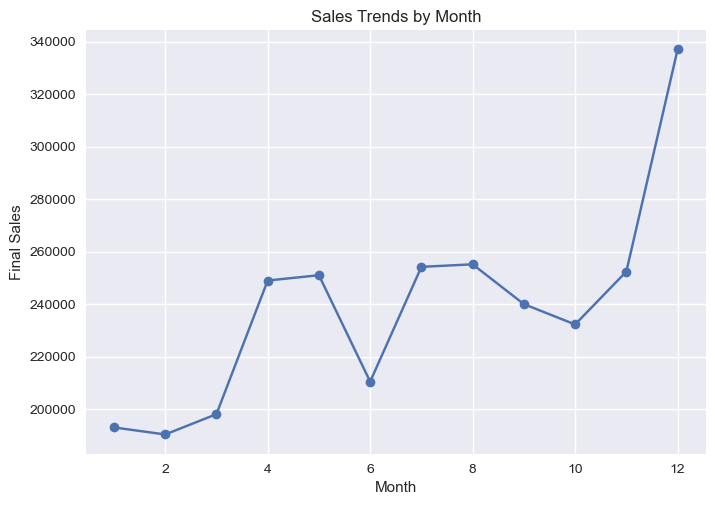

In [253]:
# Plotting linechart
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the sales data as a trend line
ax.plot(sales_by_month["Month"], sales_by_month["Final_Sales"], marker="o")

# Set the chart title and axis labels
ax.set_title("Sales Trends by Month")
ax.set_xlabel("Month")
ax.set_ylabel("Final Sales")

# Display the chart
plt.show()

In [54]:
'''
This code calculates the return rate for each drug in the dataset by dividing the total return quantity
by the total quantity sold for each drug. It provides insights into the percentage of products that were
returned relative to the quantity sold, helping to identify potential issues with specific drugs.
The results are printed for further analysis.
'''
# Return rate by drug
return_rate_by_drug = df.groupby('DrugName')['ReturnQuantity'].sum() / df.groupby('DrugName')['Quantity'].sum()
print(return_rate_by_drug)

DrugName
ACEBROPHYLLINE 100MG CAP                                             0.00
ACEBROPHYLLINE 200MG TAB                                             0.17
ACECLOFENAC 100MG + PARACETAMOL 325MG + SERRATIOPEPTIDASE 15MG TAB   0.00
ACECLOFENAC 100MG + PARACETAMOL 325MG TAB                            0.00
ACYCLOVIR 200MG TAB                                                  0.33
                                                                     ... 
ZINC ACETATE 20MG/5ML SYP                                            0.00
ZINC OXIDE  30GM CREAM                                               0.00
ZINC OXIDE + CALENDULA + ALOE + JOJOBA OIL 100ML CREAM               0.50
ZOLPIDEM 10MG TAB                                                    0.00
ZOLPIDEM 5MG TAB                                                     0.00
Length: 742, dtype: float64


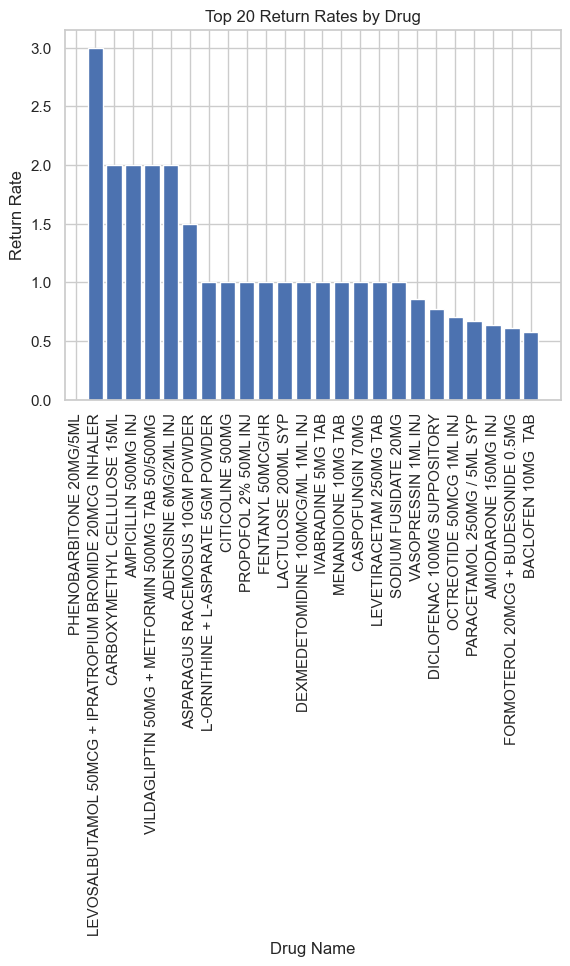

In [55]:
# Plottinhg barplot
# Sort the return rates in descending order and select the top 20
top_return_rates = return_rate_by_drug.sort_values(ascending=False)[:50]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the top 20 return rates as a bar chart
ax.bar(top_return_rates.index, top_return_rates)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the chart title and axis labels
ax.set_title("Top 20 Return Rates by Drug")
ax.set_xlabel("Drug Name")
ax.set_ylabel("Return Rate")

# Display the chart
plt.show()

__Boxplots__

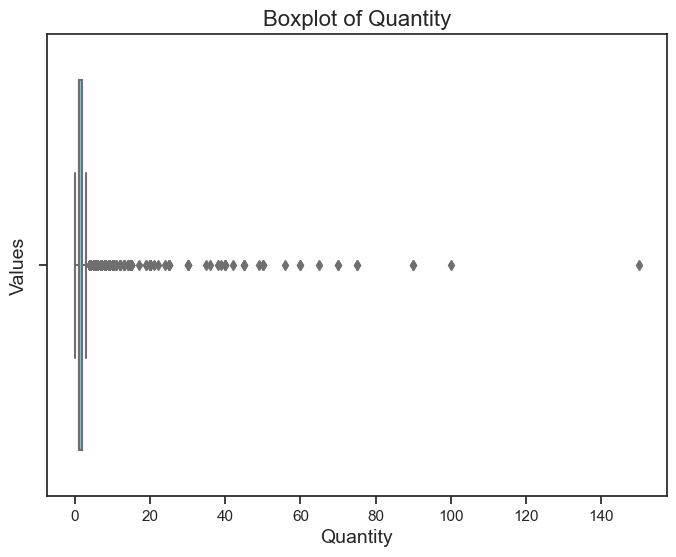

In [56]:
# Set the style and color palette of the plot
sns.set(style='ticks', palette='pastel')

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a boxplot of Qty
sns.boxplot(x=df['Quantity'], color='skyblue')

# Set the x- and y-axis labels and the title of the boxplot
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Boxplot of Quantity', fontsize=16)

# Show the plot
plt.show()

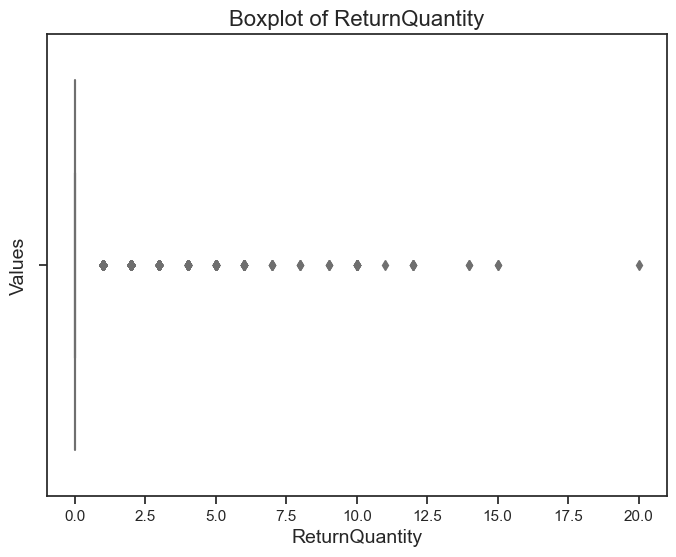

In [57]:
# Set the style and color palette of the plot
sns.set(style='ticks', palette='pastel')

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a boxplot of Qty
sns.boxplot(x=df['ReturnQuantity'], color='skyblue')

# Set the x- and y-axis labels and the title of the boxplot
plt.xlabel('ReturnQuantity', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Boxplot of ReturnQuantity', fontsize=16)

# Show the plot
plt.show()

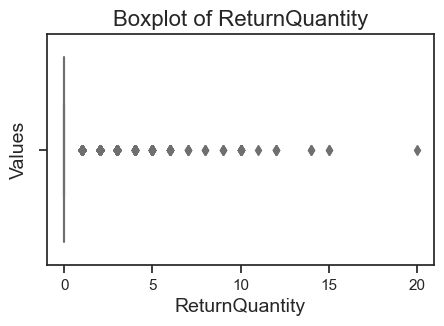

In [58]:
# Set the style and color palette of the plot
sns.set(style='ticks', palette='pastel')

# Set the size of the plot
plt.figure(figsize=(5, 3))

# Create a boxplot of Qty
sns.boxplot(x=df['ReturnQuantity'], color='skyblue')

# Set the x- and y-axis labels and the title of the boxplot
plt.xlabel('ReturnQuantity', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Boxplot of ReturnQuantity', fontsize=16)

# Show the plot
plt.show()

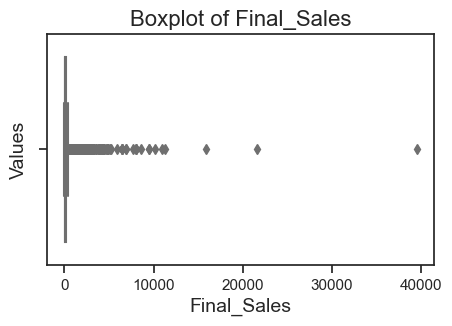

In [59]:
# Set the style and color palette of the plot
sns.set(style='ticks', palette='pastel')

# Set the size of the plot
plt.figure(figsize=(5, 3))

# Create a boxplot of Qty
sns.boxplot(x=df['Final_Sales'], color='skyblue')

# Set the x- and y-axis labels and the title of the boxplot
plt.xlabel('Final_Sales', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Boxplot of Final_Sales', fontsize=16)

# Show the plot
plt.show()

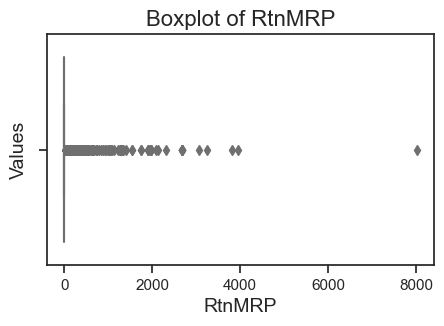

In [60]:
# Set the style and color palette of the plot
sns.set(style='ticks', palette='pastel')

# Set the size of the plot
plt.figure(figsize=(5, 3))

# Create a boxplot of Qty
sns.boxplot(x=df['RtnMRP'], color='skyblue')

# Set the x- and y-axis labels and the title of the boxplot
plt.xlabel('RtnMRP', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Boxplot of RtnMRP', fontsize=16)

# Show the plot
plt.show()

# Univariate Analysis

**Histograms**

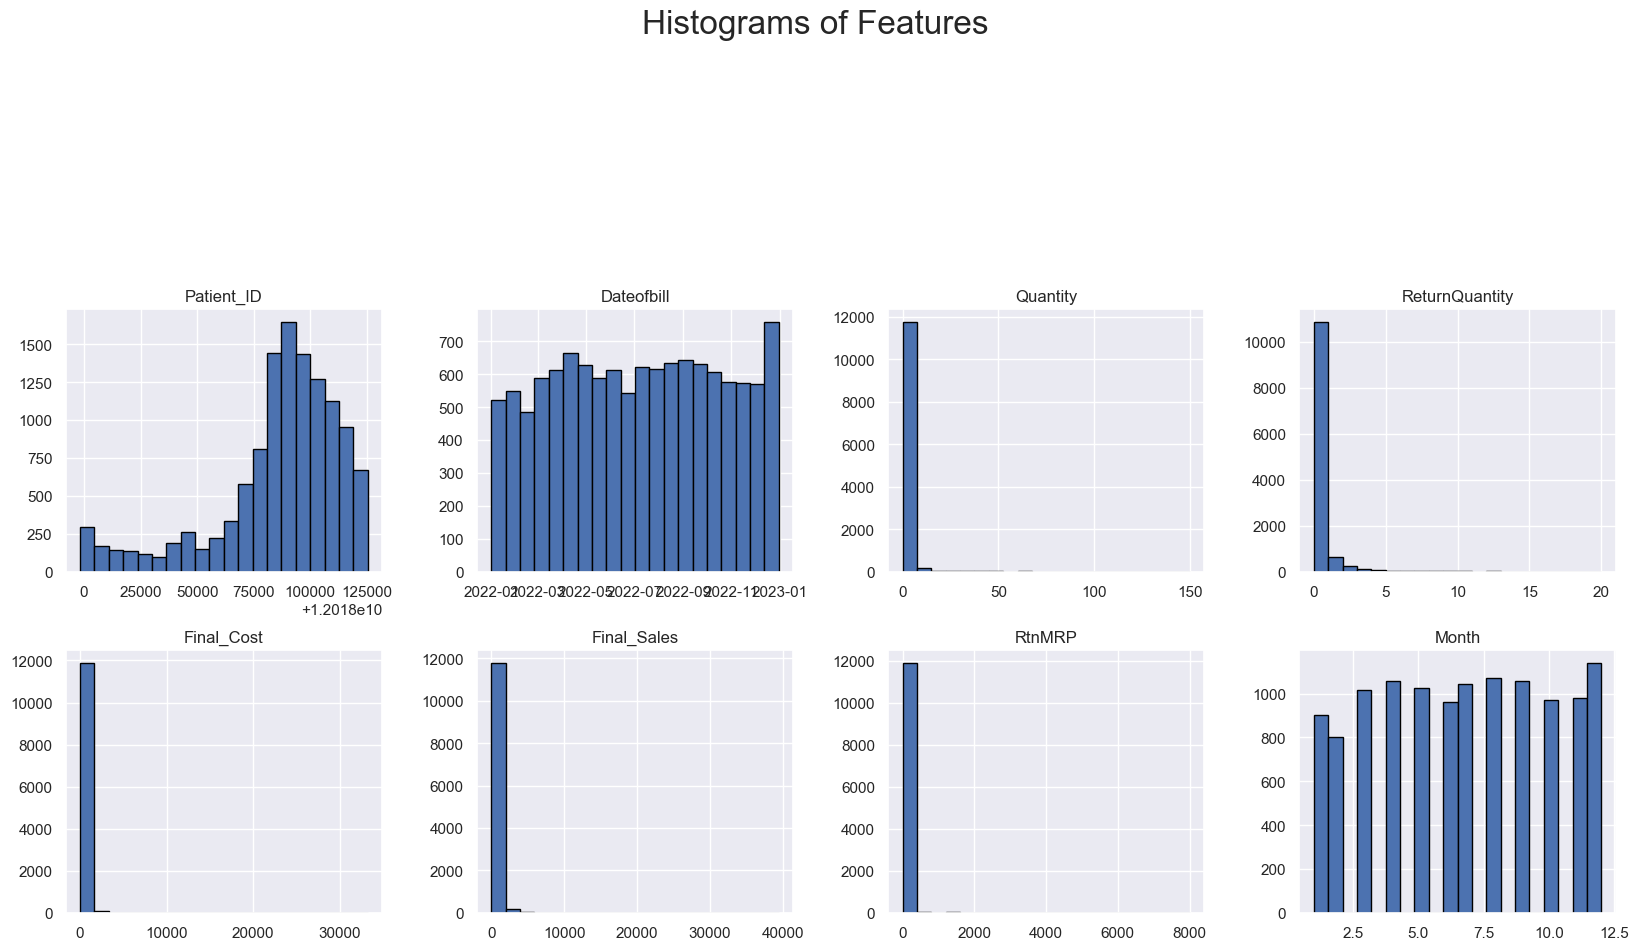

In [154]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,30)

# Set the style and color palette of the plot
sns.set(style='darkgrid', palette='deep')

# Create histograms of all columns in the DataFrame
df.hist(layout=(7, 4), bins=20, edgecolor='black')

# Set the title of the plot
plt.suptitle('Histograms of Features', fontsize=24)

# Show the plot
plt.show()

# Bivairate Analysis

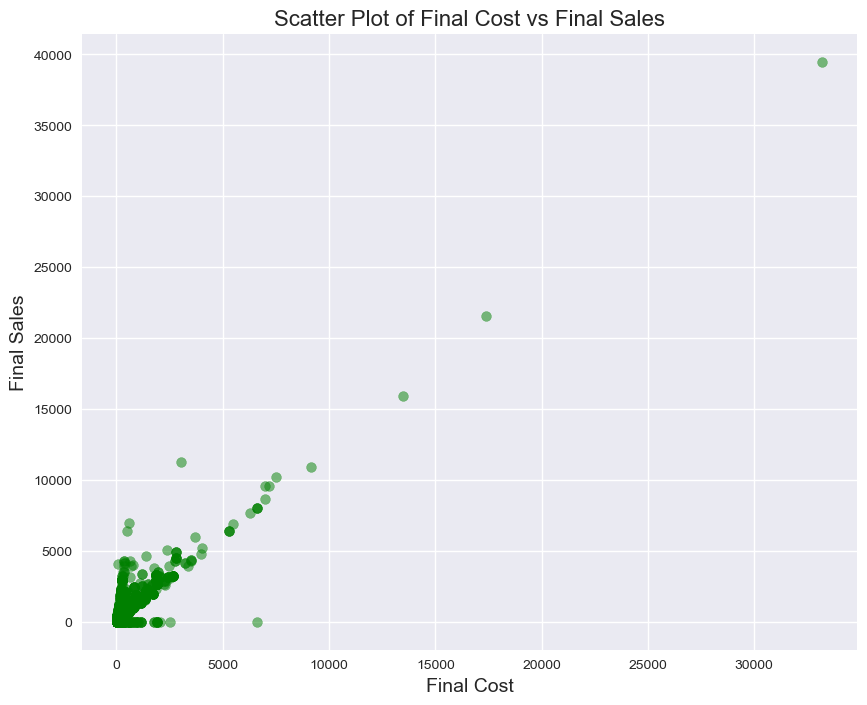

In [155]:
# Set the size and style of the plot
plt.figure(figsize=(10, 8))
plt.style.use('seaborn')

# Create a scatter plot
plt.scatter(df['Final_Cost'], df['Final_Sales'], s=50, alpha=0.5, color='green')

# Set x- and y-axis labels and the title of the scatter plot
plt.xlabel('Final Cost', fontsize=14)
plt.ylabel('Final Sales', fontsize=14)
plt.title('Scatter Plot of Final Cost vs Final Sales', fontsize=16)

# Show the plot
plt.show()

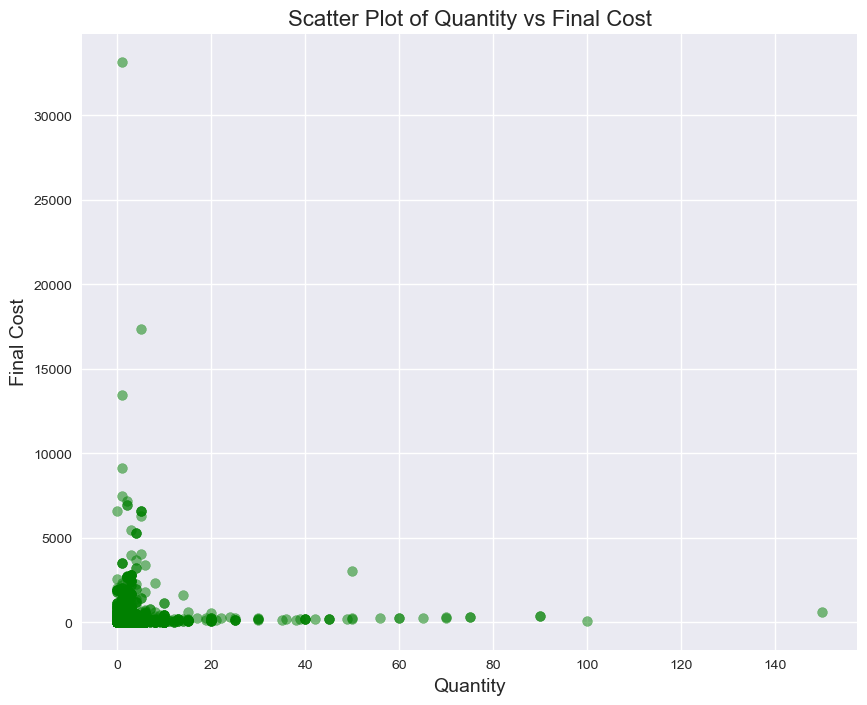

In [156]:
# Set the size and style of the plot
plt.figure(figsize=(10, 8))
plt.style.use('seaborn')

# Create a scatter plot
plt.scatter(df['Quantity'], df['Final_Cost'], s=50, alpha=0.5, color='green')

# Set x- and y-axis labels and the title of the scatter plot
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Final Cost', fontsize=14)
plt.title('Scatter Plot of Quantity vs Final Cost', fontsize=16)

# Show the plot
plt.show()

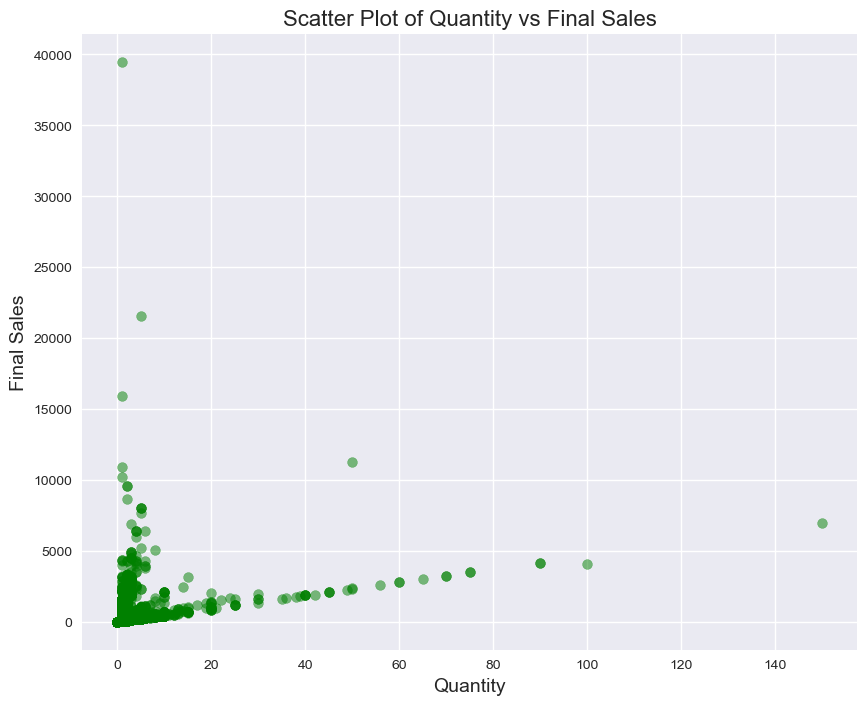

2023-10-21 23:19:47,618 - INFO     - Executing shutdown due to inactivity...
2023-10-21 23:19:51,721 - INFO     - Executing shutdown...
2023-10-21 23:19:51,730 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer
2023-10-21 23:19:51,832 - ERROR    - weakly-referenced object no longer exists


In [158]:
# Set the size and style of the plot
plt.figure(figsize=(10, 8))
plt.style.use('seaborn')

# Create a scatter plot 
plt.scatter(df['Quantity'], df['Final_Sales'], s=50, alpha=0.5, color='green')

# Set x- and y-axis labels and the title of the scatter plot
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Final Sales', fontsize=14)
plt.title('Scatter Plot of Quantity vs Final Sales', fontsize=16)

# Show the plot
plt.show()

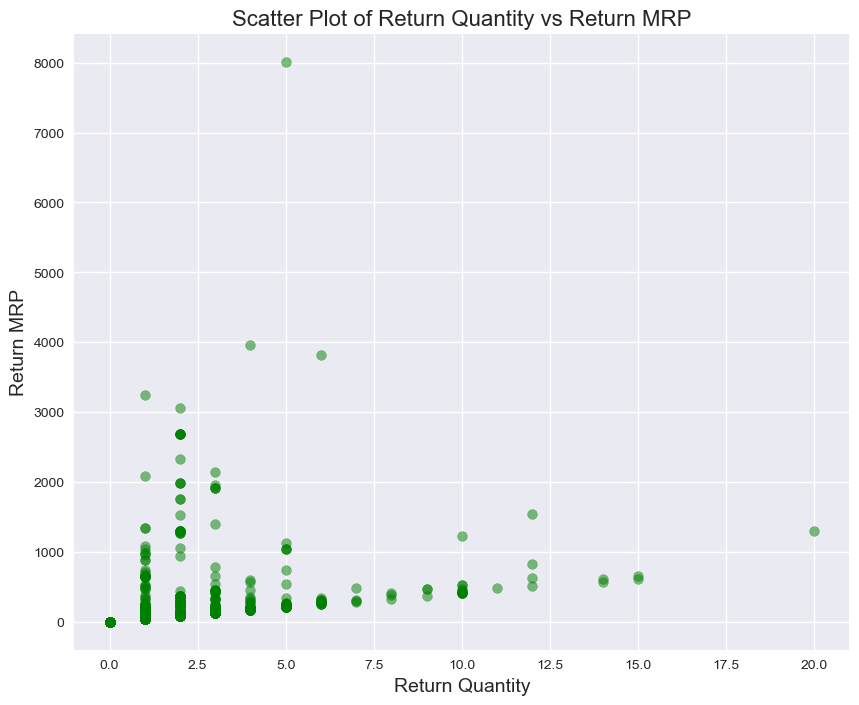

In [159]:
# Set the size and style of the plot
plt.figure(figsize=(10, 8))
plt.style.use('seaborn')

# Create a scatter plot 
plt.scatter(df['ReturnQuantity'], df['RtnMRP'], s=50, alpha=0.5, color='green')

# Set x- and y-axis labels and the title of the scatter plot
plt.xlabel('Return Quantity', fontsize=14)
plt.ylabel('Return MRP', fontsize=14)
plt.title('Scatter Plot of Return Quantity vs Return MRP', fontsize=16)

# Show the plot
plt.show()

# Multivariate Analysis

C:\Users\Mukul\AppData\Local\Temp\ipykernel_34652\1775381139.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



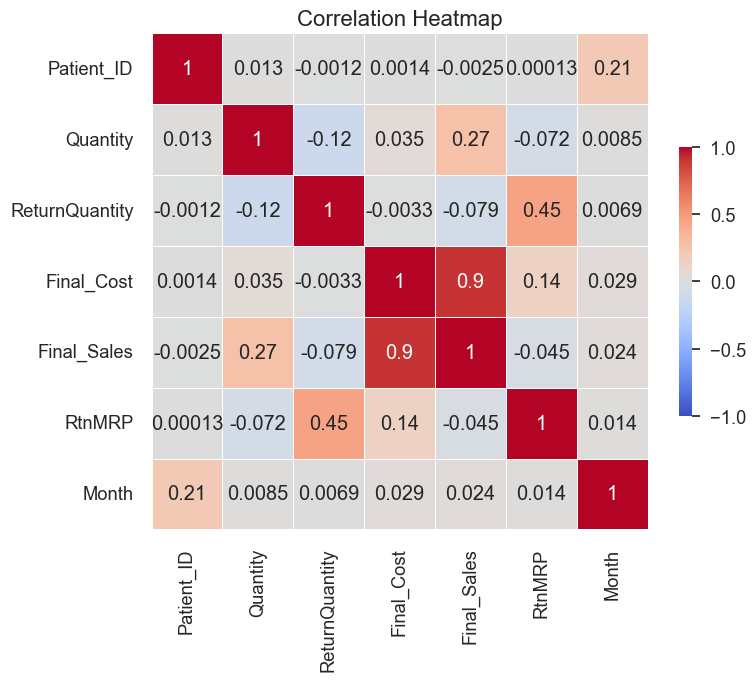

In [65]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap with a larger size and custom color palette
plt.figure(figsize=(8, 7))
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Insights : 
 - The correlation matrix and heatmap reveal a notable observation: strong positive correlations exist exclusively among the columns related to costs and sales.

In [66]:
'''
This code starts by grouping the dataset based on the 'DrugName' and calculating the total quantity sold for
each drug. It then sorts the groups in descending order based on the total quantity sold. The top 10 selling
drugs are selected, and the original dataset is filtered to include only the rows corresponding to these top
10 drugs. This filtered dataset, denoted as 'result,' contains data for the top 10 selling drugs, which can
be further analyzed or used for various purposes.
'''
# Group the dataset by DrugName and calculate the total quantity sold for each drug
drug_sales = df.groupby('DrugName')['Quantity'].sum().reset_index()

# Sort the groups by the total quantity sold in descending order
top_drugs = drug_sales.sort_values('Quantity', ascending=False)

# Select the top 10 groups
top_10_drugs = top_drugs.head(10)

# Filter the original dataset to only include the rows where the DrugName is in the top 10 selling drugs
result = df[df['DrugName'].isin(top_10_drugs['DrugName'])]
result

Typeofsales   Patient_ID    Specialisation         Dept Dateofbill  \
3            Sale  12018079281  Specialisation40  Department1 2022-03-17   
7            Sale  12018077721   Specialisation4  Department1 2022-12-01   
10           Sale  12018074894   Specialisation7  Department1 2022-04-10   
15           Sale  12018115496   Specialisation2  Department1 2022-11-26   
18         Return  12018122962  Specialisation54  Department1 2022-12-19   
...           ...          ...               ...          ...        ...   
14201        Sale  12018114096  Specialisation26  Department1 2022-09-29   
14202        Sale  12018105982   Specialisation7  Department1 2022-07-09   
14208        Sale  12018052115  Specialisation65  Department1 2022-07-21   
14213        Sale  12018099994  Specialisation39  Department1 2022-06-19   
14215        Sale  12018017139   Specialisation1  Department1 2022-06-27   

       Quantity  ReturnQuantity  Final_Cost  Final_Sales  RtnMRP Formulation  \
3             2               0       40.80        81.04    0.00       Form1   
7             3               0       60.03       142.75    0.00       Form1   
10            3               0      114.59       290.40    0.00       Form1   
15            2               0       89.73       193.60    0.00       Form1   
18            0               2       70.02         0.00  115.13       Form2   
...         ...             ...         ...          ...     ...         ...   
14201         1               0       42.46        51.06    0.00       Form1   
14202         2               0       40.93        81.15    0.00       Form1   
14208         3               0       61.44       145.20    0.00       Form1   
14213         3               0       61.44       145.20    0.00       Form1   
14215         4               0       74.94       642.04    0.00       Form1   

                                DrugName                        SubCat  \
3      WATER FOR INJECTION 10ML SOLUTION                    INJECTIONS   
7              SODIUM CHLORIDE IVF 100ML  IV FLUIDS, ELECTROLYTES, TPN   
10       MULTIPLE ELECTROLYTES 500ML IVF  IV FLUIDS, ELECTROLYTES, TPN   
15       MULTIPLE ELECTROLYTES 500ML IVF  IV FLUIDS, ELECTROLYTES, TPN   
18                  SODIUM CHLORIDE 0.9%  IV FLUIDS, ELECTROLYTES, TPN   
...                                  ...                           ...   
14201              PANTOPRAZOLE 40MG INJ                    INJECTIONS   
14202  WATER FOR INJECTION 10ML SOLUTION                    INJECTIONS   
14208          SODIUM CHLORIDE IVF 100ML  IV FLUIDS, ELECTROLYTES, TPN   
14213          SODIUM CHLORIDE IVF 100ML  IV FLUIDS, ELECTROLYTES, TPN   
14215             PARACETAMOL 1GM IV INJ                    INJECTIONS   

                                       SubCat1  Month  
3        INTRAVENOUS & OTHER STERILE SOLUTIONS      3  
7        INTRAVENOUS & OTHER STERILE SOLUTIONS     12  
10       INTRAVENOUS & OTHER STERILE SOLUTIONS      4  
15       INTRAVENOUS & OTHER STERILE SOLUTIONS     11  
18       INTRAVENOUS & OTHER STERILE SOLUTIONS     12  
...                                        ...    ...  
14201  GASTROINTESTINAL & HEPATOBILIARY SYSTEM      9  
14202    INTRAVENOUS & OTHER STERILE SOLUTIONS      7  
14208    INTRAVENOUS & OTHER STERILE SOLUTIONS      7  
14213    INTRAVENOUS & OTHER STERILE SOLUTIONS      6  
14215                   CENTRAL NERVOUS SYSTEM      6  

[3226 rows x 15 columns]

In [67]:
'''
The code snippet first converts date strings to datetime objects, extracts week numbers, and organizes data
by weeks and drug names, summing the quantities sold. It then pivots the table for better analysis, filling
missing values with 0 and renaming columns. This transformation prepares the data for a detailed examination
of weekly sales quantities for various drugs.
'''
from datetime import datetime
# Convert the date string to datetime object
result['Dateofbill'] = pd.to_datetime(result['Dateofbill'], format='%m/%d/%Y')

# Create a new column with week number
result['Week'] = result['Dateofbill'].dt.week

# Select only the necessary columns
result = result[['Week', 'DrugName', 'Quantity']]

# Group by week and drug name and sum the quantity
result = result.groupby(['Week', 'DrugName']).sum().reset_index()

# Pivot the table so that drugs are in columns and weeks are in rows
result = result.pivot(index='Week', columns='DrugName', values='Quantity')

# Fill the missing values with 0
result = result.fillna(0)

# Rename the columns for better readability
result.columns.name = ''

C:\Users\Mukul\AppData\Local\Temp\ipykernel_34652\1760272336.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mukul\AppData\Local\Temp\ipykernel_34652\1760272336.py:7: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

C:\Users\Mukul\AppData\Local\Temp\ipykernel_34652\1760272336.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
# Viewing result
result.head()

LEVOSALBUTAMOL/LEVALBUTEROL 0.63MG RESPULES  \
Week                                                
1                                           14.00   
2                                           11.00   
3                                           10.00   
4                                           18.00   
5                                            8.00   

      MULTIPLE ELECTROLYTES 500ML IVF  NORADRENALINE 2ML INJ  \
Week                                                           
1                                9.00                   0.00   
2                               26.00                   0.00   
3                               13.00                   8.00   
4                               12.00                   0.00   
5                                8.00                  28.00   

      ONDANSETRON 2MG/ML  PANTOPRAZOLE 40MG INJ  PARACETAMOL 1GM IV INJ  \
Week                                                                      
1                  15.00                   6.00                    8.00   
2                  12.00                   9.00                   11.00   
3                  10.00                   3.00                    9.00   
4                   9.00                  10.00                   12.00   
5                  16.00                   9.00                    1.00   

      SEVOFLURANE 99.97%  SODIUM CHLORIDE 0.9%  SODIUM CHLORIDE IVF 100ML  \
Week                                                                        
1                   0.00                 31.00                      33.00   
2                  25.00                  3.00                      14.00   
3                 215.00                  3.00                      35.00   
4                   0.00                 34.00                      13.00   
5                   0.00                 12.00                      28.00   

      WATER FOR INJECTION 10ML SOLUTION  
Week                                     
1                                 18.00  
2                                  5.00  
3                                 22.00  
4                                 12.00  
5                                 19.00

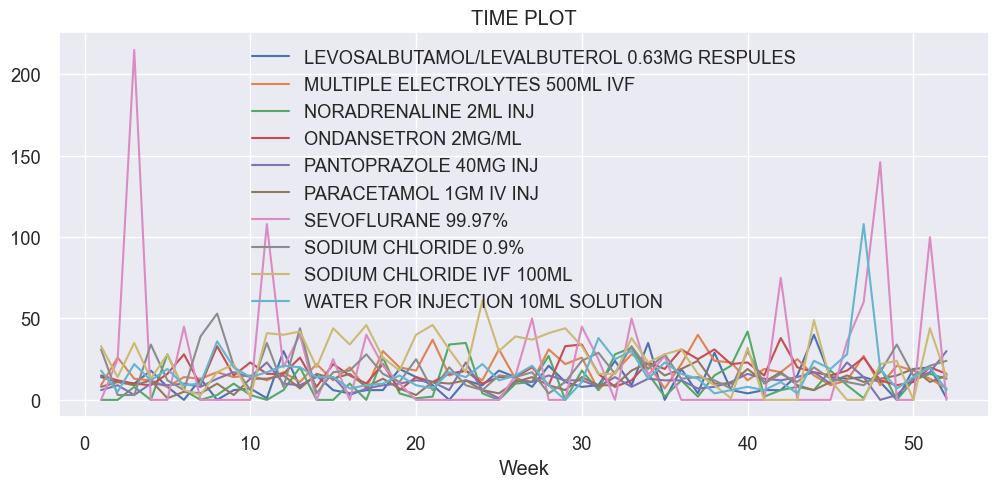

In [70]:
# Plotting line chart time plot
result.plot(figsize=(12,5))
plt.title("TIME PLOT")
plt.show()

# Augmented Dickey Fuller Test (ADF)

The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine the stationarity of a time series dataset. Stationarity is a crucial concept in time series analysis, indicating that a time series' statistical properties, such as mean and variance, remain constant over time. The ADF test evaluates whether a time series is non-stationary, which means its statistical properties change over time, or stationary, where these properties remain consistent.

The ADF test works by comparing the actual time series data with a null hypothesis of non-stationarity. If the test statistic is significantly smaller than critical values, you can reject the null hypothesis and conclude that the time series is stationary. In contrast, if the test statistic is larger than the critical values, the data is considered non-stationary.

This test helps in deciding whether differencing or other transformations are necessary to make a time series suitable for time series modeling and forecasting. It is a fundamental tool in the analysis of time series data to ensure that underlying patterns can be effectively modeled.

In [71]:
# Using ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(result['LEVOSALBUTAMOL/LEVALBUTEROL 0.63MG RESPULES'])

1. ADF :  -8.301678921812108
2. P-Value :  4.0027336648773256e-13
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 51
5. Critical Values :
	 1% :  -3.5656240522121956
	 5% :  -2.920142229157715
	 10% :  -2.598014675124952


In [72]:
for column in result.columns:
    print("Column Name: ", column)
    adf_test(result[column])
    print("\n")

Column Name:  LEVOSALBUTAMOL/LEVALBUTEROL 0.63MG RESPULES
1. ADF :  -8.301678921812108
2. P-Value :  4.0027336648773256e-13
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 51
5. Critical Values :
	 1% :  -3.5656240522121956
	 5% :  -2.920142229157715
	 10% :  -2.598014675124952


Column Name:  MULTIPLE ELECTROLYTES 500ML IVF
1. ADF :  -7.578447023679378
2. P-Value :  2.721966084980934e-11
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 51
5. Critical Values :
	 1% :  -3.5656240522121956
	 5% :  -2.920142229157715
	 10% :  -2.598014675124952


Column Name:  NORADRENALINE 2ML INJ
1. ADF :  -5.219896111851235
2. P-Value :  8.005949889933853e-06
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 49
5. Critical Values :
	 1% :  -3.5714715250448363
	 5% :  -2.922629480573571
	 10% :  -2.5993358475635153


Column Name:  ONDANSETRON 2MG/ML
1. ADF :  -6.635091676055132
2. P-Value :  5.588622992209601e-09
3. Num Of Lags :  0
4. Num Of Obse

In [73]:
ad_fuller_result_1 = adfuller(result['LEVOSALBUTAMOL/LEVALBUTEROL 0.63MG RESPULES'].diff()[10:])

print('LEVOSALBUTAMOL/LEVALBUTEROL 0.63MG RESPULES')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

LEVOSALBUTAMOL/LEVALBUTEROL 0.63MG RESPULES
ADF Statistic: -3.475325210119719
p-value: 0.008643874314684575


In [74]:
import statsmodels.graphics.tsaplots as tsa_plots

<Figure size 2500x1800 with 0 Axes>

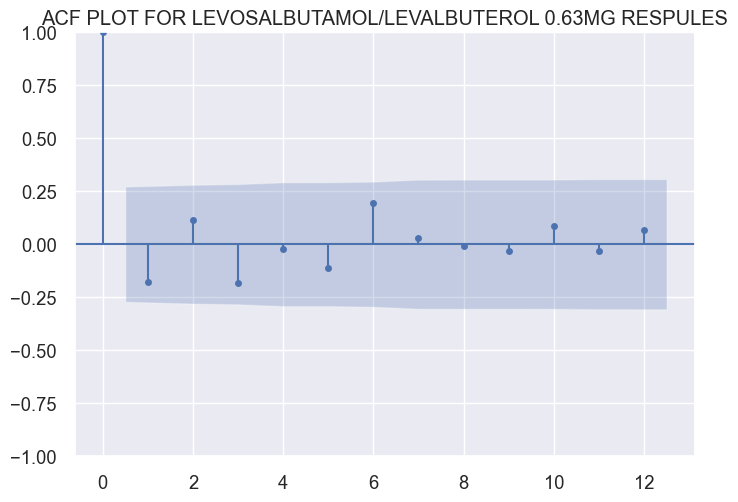

<Figure size 2500x1800 with 0 Axes>

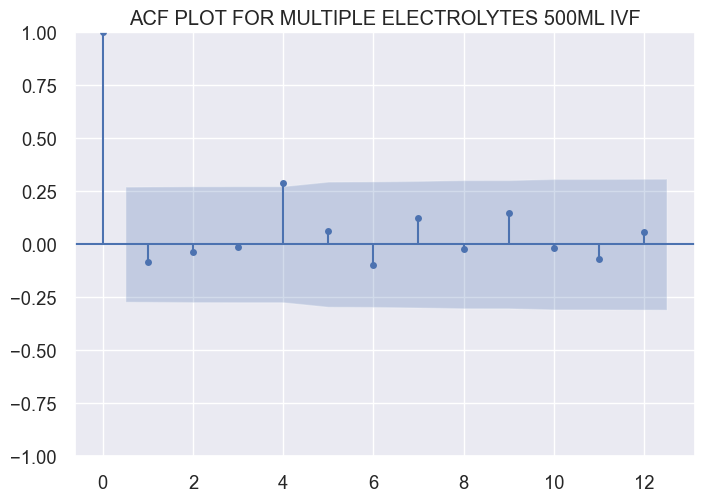

<Figure size 2500x1800 with 0 Axes>

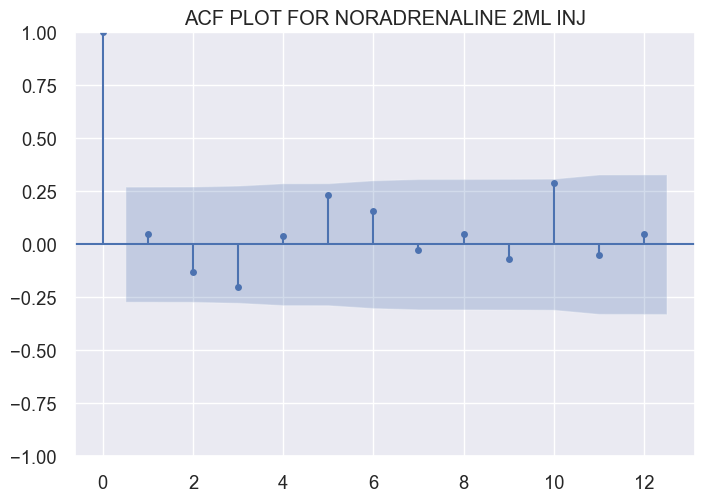

<Figure size 2500x1800 with 0 Axes>

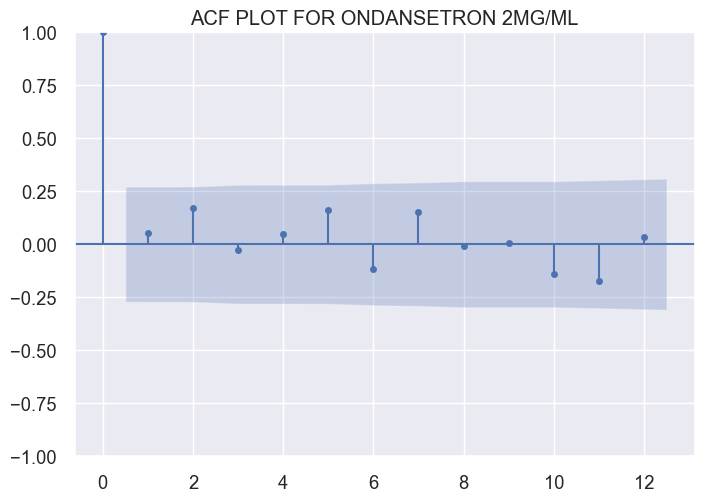

<Figure size 2500x1800 with 0 Axes>

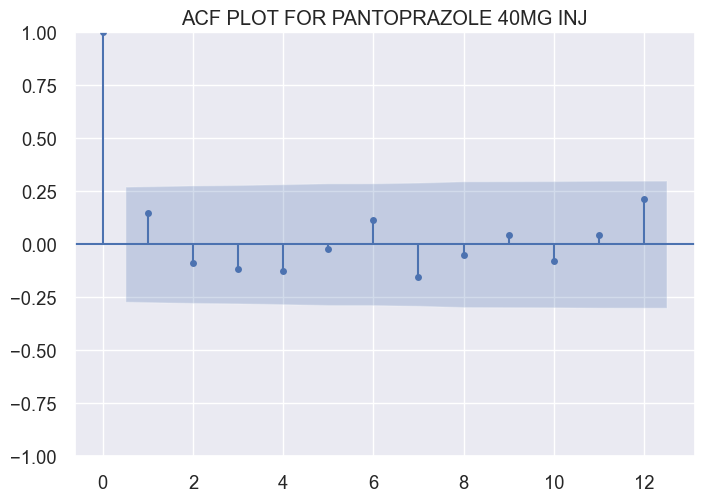

<Figure size 2500x1800 with 0 Axes>

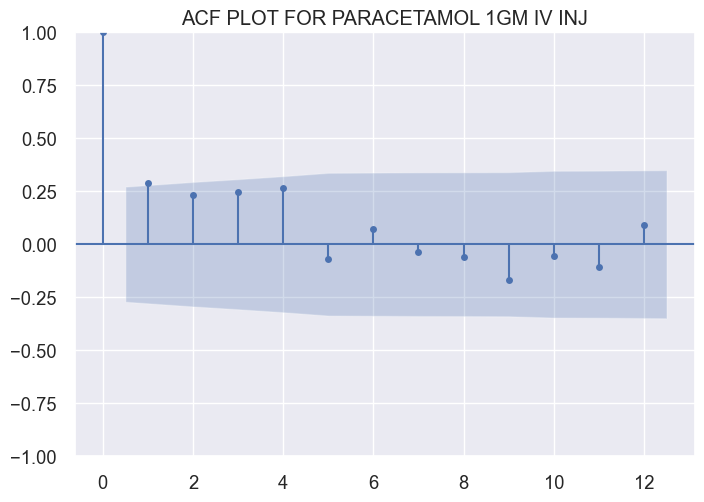

<Figure size 2500x1800 with 0 Axes>

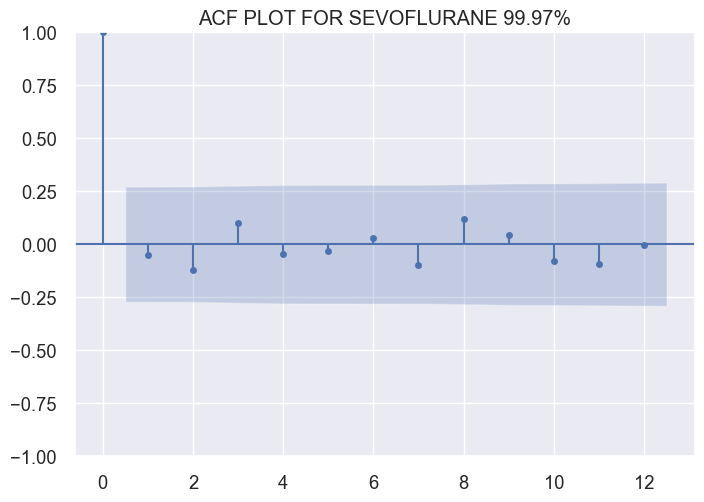

<Figure size 2500x1800 with 0 Axes>

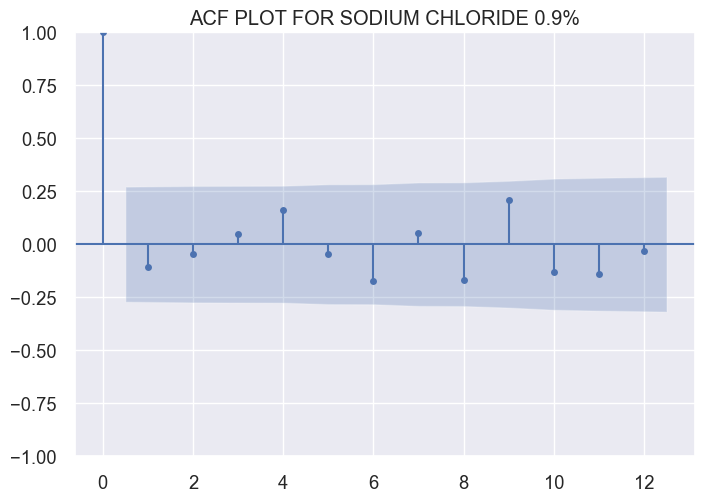

<Figure size 2500x1800 with 0 Axes>

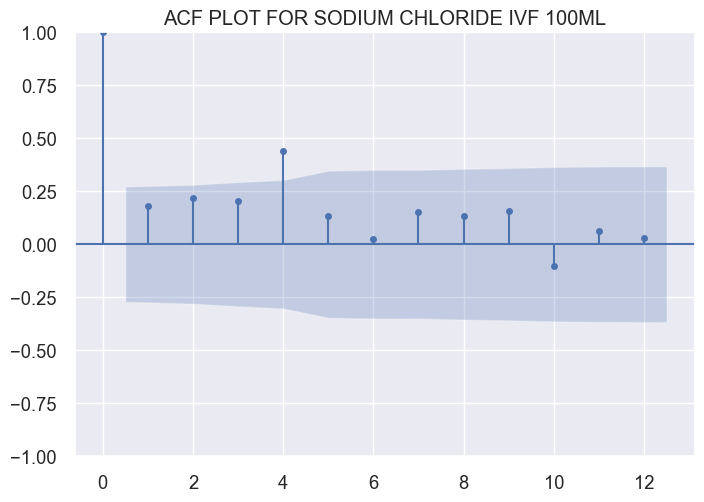

<Figure size 2500x1800 with 0 Axes>

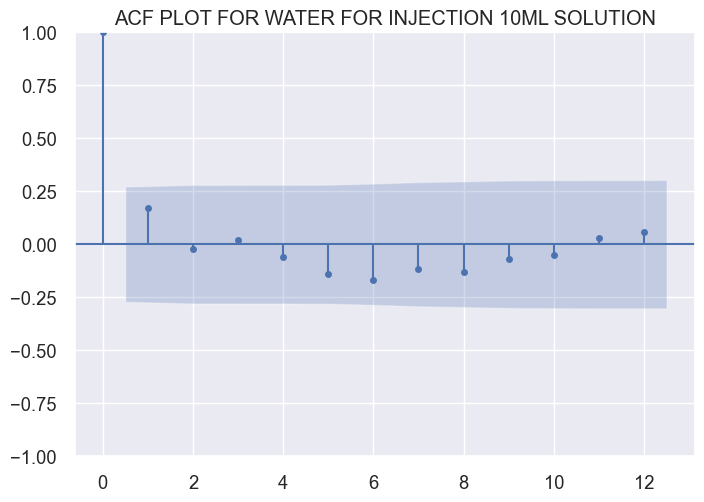

In [75]:
for column in result.columns:
    plt.figure(figsize=(25,18))
    tsa_plots.plot_acf(result[column], lags=12)
    plt.title(f"ACF PLOT FOR {column}")
    plt.show()

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



<Figure size 2500x1800 with 0 Axes>

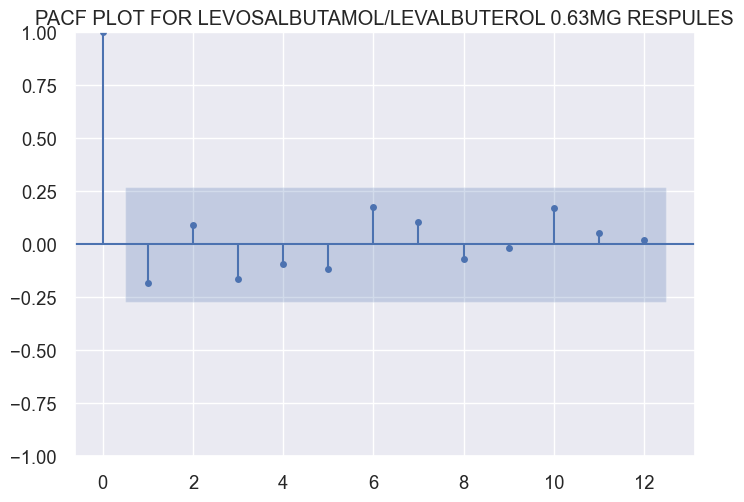

<Figure size 2500x1800 with 0 Axes>

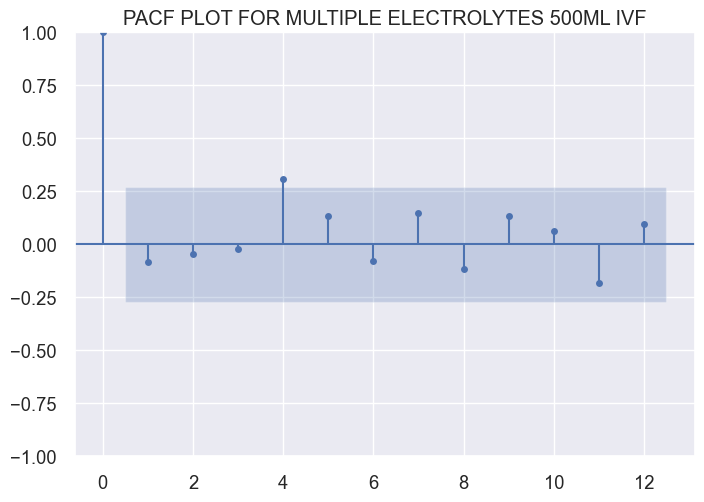

<Figure size 2500x1800 with 0 Axes>

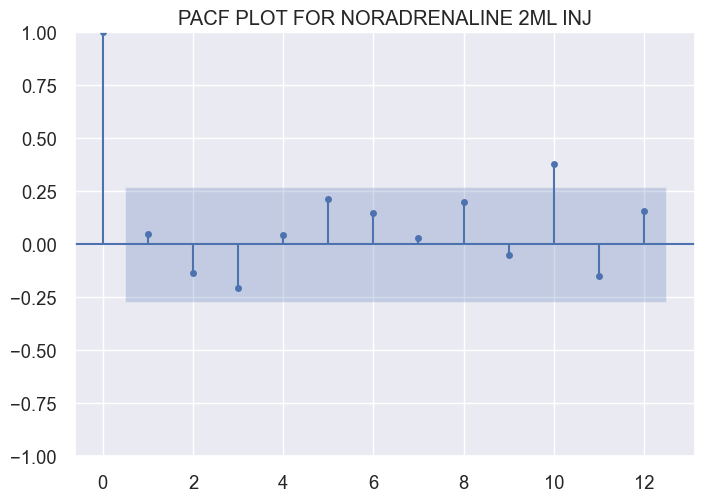

<Figure size 2500x1800 with 0 Axes>

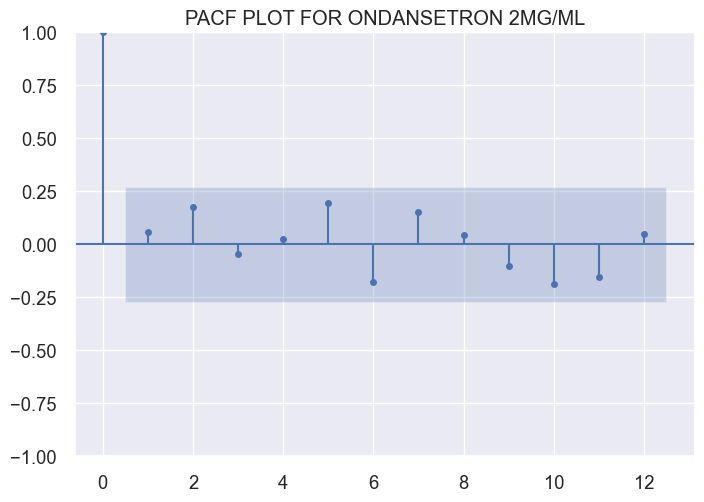

<Figure size 2500x1800 with 0 Axes>

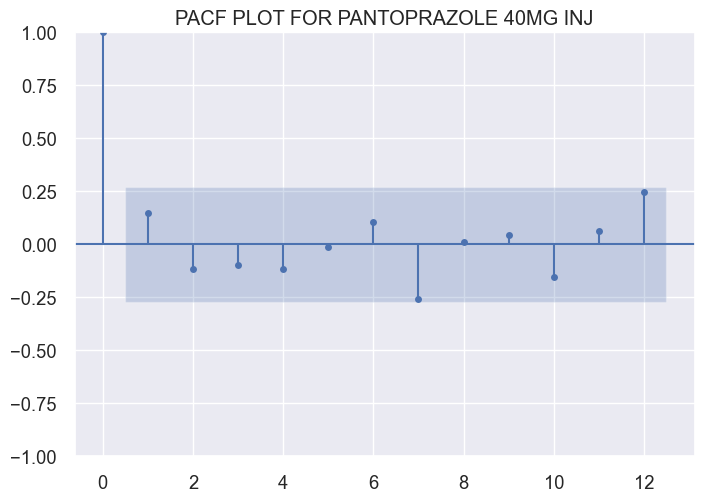

<Figure size 2500x1800 with 0 Axes>

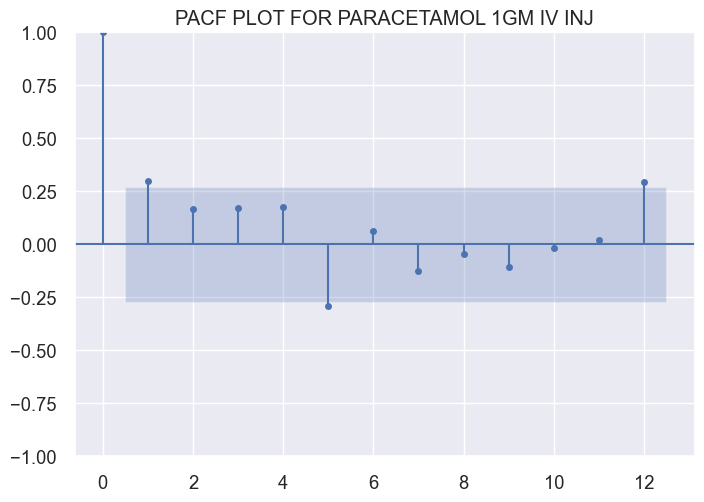

<Figure size 2500x1800 with 0 Axes>

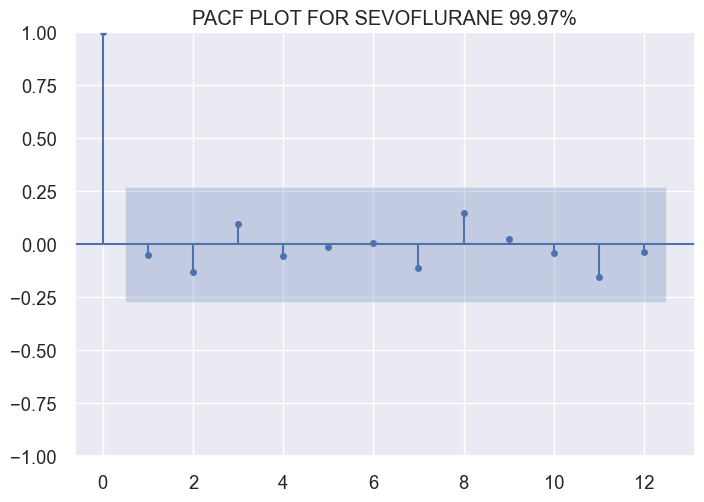

<Figure size 2500x1800 with 0 Axes>

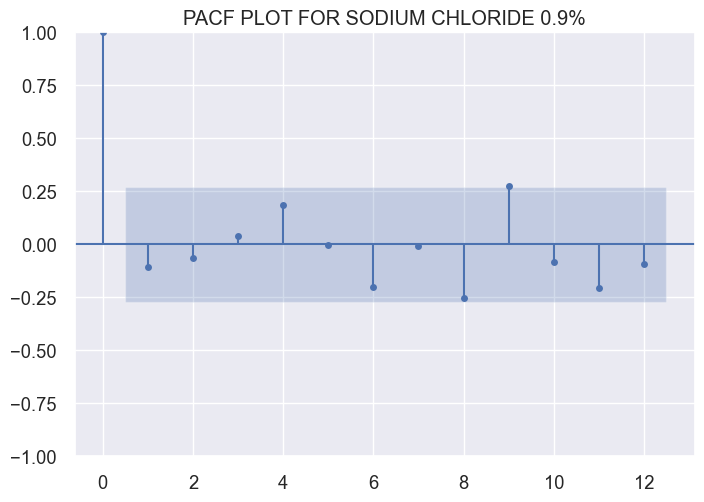

<Figure size 2500x1800 with 0 Axes>

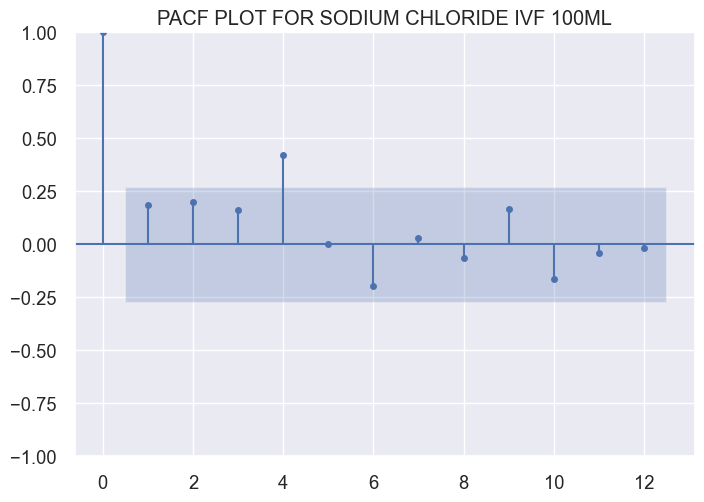

<Figure size 2500x1800 with 0 Axes>

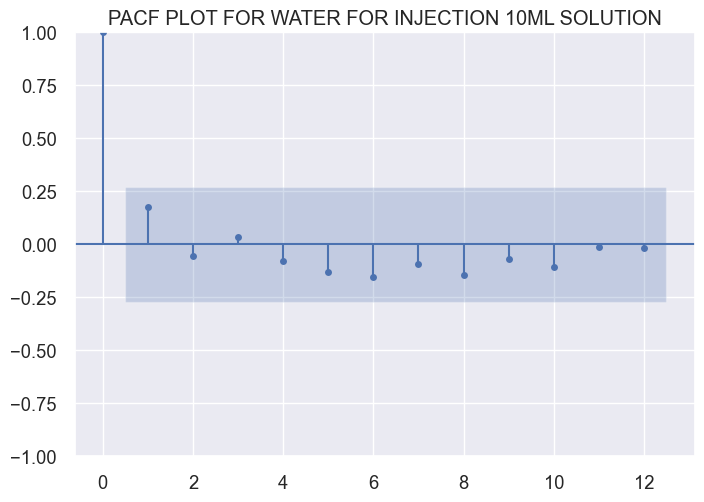

In [76]:
for column in result.columns:
    plt.figure(figsize=(25,18))
    tsa_plots.plot_pacf(result[column], lags=12)
    plt.title(f"PACF PLOT FOR {column}")
    plt.show()

# Auto Regressive Integrated Moving Average (ARIMA)

AutoRegressive Integrated Moving Average (ARIMA) is a popular time series forecasting model that combines autoregressive (AR) and moving average (MA) components with differencing (I) to make predictions for time-dependent data. ARIMA models are widely used in various fields, including finance, economics, and epidemiology. The "AR" part models the relationship between the current value and past values, the "MA" part captures the correlation between a current value and past forecast errors, and the "I" represents differencing to achieve stationarity in the data. By tuning the model's parameters, such as the order of differencing and the lag values, ARIMA can provide accurate forecasts for a wide range of time series data.

In [77]:
from pmdarima import auto_arima

In [78]:
for column in result.columns:
    stepwise_fit = auto_arima(result[column], trace=True,
    suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=382.440, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=377.451, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=377.765, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=377.989, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=428.093, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=378.703, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.371 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=364.964, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=366.598, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=366.564, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=457.478, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=368.546, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time

In [79]:
result

LEVOSALBUTAMOL/LEVALBUTEROL 0.63MG RESPULES  \
Week                                                
1                                           14.00   
2                                           11.00   
3                                           10.00   
4                                           18.00   
5                                            8.00   
6                                            0.00   
7                                           13.00   
8                                            0.00   
9                                            6.00   
10                                           7.00   
11                                           1.00   
12                                          30.00   
13                                           8.00   
14                                          15.00   
15                                           6.00   
16                                           4.00   
17                                           6.00   
18                                           6.00   
19                                          19.00   
20                                          14.00   
21                                           9.00   
22                                           0.00   
23                                          12.00   
24                                           9.00   
25                                          18.00   
26                                          14.00   
27                                           8.00   
28                                          21.00   
29                                          11.00   
30                                           8.00   
31                                           9.00   
32                                          24.00   
33                                           9.00   
34                                          35.00   
35                                           0.00   
36                                          19.00   
37                                           4.00   
38                                          29.00   
39                                           6.00   
40                                           4.00   
41                                           6.00   
42                                           6.00   
43                                          15.00   
44                                          40.00   
45                                          14.00   
46                                          13.00   
47                                          14.00   
48                                          11.00   
49                                           0.00   
50                                          19.00   
51                                          20.00   
52                                           1.00   

      MULTIPLE ELECTROLYTES 500ML IVF  NORADRENALINE 2ML INJ  \
Week                                                           
1                                9.00                   0.00   
2                               26.00                   0.00   
3                               13.00                   8.00   
4                               12.00                   0.00   
5                                8.00                  28.00   
6                               14.00                   6.00   
7                               13.00                   0.00   
8                               17.00                   3.00   
9                               14.00                  10.00   
10                              15.00                   3.00   
11                              12.00                   0.00   
12                              17.00                   6.00   
13                              11.00                  20.00   
14                              22.00                   0.00   
15                              12.00                   0.00   
16                              20.00                  

In [80]:
train=result.iloc[:-12]
test=result.iloc[-12:]
print(train.shape,test.shape)

(40, 10) (12, 10)


In [81]:
train

LEVOSALBUTAMOL/LEVALBUTEROL 0.63MG RESPULES  \
Week                                                
1                                           14.00   
2                                           11.00   
3                                           10.00   
4                                           18.00   
5                                            8.00   
6                                            0.00   
7                                           13.00   
8                                            0.00   
9                                            6.00   
10                                           7.00   
11                                           1.00   
12                                          30.00   
13                                           8.00   
14                                          15.00   
15                                           6.00   
16                                           4.00   
17                                           6.00   
18                                           6.00   
19                                          19.00   
20                                          14.00   
21                                           9.00   
22                                           0.00   
23                                          12.00   
24                                           9.00   
25                                          18.00   
26                                          14.00   
27                                           8.00   
28                                          21.00   
29                                          11.00   
30                                           8.00   
31                                           9.00   
32                                          24.00   
33                                           9.00   
34                                          35.00   
35                                           0.00   
36                                          19.00   
37                                           4.00   
38                                          29.00   
39                                           6.00   
40                                           4.00   

      MULTIPLE ELECTROLYTES 500ML IVF  NORADRENALINE 2ML INJ  \
Week                                                           
1                                9.00                   0.00   
2                               26.00                   0.00   
3                               13.00                   8.00   
4                               12.00                   0.00   
5                                8.00                  28.00   
6                               14.00                   6.00   
7                               13.00                   0.00   
8                               17.00                   3.00   
9                               14.00                  10.00   
10                              15.00                   3.00   
11                              12.00                   0.00   
12                              17.00                   6.00   
13                              11.00                  20.00   
14                              22.00                   0.00   
15                              12.00                   0.00   
16                              20.00                  10.00   
17                               7.00                   0.00   
18                              30.00                  26.00   
19                              20.00                   4.00   
20                              18.00                   1.00   
21                              37.00                   2.00   
22                              15.00                  34.00   
23                              18.00                  35.00   
24                              12.00                   4.00   
25                              31.00                   0.00   
26                              13.00              

In [82]:
from statsmodels.tsa.arima.model import ARIMA

In [83]:
for column in train.columns:
    model = ARIMA(train[column], order=(0,1,1))
    model = model.fit()
    print(f"ARIMA Model Summary for {column}:")
    print(model.summary())
    print("\n")

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was pro

ARIMA Model Summary for LEVOSALBUTAMOL/LEVALBUTEROL 0.63MG RESPULES:
                                            SARIMAX Results                                            
Dep. Variable:     LEVOSALBUTAMOL/LEVALBUTEROL 0.63MG RESPULES   No. Observations:                   40
Model:                                          ARIMA(0, 1, 1)   Log Likelihood                -140.010
Date:                                         Thu, 19 Oct 2023   AIC                            284.020
Time:                                                 22:13:48   BIC                            287.347
Sample:                                                      0   HQIC                           285.213
                                                          - 40                                         
Covariance Type:                                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



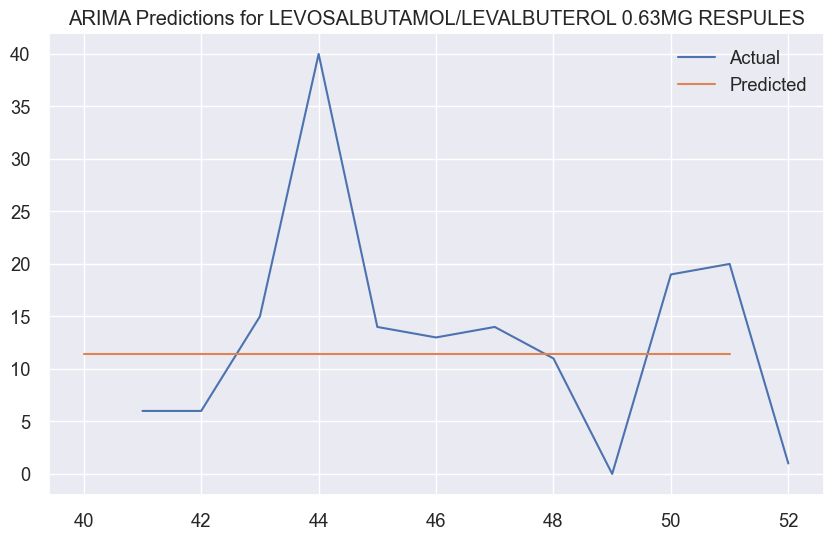

RMSE of LEVOSALBUTAMOL/LEVALBUTEROL 0.63MG RESPULES: 10.311204524804495
MAPE of LEVOSALBUTAMOL/LEVALBUTEROL 0.63MG RESPULES: inf%


C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



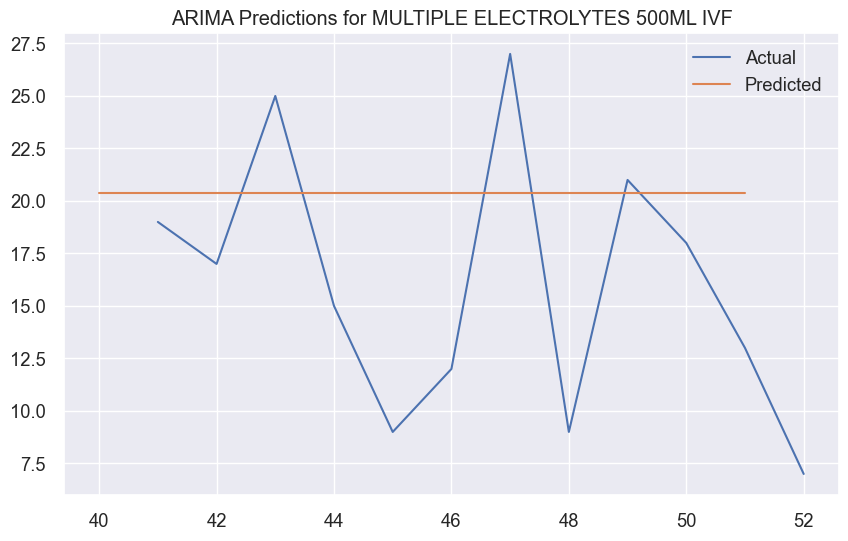

RMSE of MULTIPLE ELECTROLYTES 500ML IVF: 7.500609055918663
MAPE of MULTIPLE ELECTROLYTES 500ML IVF: 45.56%


C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



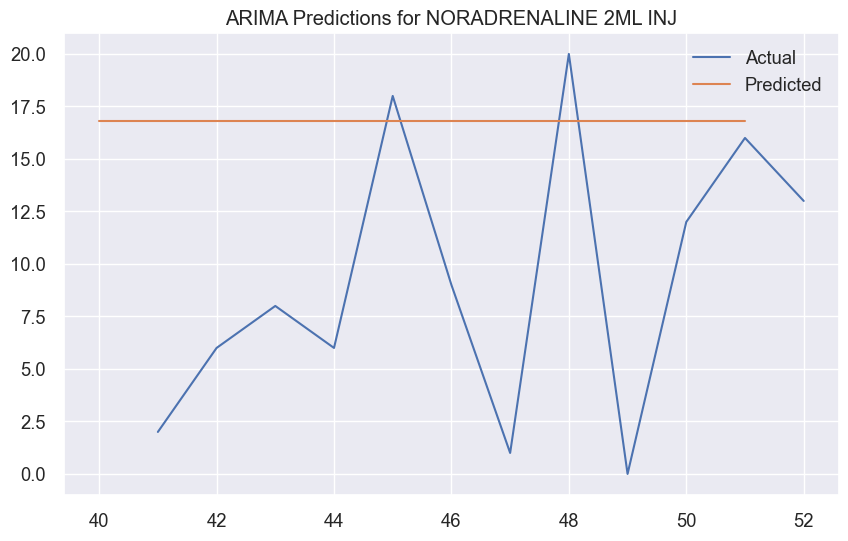

RMSE of NORADRENALINE 2ML INJ: 9.885905988402277
MAPE of NORADRENALINE 2ML INJ: inf%


C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



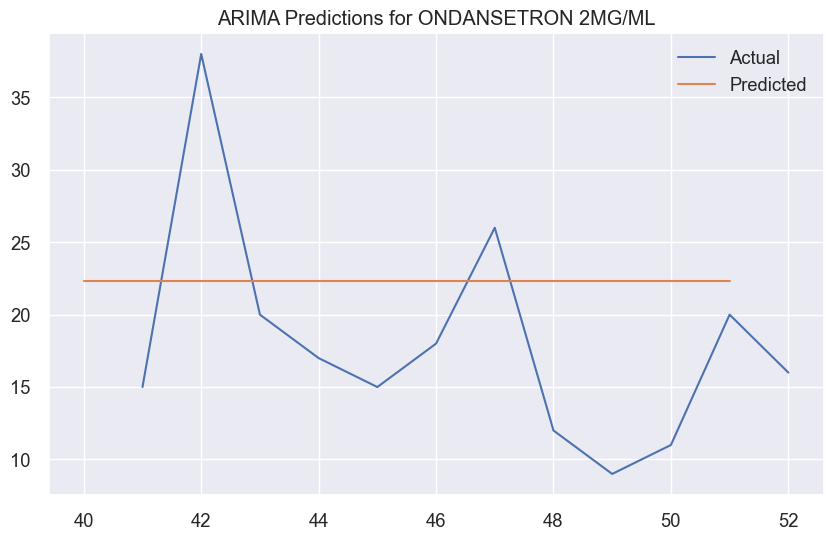

RMSE of ONDANSETRON 2MG/ML: 8.53988059193996
MAPE of ONDANSETRON 2MG/ML: 51.62%


C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



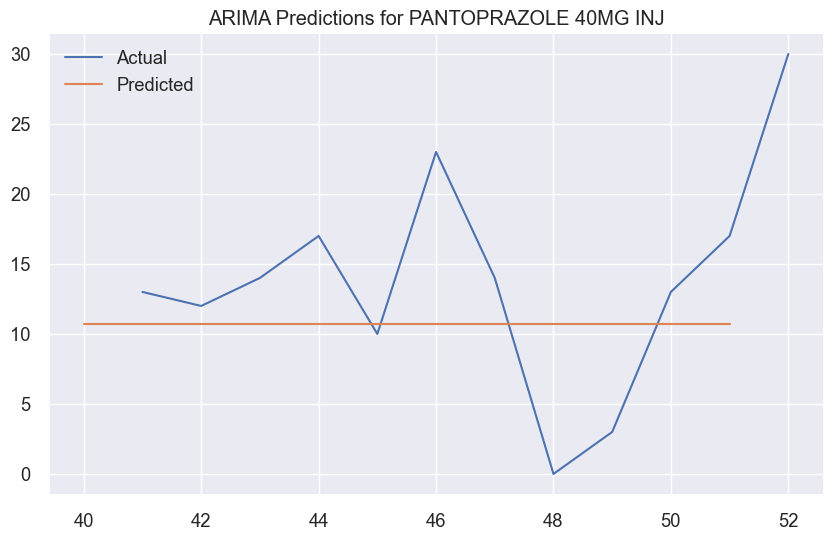

RMSE of PANTOPRAZOLE 40MG INJ: 8.223340314496738
MAPE of PANTOPRAZOLE 40MG INJ: inf%


C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



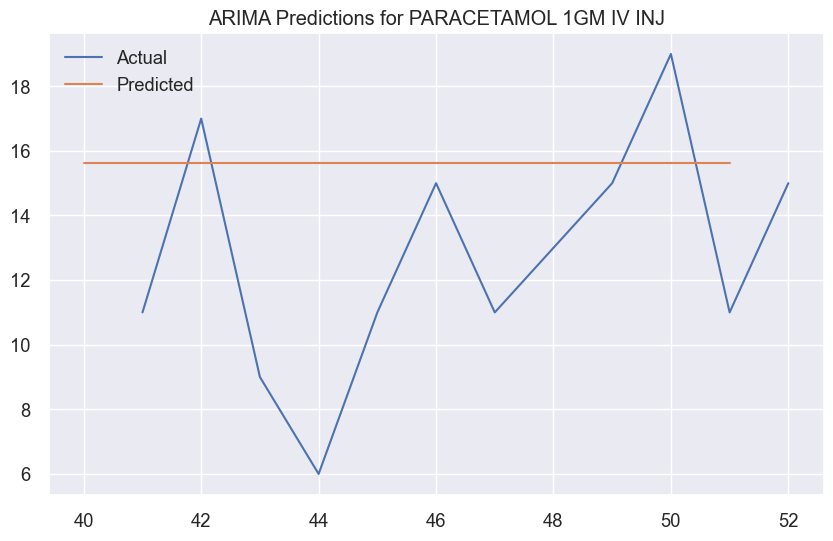

RMSE of PARACETAMOL 1GM IV INJ: 4.510378253628949
MAPE of PARACETAMOL 1GM IV INJ: 41.57%


C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



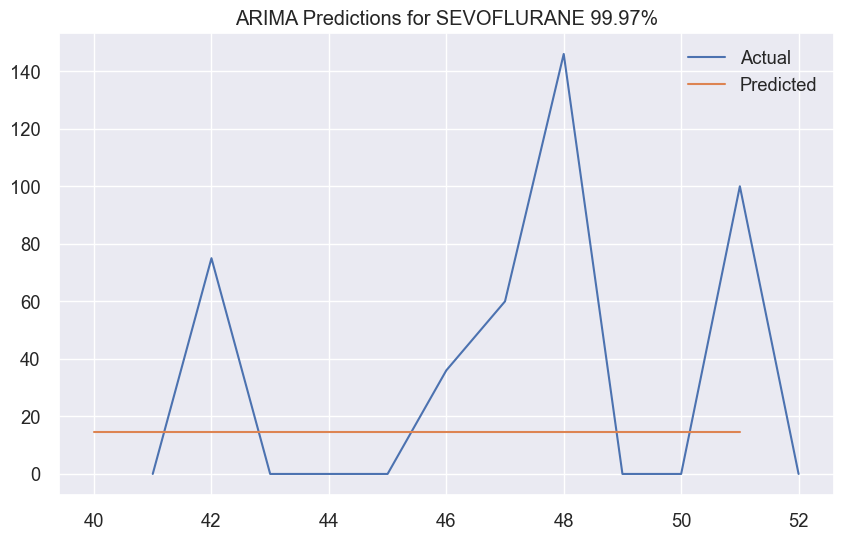

RMSE of SEVOFLURANE 99.97%: 51.77392426959124
MAPE of SEVOFLURANE 99.97%: inf%


C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



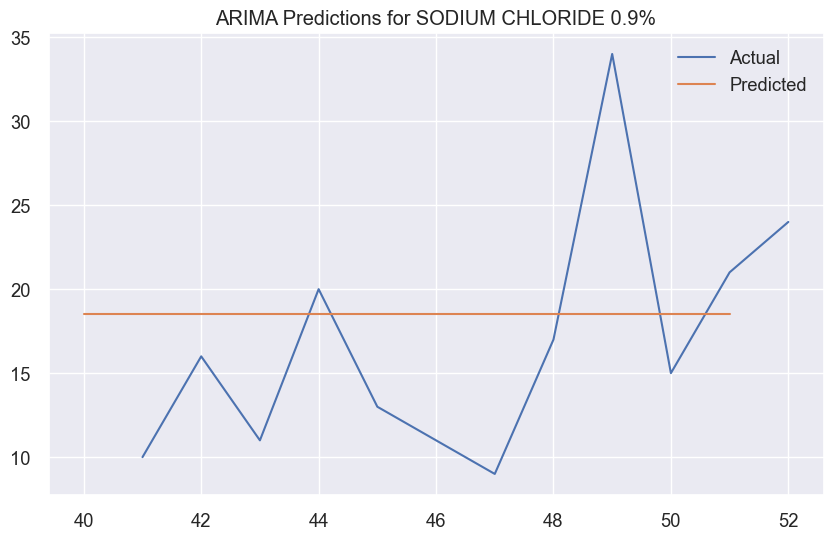

RMSE of SODIUM CHLORIDE 0.9%: 7.106014900811461
MAPE of SODIUM CHLORIDE 0.9%: 43.93%


C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



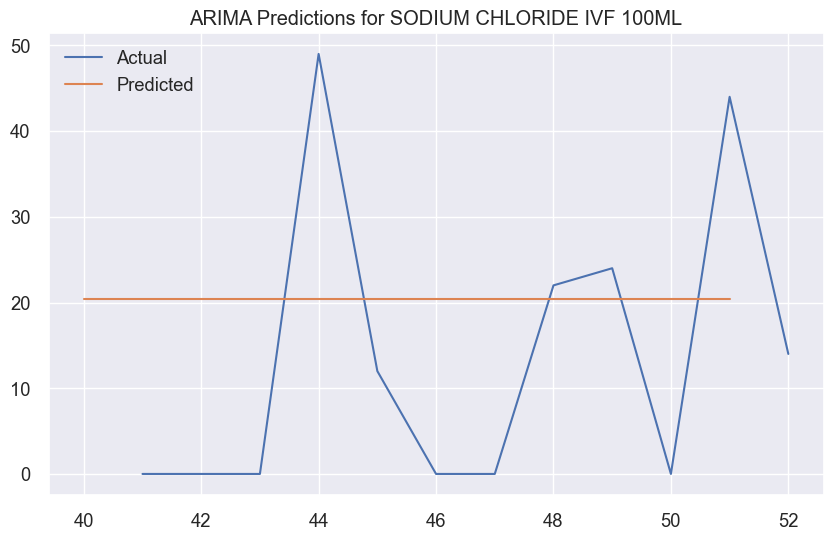

RMSE of SODIUM CHLORIDE IVF 100ML: 18.276640950204616
MAPE of SODIUM CHLORIDE IVF 100ML: inf%


C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Mukul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



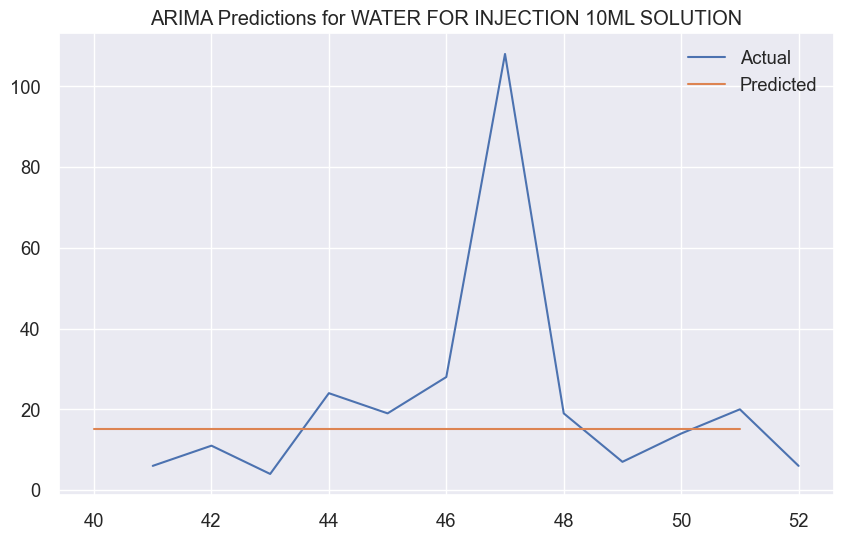

RMSE of WATER FOR INJECTION 10ML SOLUTION: 27.836871320224333
MAPE of WATER FOR INJECTION 10ML SOLUTION: 75.08%


In [84]:
'''
This code uses the ARIMA (AutoRegressive Integrated Moving Average) model to make time series predictions for
each column in the train and test dataframes. It iterates through the columns, fits an ARIMA model with a specific
order to the training data, makes predictions for the test data, and plots the actual and predicted values. It
calculates the Root Mean Squared Error (RMSE) and Mean Absolute Percentage Error (MAPE) for each column, providing
insights into the model's prediction accuracy.
'''
# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Iterate over each column in the train and test dataframes
for col in train.columns:
    # Fit the ARIMA model on the current column of the train dataframe
    model = ARIMA(train[col], order=(0,1,1))
    model_fit = model.fit()

    # Make predictions for the current column using the trained model
    start = len(train[col])
    end = len(train[col]) + len(test[col]) - 1
    pred = model_fit.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')

    # Plot the actual values and predicted values for the current column
    plt.figure(figsize=(10,6))
    plt.plot(test[col], label='Actual')
    plt.plot(pred, label='Predicted')
    plt.title(f"ARIMA Predictions for {col}")
    plt.legend()
    plt.show()

    # Calculate the RMSE for the current column
    col_rmse = sqrt(mean_squared_error(pred, test[col]))
    print(f"RMSE of {col}: {col_rmse}")

    # Calculate the MAPE for the current column
    col_mape = mean_absolute_percentage_error(test[col], pred)
    print(f"MAPE of {col}: {col_mape:.2f}%")

In [85]:
# Save the trained model as a pickle file
import pickle
with open('arima_mod.pkl', 'wb') as f:
    pickle.dump(model_fit, f)

# Vector Error Correction Model (VECM)

A Vector Error Correction Model (VECM) is a time series model used to analyze the relationship between multiple non-stationary variables. It extends the Vector Autoregression (VAR) model by including an error correction term. VECM is particularly valuable when dealing with variables that exhibit non-stationary behavior, meaning their statistical properties change over time. This model helps capture both the short-term dynamics and the long-term equilibrium relationships among these variables, making it a powerful tool in econometrics, finance, and various other fields for understanding and forecasting multivariate time series data.

ADF test p-value for SODIUM CHLORIDE IVF 100ML (INTRAVENOUS & OTHER STERILE SOLUTIONS): 0.539916394233299


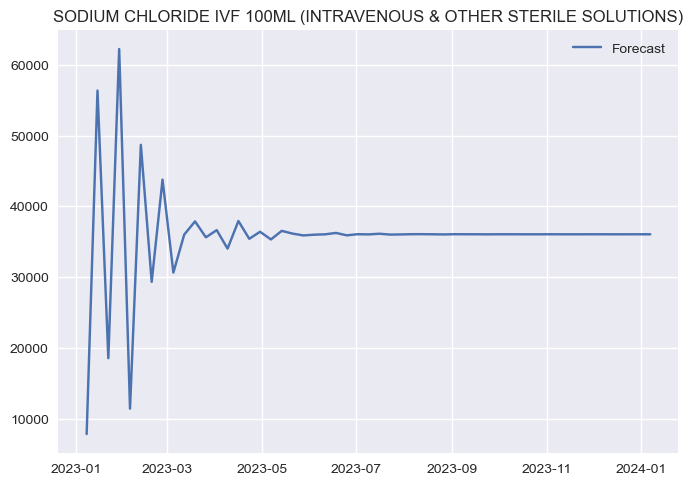


SODIUM CHLORIDE IVF 100ML (INTRAVENOUS & OTHER STERILE SOLUTIONS) Forecasted Quantities by Week:

       Week  Quantity
0    Week 1   7896.22
1    Week 2  56335.36
2    Week 3  18591.85
3    Week 4  62196.08
4    Week 5  11476.61
5    Week 6  48686.18
6    Week 7  29358.75
7    Week 8  43777.72
8    Week 9  30666.31
9   Week 10  36021.97
10  Week 11  37885.24
11  Week 12  35642.31
12  Week 13  36651.77
13  Week 14  34044.58
14  Week 15  37941.02
15  Week 16  35431.03
16  Week 17  36422.08
17  Week 18  35341.42
18  Week 19  36548.89
19  Week 20  36162.78
20  Week 21  35906.53
21  Week 22  36011.41
22  Week 23  36062.44
23  Week 24  36257.16
24  Week 25  35920.41
25  Week 26  36077.69
26  Week 27  36051.99
27  Week 28  36143.14
28  Week 29  36026.88
29  Week 30  36046.41
30  Week 31  36081.22
31  Week 32  36082.77
32  Week 33  36065.89
33  Week 34  36047.55
34  Week 35  36078.72
35  Week 36  36071.63
36  Week 37  36068.43
37  Week 38  36059.14
38  Week 39  36070.71
39  Week 40  36071.13

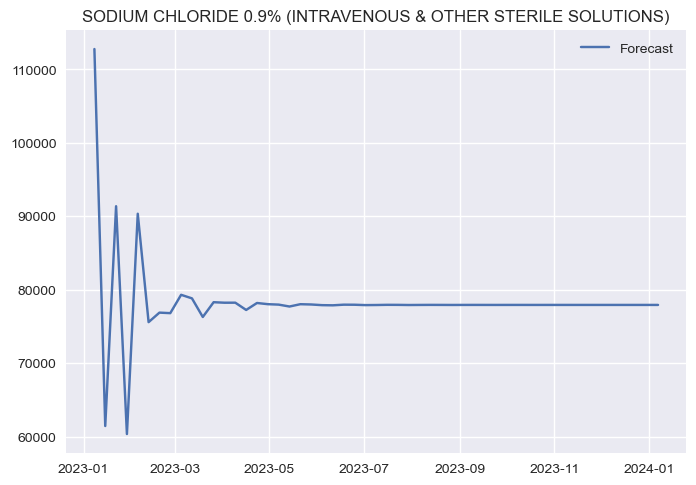


SODIUM CHLORIDE 0.9% (INTRAVENOUS & OTHER STERILE SOLUTIONS) Forecasted Quantities by Week:

        Week  Quantity
53    Week 1 112787.64
54    Week 2  61439.57
55    Week 3  91375.75
56    Week 4  60347.58
57    Week 5  90351.74
58    Week 6  75586.67
59    Week 7  76883.53
60    Week 8  76811.91
61    Week 9  79310.73
62   Week 10  78825.93
63   Week 11  76290.32
64   Week 12  78302.58
65   Week 13  78233.63
66   Week 14  78237.72
67   Week 15  77246.36
68   Week 16  78195.72
69   Week 17  78034.04
70   Week 18  77973.64
71   Week 19  77715.06
72   Week 20  78030.59
73   Week 21  77992.52
74   Week 22  77901.56
75   Week 23  77879.44
76   Week 24  77965.93
77   Week 25  77958.08
78   Week 26  77908.51
79   Week 27  77920.97
80   Week 28  77945.71
81   Week 29  77940.22
82   Week 30  77920.99
83   Week 31  77930.51
84   Week 32  77938.01
85   Week 33  77933.82
86   Week 34  77927.88
87   Week 35  77932.36
88   Week 36  77934.67
89   Week 37  77932.20
90   Week 38  77930.73
91   Week

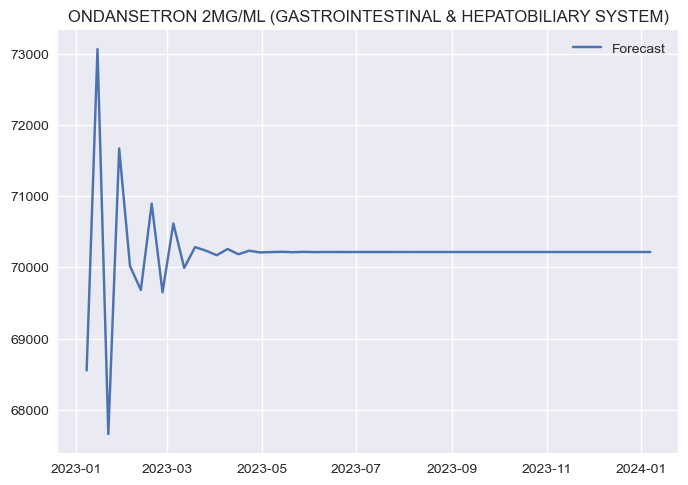


ONDANSETRON 2MG/ML (GASTROINTESTINAL & HEPATOBILIARY SYSTEM) Forecasted Quantities by Week:

        Week  Quantity
106   Week 1  68551.67
107   Week 2  73070.69
108   Week 3  67657.12
109   Week 4  71672.41
110   Week 5  70018.67
111   Week 6  69682.50
112   Week 7  70895.75
113   Week 8  69650.47
114   Week 9  70617.10
115  Week 10  69993.20
116  Week 11  70285.71
117  Week 12  70235.66
118  Week 13  70171.11
119  Week 14  70258.98
120  Week 15  70184.83
121  Week 16  70234.81
122  Week 17  70210.36
123  Week 18  70215.48
124  Week 19  70219.64
125  Week 20  70213.57
126  Week 21  70218.59
127  Week 22  70215.40
128  Week 23  70216.68
129  Week 24  70216.80
130  Week 25  70216.08
131  Week 26  70216.83
132  Week 27  70216.26
133  Week 28  70216.62
134  Week 29  70216.46
135  Week 30  70216.48
136  Week 31  70216.52
137  Week 32  70216.47
138  Week 33  70216.51
139  Week 34  70216.48
140  Week 35  70216.49
141  Week 36  70216.49
142  Week 37  70216.49
143  Week 38  70216.49
144  Week

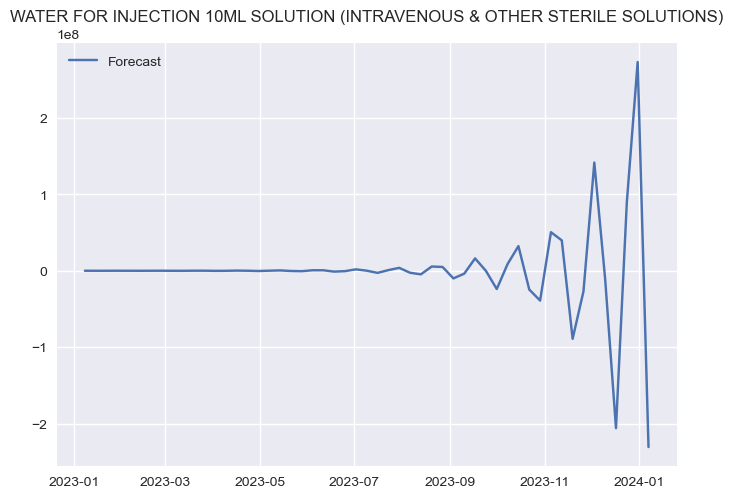


WATER FOR INJECTION 10ML SOLUTION (INTRAVENOUS & OTHER STERILE SOLUTIONS) Forecasted Quantities by Week:

        Week      Quantity
159   Week 1      33576.43
160   Week 2       9320.27
161   Week 3       3338.55
162   Week 4      54509.40
163   Week 5      14155.41
164   Week 6      -7486.26
165   Week 7      19358.13
166   Week 8      77757.25
167   Week 9     -11793.90
168  Week 10     -44562.51
169  Week 11      84308.56
170  Week 12      97491.03
171  Week 13    -105454.61
172  Week 14     -47546.64
173  Week 15     229425.23
174  Week 16      46280.99
175  Week 17    -299706.21
176  Week 18      96337.75
177  Week 19     466728.77
178  Week 20    -252535.37
179  Week 21    -543974.18
180  Week 22     626447.30
181  Week 23     638920.20
182  Week 24   -1099844.94
183  Week 25    -495572.74
184  Week 26    1864667.28
185  Week 27     123680.50
186  Week 28   -2750195.66
187  Week 29     859149.60
188  Week 30    3824961.50
189  Week 31   -2586023.08
190  Week 32   -4684451.39
19

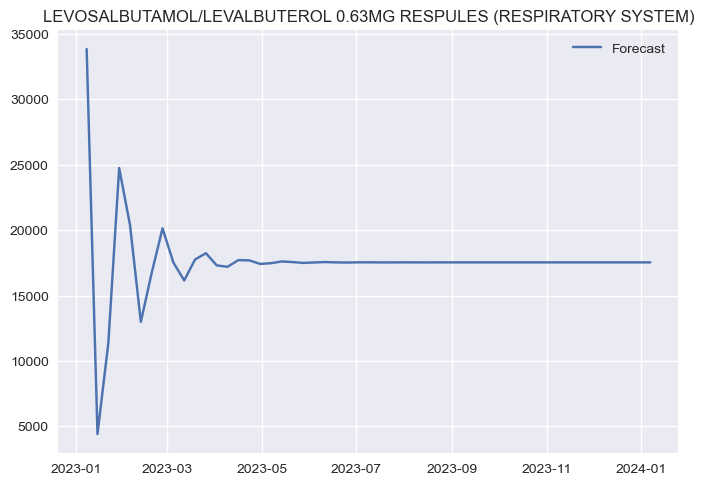


LEVOSALBUTAMOL/LEVALBUTEROL 0.63MG RESPULES (RESPIRATORY SYSTEM) Forecasted Quantities by Week:

        Week  Quantity
212   Week 1  33855.47
213   Week 2   4406.10
214   Week 3  11369.44
215   Week 4  24753.35
216   Week 5  20386.31
217   Week 6  12978.93
218   Week 7  16732.31
219   Week 8  20142.50
220   Week 9  17524.85
221  Week 10  16156.86
222  Week 11  17754.76
223  Week 12  18238.08
224  Week 13  17307.37
225  Week 14  17197.85
226  Week 15  17708.56
227  Week 16  17690.58
228  Week 17  17417.37
229  Week 18  17472.53
230  Week 19  17607.78
231  Week 20  17558.47
232  Week 21  17493.08
233  Week 22  17530.26
234  Week 23  17558.96
235  Week 24  17534.85
236  Week 25  17523.15
237  Week 26  17537.96
238  Week 27  17541.82
239  Week 28  17533.35
240  Week 29  17532.59
241  Week 30  17537.25
242  Week 31  17536.91
243  Week 32  17534.48
244  Week 33  17535.04
245  Week 34  17536.25
246  Week 35  17535.76
247  Week 36  17535.20
248  Week 37  17535.55
249  Week 38  17535.79
250  

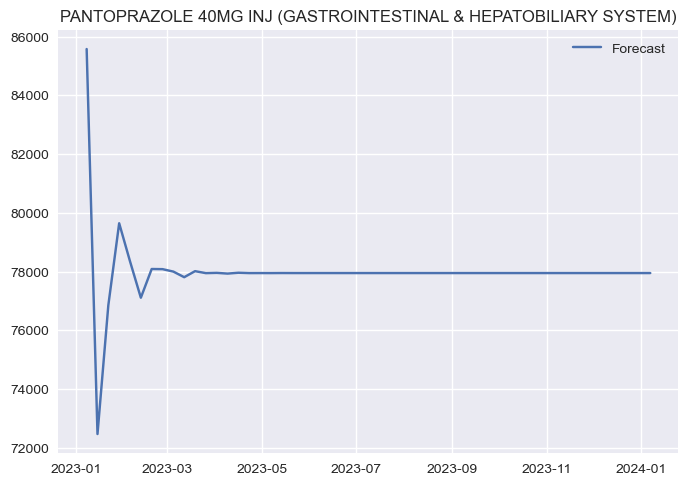


PANTOPRAZOLE 40MG INJ (GASTROINTESTINAL & HEPATOBILIARY SYSTEM) Forecasted Quantities by Week:

        Week  Quantity
265   Week 1  85580.41
266   Week 2  72469.64
267   Week 3  76854.76
268   Week 4  79647.21
269   Week 5  78351.06
270   Week 6  77111.50
271   Week 7  78089.08
272   Week 8  78084.32
273   Week 9  78000.63
274  Week 10  77810.47
275  Week 11  78015.70
276  Week 12  77948.34
277  Week 13  77957.69
278  Week 14  77933.37
279  Week 15  77962.02
280  Week 16  77949.87
281  Week 17  77950.93
282  Week 18  77949.99
283  Week 19  77952.26
284  Week 20  77951.15
285  Week 21  77950.95
286  Week 22  77951.24
287  Week 23  77951.27
288  Week 24  77951.21
289  Week 25  77951.16
290  Week 26  77951.22
291  Week 27  77951.20
292  Week 28  77951.20
293  Week 29  77951.20
294  Week 30  77951.20
295  Week 31  77951.20
296  Week 32  77951.20
297  Week 33  77951.20
298  Week 34  77951.20
299  Week 35  77951.20
300  Week 36  77951.20
301  Week 37  77951.20
302  Week 38  77951.20
303  W

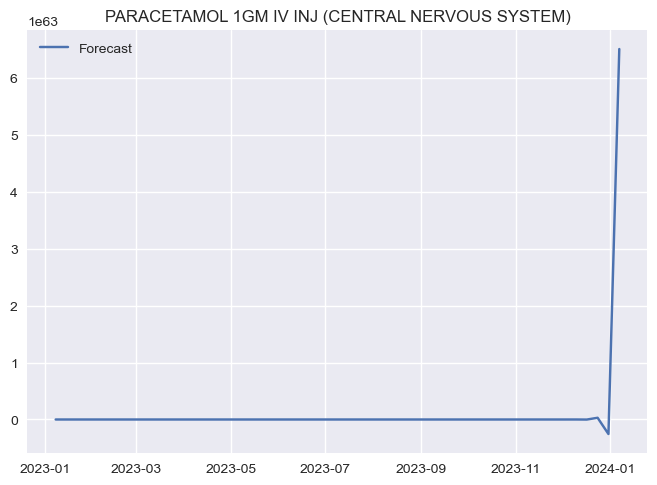


PARACETAMOL 1GM IV INJ (CENTRAL NERVOUS SYSTEM) Forecasted Quantities by Week:

        Week                                           Quantity
318   Week 1                                           20781.38
319   Week 2                                           40100.18
320   Week 3                                          445648.69
321   Week 4                                         1026585.13
322   Week 5                                        88592154.87
323   Week 6                                       165873699.71
324   Week 7                                     18600010912.49
325   Week 8                                     25755141077.04
326   Week 9                                   3910675355979.76
327  Week 10                                   3492642345351.93
328  Week 11                                 823179194743662.75
329  Week 12                                 328350165353740.38
330  Week 13                              173477272025184672.00
331  Week 14           

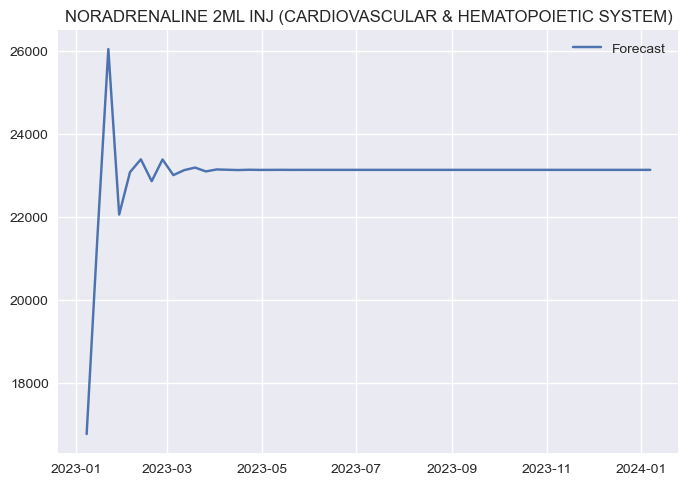


NORADRENALINE 2ML INJ (CARDIOVASCULAR & HEMATOPOIETIC SYSTEM) Forecasted Quantities by Week:

        Week  Quantity
371   Week 1  16777.09
372   Week 2  21551.63
373   Week 3  26047.23
374   Week 4  22062.03
375   Week 5  23082.58
376   Week 6  23391.55
377   Week 7  22865.45
378   Week 8  23387.54
379   Week 9  23011.17
380  Week 10  23131.11
381  Week 11  23192.40
382  Week 12  23100.43
383  Week 13  23147.67
384  Week 14  23139.87
385  Week 15  23133.10
386  Week 16  23140.79
387  Week 17  23136.27
388  Week 18  23137.20
389  Week 19  23138.49
390  Week 20  23136.89
391  Week 21  23137.72
392  Week 22  23137.64
393  Week 23  23137.41
394  Week 24  23137.63
395  Week 25  23137.52
396  Week 26  23137.54
397  Week 27  23137.56
398  Week 28  23137.53
399  Week 29  23137.55
400  Week 30  23137.55
401  Week 31  23137.54
402  Week 32  23137.55
403  Week 33  23137.55
404  Week 34  23137.55
405  Week 35  23137.55
406  Week 36  23137.55
407  Week 37  23137.55
408  Week 38  23137.55
409  Wee

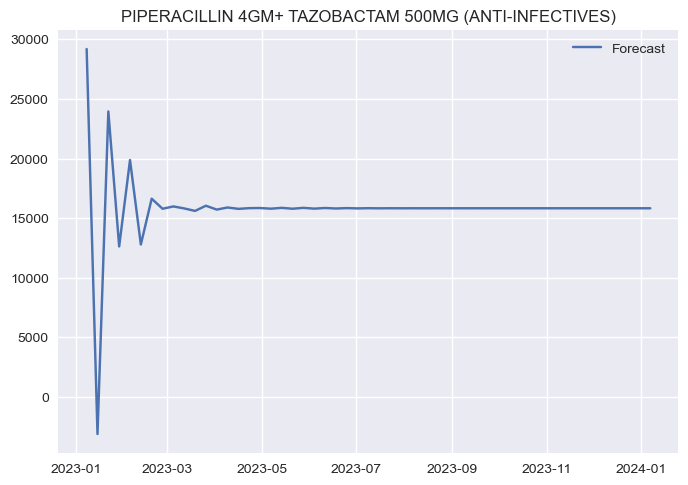


PIPERACILLIN 4GM+ TAZOBACTAM 500MG (ANTI-INFECTIVES) Forecasted Quantities by Week:

        Week  Quantity
424   Week 1  29192.35
425   Week 2  -3130.84
426   Week 3  23951.54
427   Week 4  12618.99
428   Week 5  19874.23
429   Week 6  12780.65
430   Week 7  16628.29
431   Week 8  15783.07
432   Week 9  15976.95
433  Week 10  15809.32
434  Week 11  15601.84
435  Week 12  16035.81
436  Week 13  15712.48
437  Week 14  15889.17
438  Week 15  15773.88
439  Week 16  15833.53
440  Week 17  15843.69
441  Week 18  15788.48
442  Week 19  15858.70
443  Week 20  15784.56
444  Week 21  15857.96
445  Week 22  15791.91
446  Week 23  15846.42
447  Week 24  15803.42
448  Week 25  15836.30
449  Week 26  15812.29
450  Week 27  15828.96
451  Week 28  15817.84
452  Week 29  15824.98
453  Week 30  15820.62
454  Week 31  15823.13
455  Week 32  15821.75
456  Week 33  15822.49
457  Week 34  15822.09
458  Week 35  15822.33
459  Week 36  15822.14
460  Week 37  15822.33
461  Week 38  15822.13
462  Week 39  158

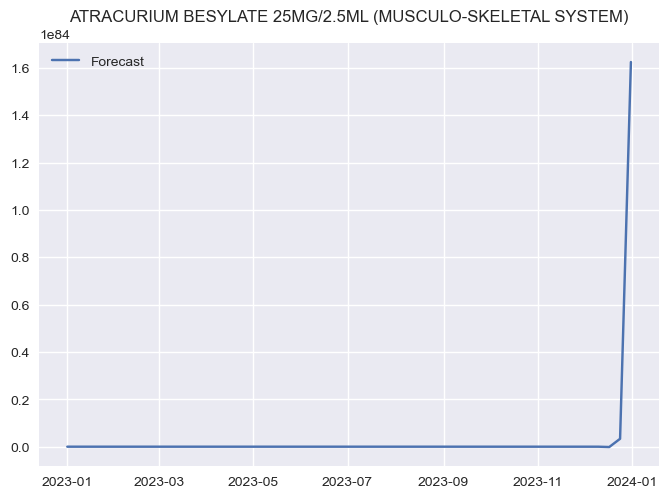


ATRACURIUM BESYLATE 25MG/2.5ML (MUSCULO-SKELETAL SYSTEM) Forecasted Quantities by Week:

        Week                                           Quantity
477   Week 1                                          -12261.56
478   Week 2                                           -2126.64
479   Week 3                                       -32713545.52
480   Week 4                                        12052501.34
481   Week 5                                     38496955002.98
482   Week 6                                    -47348885334.46
483   Week 7                                 -45345145865703.19
484   Week 8                                  94793055803887.88
485   Week 9                               53377955666265728.00
486  Week 10                             -157630903528477184.00
487  Week 11                           -62794189858234564608.00
488  Week 12                           239805941584819388416.00
489  Week 13                         73824785877919799967744.00
490  Week 14  

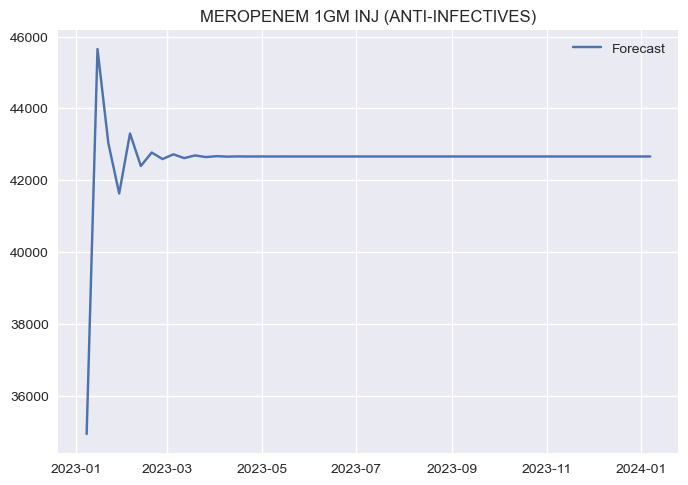


MEROPENEM 1GM INJ (ANTI-INFECTIVES) Forecasted Quantities by Week:

        Week  Quantity
530   Week 1  34930.61
531   Week 2  45651.19
532   Week 3  43032.70
533   Week 4  41629.31
534   Week 5  43298.07
535   Week 6  42393.93
536   Week 7  42769.09
537   Week 8  42587.47
538   Week 9  42719.35
539  Week 10  42613.37
540  Week 11  42688.79
541  Week 12  42642.59
542  Week 13  42667.76
543  Week 14  42654.85
544  Week 15  42661.52
545  Week 16  42657.89
546  Week 17  42659.95
547  Week 18  42658.80
548  Week 19  42659.40
549  Week 20  42659.12
550  Week 21  42659.23
551  Week 22  42659.20
552  Week 23  42659.20
553  Week 24  42659.21
554  Week 25  42659.19
555  Week 26  42659.21
556  Week 27  42659.20
557  Week 28  42659.20
558  Week 29  42659.20
559  Week 30  42659.20
560  Week 31  42659.20
561  Week 32  42659.20
562  Week 33  42659.20
563  Week 34  42659.20
564  Week 35  42659.20
565  Week 36  42659.20
566  Week 37  42659.20
567  Week 38  42659.20
568  Week 39  42659.20
569  Week 4

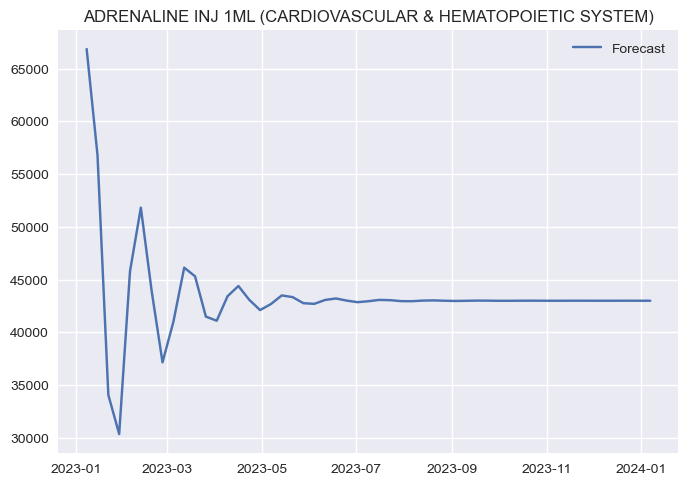


ADRENALINE INJ 1ML (CARDIOVASCULAR & HEMATOPOIETIC SYSTEM) Forecasted Quantities by Week:

        Week  Quantity
583   Week 1  66868.59
584   Week 2  56816.87
585   Week 3  34055.64
586   Week 4  30342.36
587   Week 5  45782.25
588   Week 6  51818.72
589   Week 7  43892.01
590   Week 8  37145.77
591   Week 9  40977.71
592  Week 10  46124.47
593  Week 11  45307.59
594  Week 12  41481.70
595  Week 13  41092.60
596  Week 14  43416.78
597  Week 15  44386.13
598  Week 16  43077.18
599  Week 17  42102.02
600  Week 18  42674.28
601  Week 19  43492.02
602  Week 20  43332.25
603  Week 21  42754.28
604  Week 22  42694.06
605  Week 23  43062.27
606  Week 24  43202.44
607  Week 25  42999.86
608  Week 26  42849.72
609  Week 27  42942.43
610  Week 28  43066.92
611  Week 29  43040.75
612  Week 30  42950.97
613  Week 31  42943.41
614  Week 32  43000.48
615  Week 33  43021.47
616  Week 34  42989.56
617  Week 35  42966.84
618  Week 36  42981.56
619  Week 37  43000.69
620  Week 38  42996.28
621  Week 3

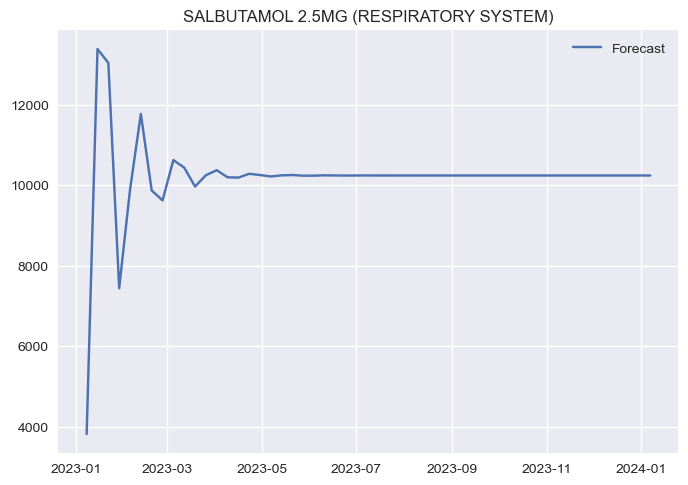


SALBUTAMOL 2.5MG (RESPIRATORY SYSTEM) Forecasted Quantities by Week:

        Week  Quantity
636   Week 1   3822.40
637   Week 2  13383.79
638   Week 3  13040.06
639   Week 4   7443.23
640   Week 5   9886.47
641   Week 6  11773.02
642   Week 7   9871.16
643   Week 8   9625.00
644   Week 9  10625.82
645  Week 10  10438.97
646  Week 11   9969.35
647  Week 12  10248.91
648  Week 13  10374.27
649  Week 14  10198.23
650  Week 15  10190.87
651  Week 16  10285.83
652  Week 17  10254.22
653  Week 18  10218.55
654  Week 19  10246.30
655  Week 20  10254.99
656  Week 21  10237.72
657  Week 22  10239.49
658  Week 23  10247.54
659  Week 24  10243.85
660  Week 25  10241.07
661  Week 26  10243.91
662  Week 27  10244.32
663  Week 28  10242.74
664  Week 29  10243.09
665  Week 30  10243.76
666  Week 31  10243.35
667  Week 32  10243.15
668  Week 33  10243.43
669  Week 34  10243.43
670  Week 35  10243.29
671  Week 36  10243.34
672  Week 37  10243.39
673  Week 38  10243.35
674  Week 39  10243.34
675  Week

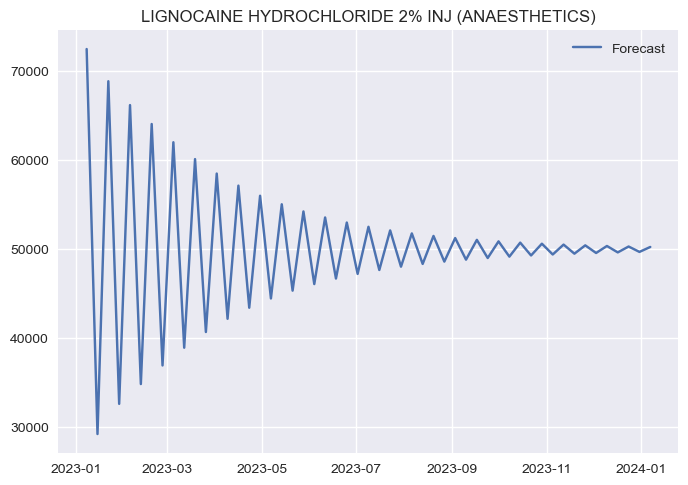


LIGNOCAINE HYDROCHLORIDE 2% INJ (ANAESTHETICS) Forecasted Quantities by Week:

        Week  Quantity
689   Week 1  72484.02
690   Week 2  29244.21
691   Week 3  68867.28
692   Week 4  32632.27
693   Week 5  66186.66
694   Week 6  34856.40
695   Week 7  64063.81
696   Week 8  36945.94
697   Week 9  62014.30
698  Week 10  38937.95
699  Week 11  60120.79
700  Week 12  40701.08
701  Week 13  58497.87
702  Week 14  42186.48
703  Week 15  57140.85
704  Week 16  43427.26
705  Week 17  56004.49
706  Week 18  44469.29
707  Week 19  55048.32
708  Week 20  45346.82
709  Week 21  54243.11
710  Week 22  46085.47
711  Week 23  53565.68
712  Week 24  46706.65
713  Week 25  52996.12
714  Week 26  47228.89
715  Week 27  52517.27
716  Week 28  47667.97
717  Week 29  52114.64
718  Week 30  48037.17
719  Week 31  51776.09
720  Week 32  48347.62
721  Week 33  51491.42
722  Week 34  48608.65
723  Week 35  51252.06
724  Week 36  48828.14
725  Week 37  51050.80
726  Week 38  49012.69
727  Week 39  50881.57


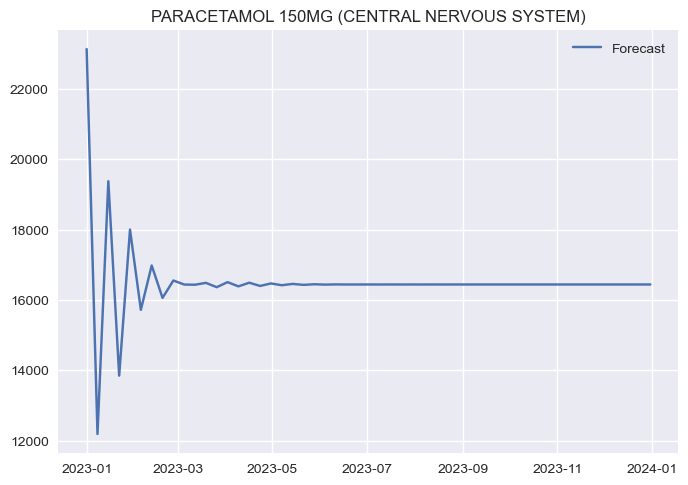


PARACETAMOL 150MG (CENTRAL NERVOUS SYSTEM) Forecasted Quantities by Week:

        Week  Quantity
742   Week 1  23138.07
743   Week 2  12188.54
744   Week 3  19378.79
745   Week 4  13849.17
746   Week 5  18003.77
747   Week 6  15720.90
748   Week 7  16982.19
749   Week 8  16061.06
750   Week 9  16554.61
751  Week 10  16440.16
752  Week 11  16434.86
753  Week 12  16488.13
754  Week 13  16364.48
755  Week 14  16508.49
756  Week 15  16388.30
757  Week 16  16492.03
758  Week 17  16400.36
759  Week 18  16470.74
760  Week 19  16420.53
761  Week 20  16457.83
762  Week 21  16431.33
763  Week 22  16447.98
764  Week 23  16437.94
765  Week 24  16443.88
766  Week 25  16441.09
767  Week 26  16441.75
768  Week 27  16442.14
769  Week 28  16441.22
770  Week 29  16442.42
771  Week 30  16441.20
772  Week 31  16442.28
773  Week 32  16441.37
774  Week 33  16442.11
775  Week 34  16441.54
776  Week 35  16441.95
777  Week 36  16441.66
778  Week 37  16441.86
779  Week 38  16441.74
780  Week 39  16441.81
781 

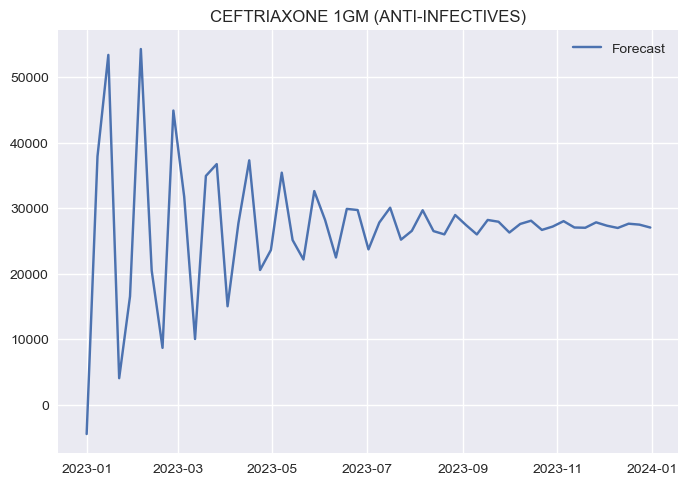


CEFTRIAXONE 1GM (ANTI-INFECTIVES) Forecasted Quantities by Week:

        Week  Quantity
795   Week 1  -4460.88
796   Week 2  37883.25
797   Week 3  53364.34
798   Week 4   4054.00
799   Week 5  16534.51
800   Week 6  54261.04
801   Week 7  20469.00
802   Week 8   8681.69
803   Week 9  44879.45
804  Week 10  31718.10
805  Week 11  10032.04
806  Week 12  34907.43
807  Week 13  36709.65
808  Week 14  15024.77
809  Week 15  27675.99
810  Week 16  37283.49
811  Week 17  20554.78
812  Week 18  23612.36
813  Week 19  35401.98
814  Week 20  25125.80
815  Week 21  22158.73
816  Week 22  32593.68
817  Week 23  28172.11
818  Week 24  22468.56
819  Week 25  29876.28
820  Week 26  29706.66
821  Week 27  23700.79
822  Week 28  27797.32
823  Week 29  30058.92
824  Week 30  25185.62
825  Week 31  26528.09
826  Week 32  29668.78
827  Week 33  26490.96
828  Week 34  25990.35
829  Week 35  28944.88
830  Week 36  27412.02
831  Week 37  25981.49
832  Week 38  28189.95
833  Week 39  27916.66
834  Week 40 

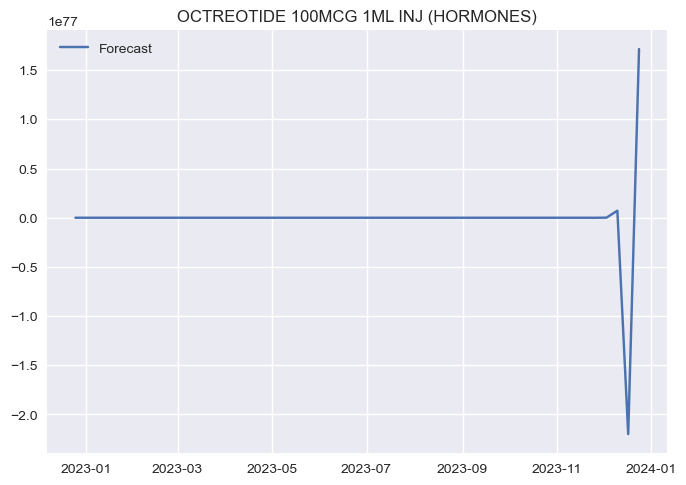


OCTREOTIDE 100MCG 1ML INJ (HORMONES) Forecasted Quantities by Week:

        Week                                           Quantity
848   Week 1                                         2603862.87
849   Week 2                                       -96514805.99
850   Week 3                                      2245656287.90
851   Week 4                                    -27228748937.66
852   Week 5                                    106486146027.29
853   Week 6                                  -6737047040431.41
854   Week 7                                 557259240969159.19
855   Week 8                              -18212342452250704.00
856   Week 9                              277454285628638208.00
857  Week 10                             -123243812679898496.00
858  Week 11                           -38271001925657624576.00
859  Week 12                         -2114012132459967938560.00
860  Week 13                        133976270699495977648128.00
861  Week 14                      

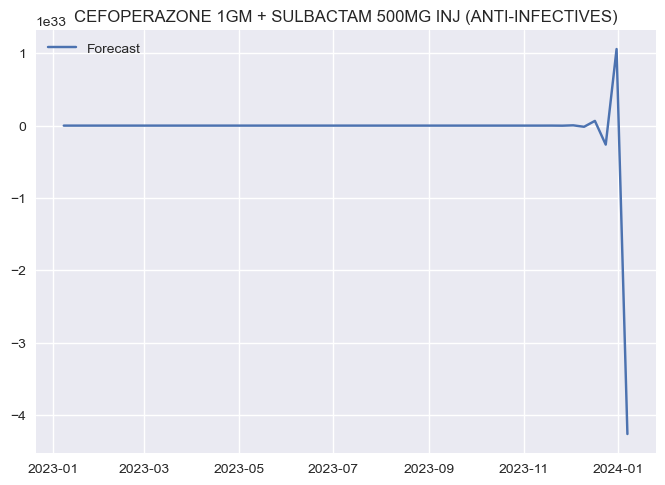


CEFOPERAZONE 1GM + SULBACTAM 500MG INJ (ANTI-INFECTIVES) Forecasted Quantities by Week:

        Week                               Quantity
901   Week 1                                4464.12
902   Week 2                                3862.62
903   Week 3                                8564.10
904   Week 4                               34972.47
905   Week 5                               24310.07
906   Week 6                              309343.47
907   Week 7                             -265767.14
908   Week 8                             3413431.43
909   Week 9                            -8170042.78
910  Week 10                            46143379.70
911  Week 11                          -154405081.95
912  Week 12                           696300173.42
913  Week 13                         -2627393988.70
914  Week 14                         10999434063.42
915  Week 15                        -43302509859.24
916  Week 16                        176735036547.82
917  Week 17              

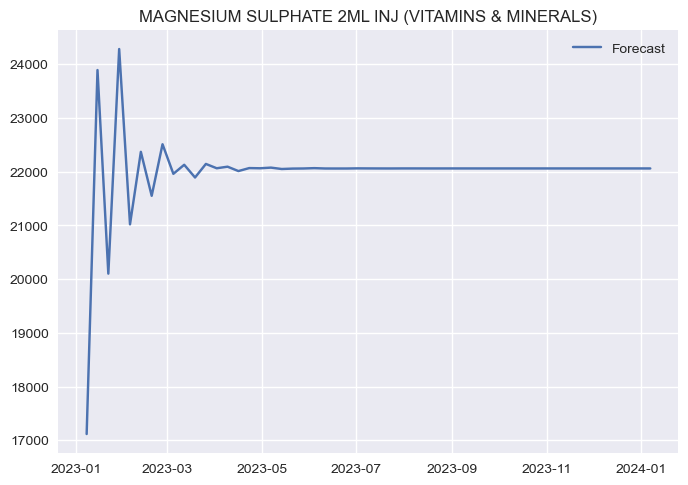


MAGNESIUM SULPHATE 2ML INJ (VITAMINS & MINERALS) Forecasted Quantities by Week:

         Week  Quantity
954    Week 1  17117.18
955    Week 2  23893.41
956    Week 3  20102.90
957    Week 4  24284.44
958    Week 5  21020.40
959    Week 6  22370.54
960    Week 7  21552.17
961    Week 8  22512.05
962    Week 9  21961.19
963   Week 10  22129.56
964   Week 11  21892.84
965   Week 12  22145.27
966   Week 13  22064.81
967   Week 14  22094.03
968   Week 15  22012.63
969   Week 16  22068.15
970   Week 17  22064.54
971   Week 18  22076.61
972   Week 19  22050.97
973   Week 20  22058.60
974   Week 21  22060.55
975   Week 22  22066.90
976   Week 23  22060.41
977   Week 24  22059.93
978   Week 25  22060.15
979   Week 26  22062.81
980   Week 27  22061.78
981   Week 28  22061.10
982   Week 29  22060.74
983   Week 30  22061.57
984   Week 31  22061.62
985   Week 32  22061.42
986   Week 33  22061.16
987   Week 34  22061.33
988   Week 35  22061.44
989   Week 36  22061.43
990   Week 37  22061.32
991   

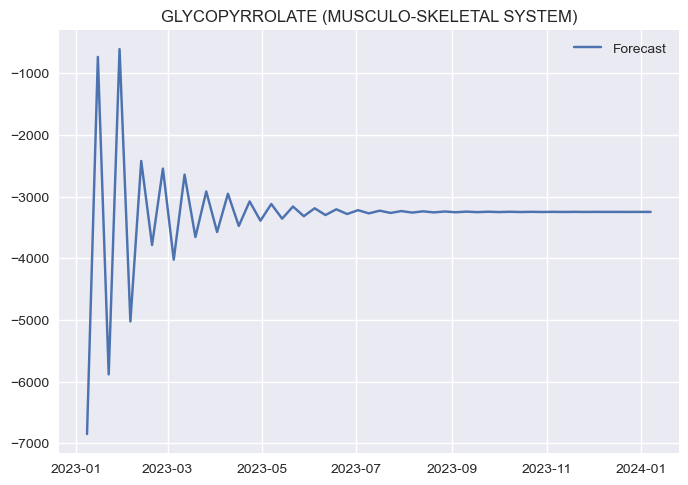


GLYCOPYRROLATE (MUSCULO-SKELETAL SYSTEM) Forecasted Quantities by Week:

         Week  Quantity
1007   Week 1  -6850.50
1008   Week 2   -733.46
1009   Week 3  -5883.14
1010   Week 4   -606.11
1011   Week 5  -5025.72
1012   Week 6  -2421.47
1013   Week 7  -3785.02
1014   Week 8  -2545.34
1015   Week 9  -4021.89
1016  Week 10  -2642.86
1017  Week 11  -3655.32
1018  Week 12  -2916.29
1019  Week 13  -3574.35
1020  Week 14  -2952.87
1021  Week 15  -3475.91
1022  Week 16  -3077.83
1023  Week 17  -3390.43
1024  Week 18  -3119.59
1025  Week 19  -3357.62
1026  Week 20  -3160.89
1027  Week 21  -3317.25
1028  Week 22  -3189.41
1029  Week 23  -3298.57
1030  Week 24  -3205.64
1031  Week 25  -3282.22
1032  Week 26  -3219.94
1033  Week 27  -3271.52
1034  Week 28  -3228.02
1035  Week 29  -3264.50
1036  Week 30  -3234.39
1037  Week 31  -3259.17
1038  Week 32  -3238.56
1039  Week 33  -3255.82
1040  Week 34  -3241.44
1041  Week 35  -3253.34
1042  Week 36  -3243.49
1043  Week 37  -3251.69
1044  Week 38 

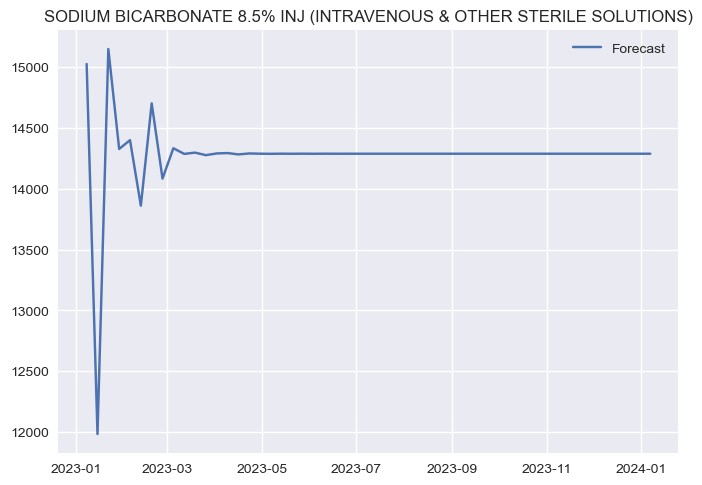


SODIUM BICARBONATE 8.5% INJ (INTRAVENOUS & OTHER STERILE SOLUTIONS) Forecasted Quantities by Week:

         Week  Quantity
1060   Week 1  15022.92
1061   Week 2  11985.97
1062   Week 3  15145.55
1063   Week 4  14325.38
1064   Week 5  14397.91
1065   Week 6  13860.02
1066   Week 7  14699.72
1067   Week 8  14082.40
1068   Week 9  14331.36
1069  Week 10  14285.08
1070  Week 11  14295.28
1071  Week 12  14274.71
1072  Week 13  14288.64
1073  Week 14  14291.74
1074  Week 15  14280.68
1075  Week 16  14288.55
1076  Week 17  14286.55
1077  Week 18  14285.62
1078  Week 19  14286.73
1079  Week 20  14286.07
1080  Week 21  14286.64
1081  Week 22  14285.98
1082  Week 23  14286.59
1083  Week 24  14286.19
1084  Week 25  14286.39
1085  Week 26  14286.30
1086  Week 27  14286.34
1087  Week 28  14286.32
1088  Week 29  14286.33
1089  Week 30  14286.33
1090  Week 31  14286.33
1091  Week 32  14286.33
1092  Week 33  14286.33
1093  Week 34  14286.33
1094  Week 35  14286.33
1095  Week 36  14286.33
1096  Week 

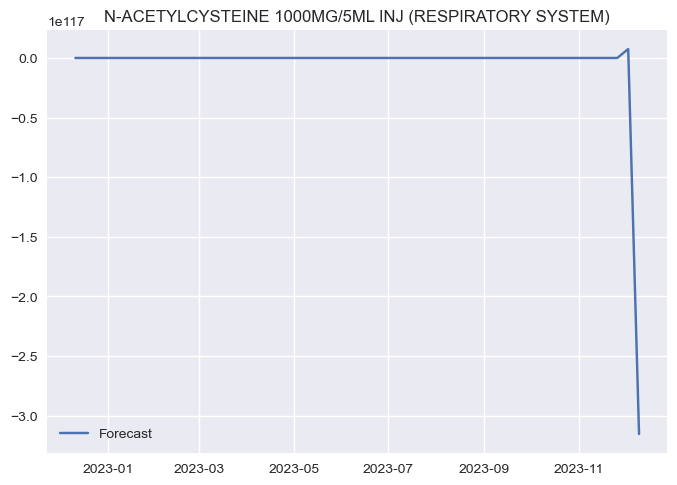


N-ACETYLCYSTEINE 1000MG/5ML INJ (RESPIRATORY SYSTEM) Forecasted Quantities by Week:

         Week                                           Quantity
1113   Week 1                                           -4229.94
1114   Week 2                                           10718.14
1115   Week 3                                       819964659.53
1116   Week 4                                      6338594975.51
1117   Week 5                                 -19018282805777.48
1118   Week 6                                -295676129428959.38
1119   Week 7                              439963101792623488.00
1120   Week 8                            10306031422822256640.00
1121   Week 9                        -10150949192963209560064.00
1122  Week 10                       -318806234046868142161920.00
1123  Week 11                     233573798159577213705388032.00
1124  Week 12                    9234833803936611589433589760.00
1125  Week 13                -5359737637113891011508647755776.00
1126

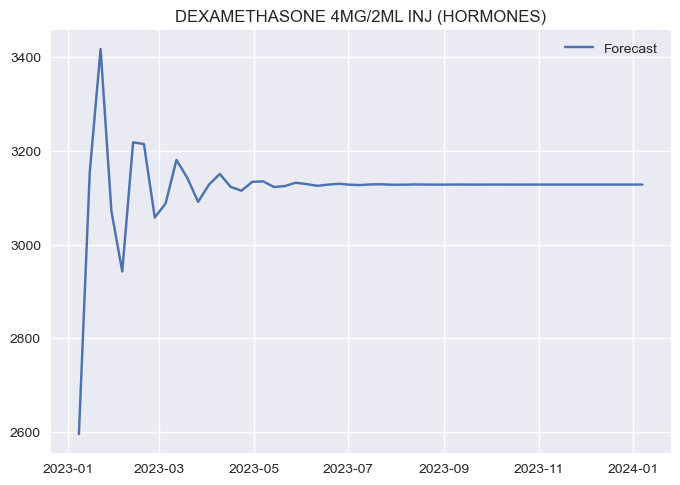


DEXAMETHASONE 4MG/2ML INJ (HORMONES) Forecasted Quantities by Week:

         Week  Quantity
1166   Week 1   2595.78
1167   Week 2   3154.47
1168   Week 3   3417.81
1169   Week 4   3071.49
1170   Week 5   2942.81
1171   Week 6   3218.58
1172   Week 7   3214.85
1173   Week 8   3058.12
1174   Week 9   3088.19
1175  Week 10   3181.03
1176  Week 11   3142.68
1177  Week 12   3091.47
1178  Week 13   3128.34
1179  Week 14   3151.08
1180  Week 15   3123.50
1181  Week 16   3115.37
1182  Week 17   3134.25
1183  Week 18   3135.28
1184  Week 19   3123.18
1185  Week 20   3125.27
1186  Week 21   3132.34
1187  Week 22   3129.46
1188  Week 23   3125.71
1189  Week 24   3128.32
1190  Week 25   3130.09
1191  Week 26   3128.06
1192  Week 27   3127.41
1193  Week 28   3128.82
1194  Week 29   3128.91
1195  Week 30   3128.01
1196  Week 31   3128.15
1197  Week 32   3128.68
1198  Week 33   3128.48
1199  Week 34   3128.19
1200  Week 35   3128.38
1201  Week 36   3128.52
1202  Week 37   3128.37
1203  Week 38   31

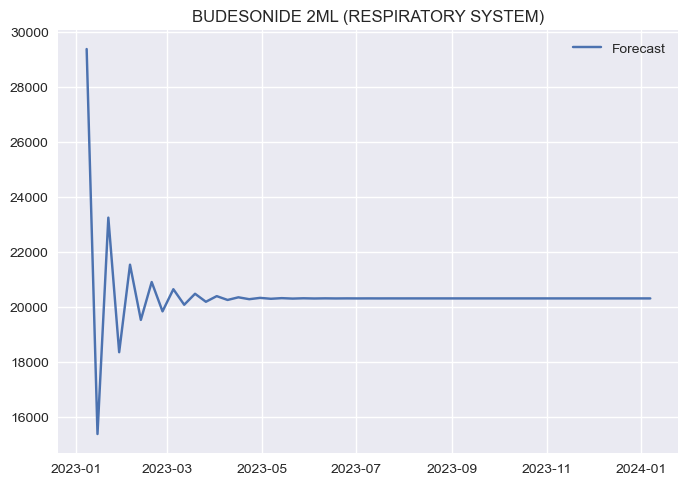


BUDESONIDE 2ML (RESPIRATORY SYSTEM) Forecasted Quantities by Week:

         Week  Quantity
1219   Week 1  29394.37
1220   Week 2  15373.49
1221   Week 3  23253.99
1222   Week 4  18352.67
1223   Week 5  21540.85
1224   Week 6  19530.28
1225   Week 7  20909.67
1226   Week 8  19840.63
1227   Week 9  20647.14
1228  Week 10  20081.47
1229  Week 11  20481.65
1230  Week 12  20189.95
1231  Week 13  20395.23
1232  Week 14  20256.38
1233  Week 15  20352.46
1234  Week 16  20283.97
1235  Week 17  20331.89
1236  Week 18  20298.96
1237  Week 19  20322.06
1238  Week 20  20305.63
1239  Week 21  20317.09
1240  Week 22  20309.19
1241  Week 23  20314.71
1242  Week 24  20310.83
1243  Week 25  20313.52
1244  Week 26  20311.66
1245  Week 27  20312.96
1246  Week 28  20312.05
1247  Week 29  20312.68
1248  Week 30  20312.24
1249  Week 31  20312.55
1250  Week 32  20312.34
1251  Week 33  20312.49
1252  Week 34  20312.38
1253  Week 35  20312.45
1254  Week 36  20312.40
1255  Week 37  20312.44
1256  Week 38  2031

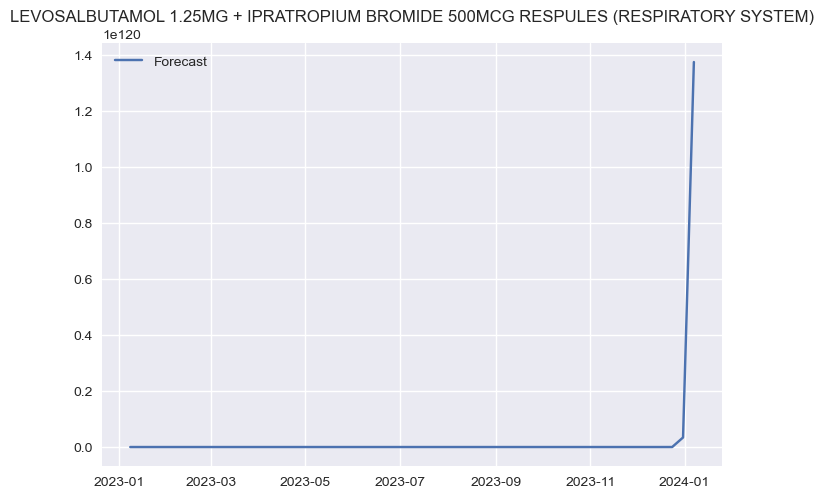


LEVOSALBUTAMOL 1.25MG + IPRATROPIUM BROMIDE 500MCG RESPULES (RESPIRATORY SYSTEM) Forecasted Quantities by Week:

         Week                                           Quantity
1272   Week 1                                           12102.11
1273   Week 2                                       143672989.64
1274   Week 3                                       463037740.16
1275   Week 4                                   3728360210266.13
1276   Week 5                                  17689618552234.45
1277   Week 6                               96854197514889504.00
1278   Week 7                              606436126044048000.00
1279   Week 8                          2516271957323602198528.00
1280   Week 9                         19569232411922763087872.00
1281  Week 10                      65378532822608006132793344.00
1282  Week 11                     607469475681717785592856576.00
1283  Week 12                 1698834961329298272438513041408.00
1284  Week 13                183551717999

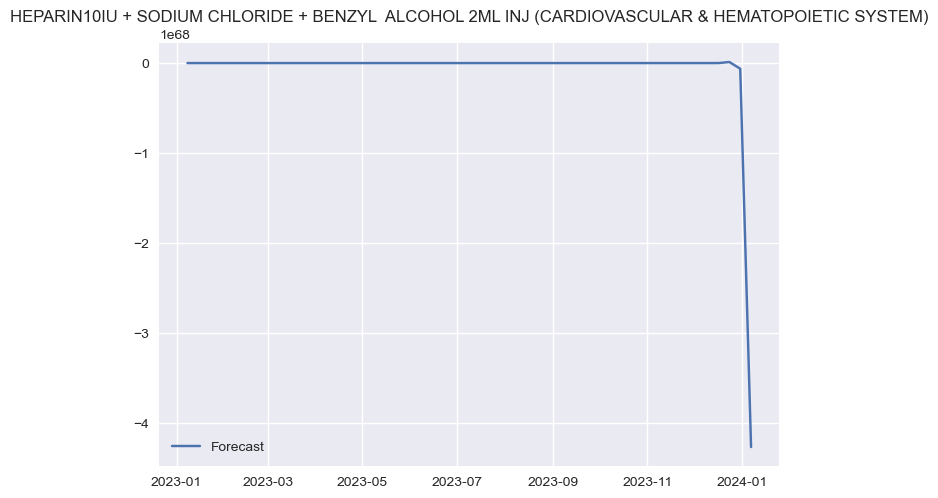


HEPARIN10IU + SODIUM CHLORIDE + BENZYL  ALCOHOL 2ML INJ (CARDIOVASCULAR & HEMATOPOIETIC SYSTEM) Forecasted Quantities by Week:

         Week                                           Quantity
1325   Week 1                                            8880.96
1326   Week 2                                            7949.99
1327   Week 3                                           39243.17
1328   Week 4                                          -28202.55
1329   Week 5                                       -10842330.29
1330   Week 6                                        15295548.48
1331   Week 7                                      4002484556.60
1332   Week 8                                     -6317528347.26
1333   Week 9                                  -1476173408353.31
1334  Week 10                                   2580818436283.11
1335  Week 11                                 544392689121444.38
1336  Week 12                               -1044408942781304.75
1337  Week 13             

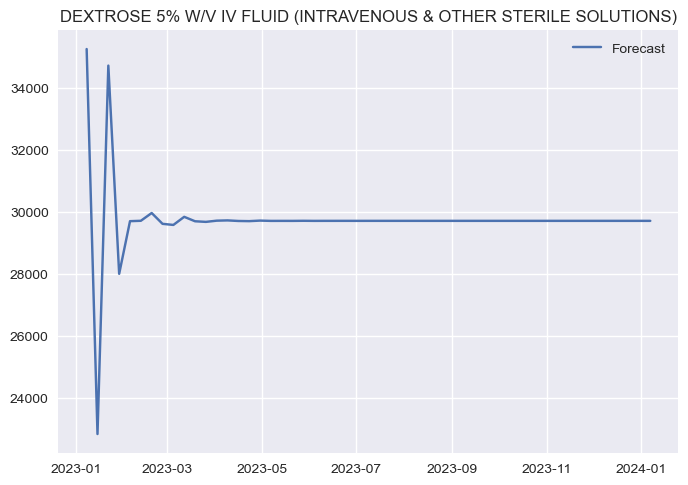


DEXTROSE 5% W/V IV FLUID (INTRAVENOUS & OTHER STERILE SOLUTIONS) Forecasted Quantities by Week:

         Week  Quantity
1378   Week 1  35239.56
1379   Week 2  22849.96
1380   Week 3  34706.14
1381   Week 4  28005.74
1382   Week 5  29699.97
1383   Week 6  29712.28
1384   Week 7  29962.42
1385   Week 8  29614.15
1386   Week 9  29578.83
1387  Week 10  29839.28
1388  Week 11  29696.77
1389  Week 12  29677.11
1390  Week 13  29715.90
1391  Week 14  29724.54
1392  Week 15  29706.11
1393  Week 16  29700.78
1394  Week 17  29718.20
1395  Week 18  29708.74
1396  Week 19  29709.36
1397  Week 20  29708.95
1398  Week 21  29712.01
1399  Week 22  29709.13
1400  Week 23  29710.07
1401  Week 24  29710.07
1402  Week 25  29710.34
1403  Week 26  29709.80
1404  Week 27  29710.14
1405  Week 28  29710.08
1406  Week 29  29710.09
1407  Week 30  29710.01
1408  Week 31  29710.10
1409  Week 32  29710.06
1410  Week 33  29710.07
1411  Week 34  29710.06
1412  Week 35  29710.07
1413  Week 36  29710.06
1414  Week 37 

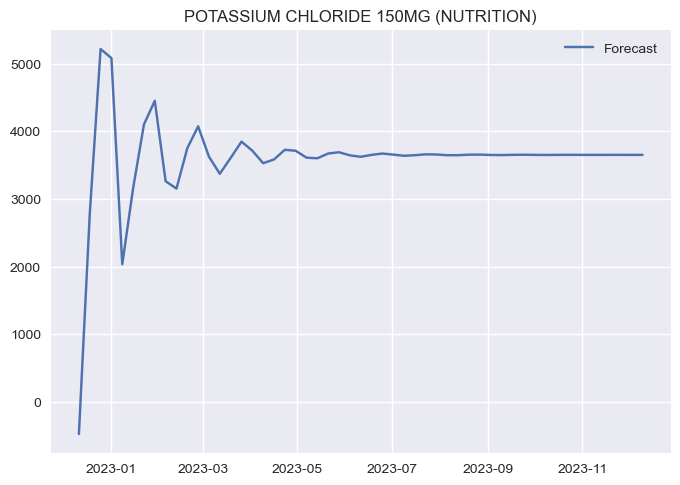


POTASSIUM CHLORIDE 150MG (NUTRITION) Forecasted Quantities by Week:

         Week  Quantity
1431   Week 1   -475.73
1432   Week 2   2772.76
1433   Week 3   5214.65
1434   Week 4   5080.85
1435   Week 5   2033.45
1436   Week 6   3155.09
1437   Week 7   4099.41
1438   Week 8   4449.55
1439   Week 9   3261.46
1440  Week 10   3151.42
1441  Week 11   3748.57
1442  Week 12   4071.99
1443  Week 13   3623.18
1444  Week 14   3371.00
1445  Week 15   3605.19
1446  Week 16   3846.13
1447  Week 17   3712.24
1448  Week 18   3527.08
1449  Week 19   3582.50
1450  Week 20   3725.41
1451  Week 21   3710.67
1452  Week 22   3608.78
1453  Week 23   3600.06
1454  Week 24   3670.29
1455  Week 25   3688.95
1456  Week 26   3643.16
1457  Week 27   3621.73
1458  Week 28   3649.98
1459  Week 29   3670.14
1460  Week 30   3653.96
1461  Week 31   3636.90
1462  Week 32   3645.15
1463  Week 33   3658.62
1464  Week 34   3655.27
1465  Week 35   3645.22
1466  Week 36   3645.74
1467  Week 37   3652.89
1468  Week 38   36

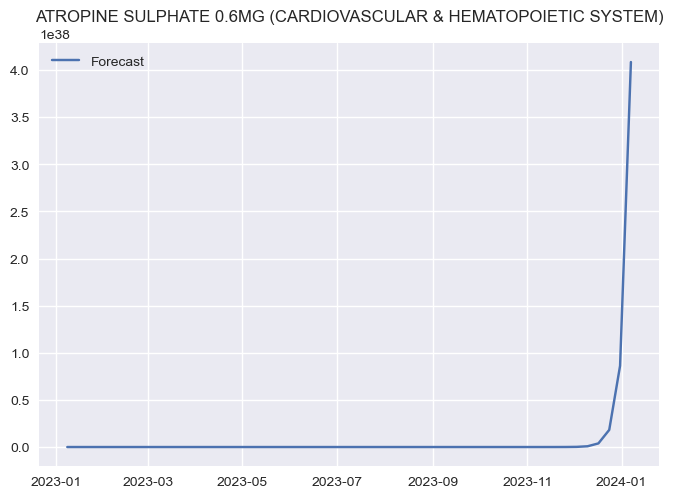


ATROPINE SULPHATE 0.6MG (CARDIOVASCULAR & HEMATOPOIETIC SYSTEM) Forecasted Quantities by Week:

         Week                                   Quantity
1484   Week 1                                    4540.54
1485   Week 2                                    9898.16
1486   Week 3                                  143323.98
1487   Week 4                                  126679.95
1488   Week 5                                 1806944.67
1489   Week 6                                 7470637.88
1490   Week 7                                29853509.24
1491   Week 8                               175185133.21
1492   Week 9                               724906588.69
1493  Week 10                              3626448977.09
1494  Week 11                             17209192266.05
1495  Week 12                             79856859413.34
1496  Week 13                            385912329043.27
1497  Week 14                           1809635844362.47
1498  Week 15                           86004872

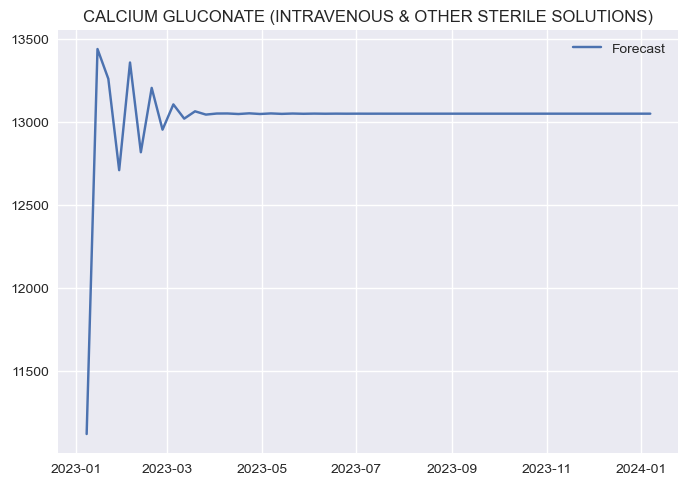


CALCIUM GLUCONATE (INTRAVENOUS & OTHER STERILE SOLUTIONS) Forecasted Quantities by Week:

         Week  Quantity
1537   Week 1  11123.72
1538   Week 2  13437.43
1539   Week 3  13258.33
1540   Week 4  12709.39
1541   Week 5  13356.49
1542   Week 6  12817.12
1543   Week 7  13203.84
1544   Week 8  12952.85
1545   Week 9  13104.63
1546  Week 10  13019.11
1547  Week 11  13063.09
1548  Week 12  13043.42
1549  Week 13  13049.77
1550  Week 14  13050.12
1551  Week 15  13046.88
1552  Week 16  13050.97
1553  Week 17  13047.03
1554  Week 18  13050.40
1555  Week 19  13047.71
1556  Week 20  13049.76
1557  Week 21  13048.25
1558  Week 22  13049.34
1559  Week 23  13048.57
1560  Week 24  13049.10
1561  Week 25  13048.74
1562  Week 26  13048.98
1563  Week 27  13048.82
1564  Week 28  13048.93
1565  Week 29  13048.86
1566  Week 30  13048.90
1567  Week 31  13048.87
1568  Week 32  13048.89
1569  Week 33  13048.88
1570  Week 34  13048.89
1571  Week 35  13048.88
1572  Week 36  13048.88
1573  Week 37  13048.

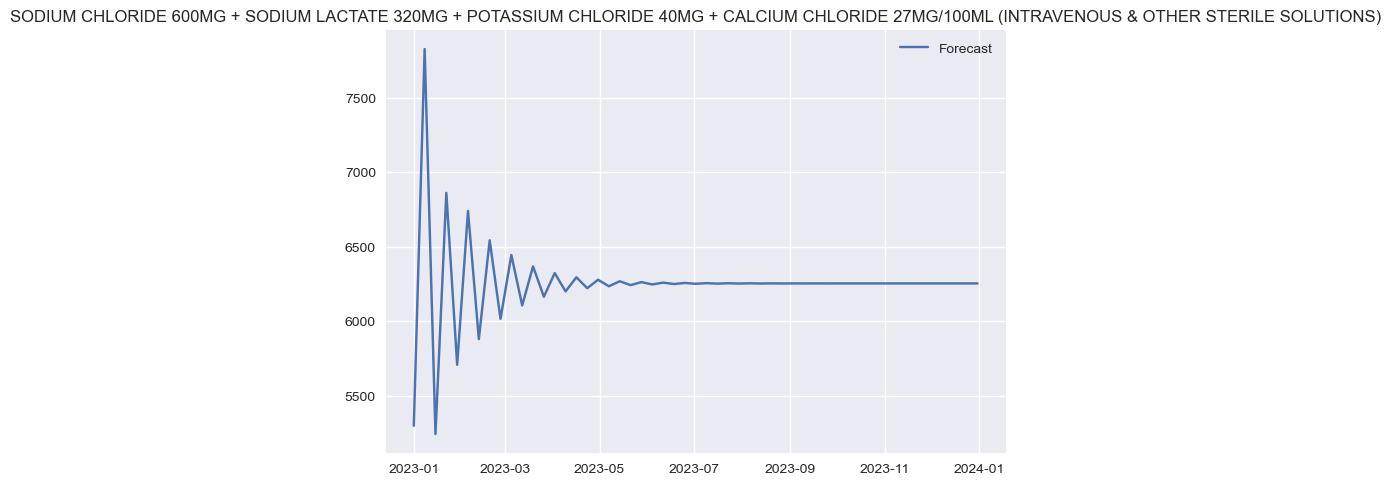


SODIUM CHLORIDE 600MG + SODIUM LACTATE 320MG + POTASSIUM CHLORIDE 40MG + CALCIUM CHLORIDE 27MG/100ML (INTRAVENOUS & OTHER STERILE SOLUTIONS) Forecasted Quantities by Week:

         Week  Quantity
1590   Week 1   5300.45
1591   Week 2   7826.11
1592   Week 3   5244.89
1593   Week 4   6861.84
1594   Week 5   5708.98
1595   Week 6   6740.80
1596   Week 7   5881.31
1597   Week 8   6543.79
1598   Week 9   6017.26
1599  Week 10   6445.14
1600  Week 11   6107.07
1601  Week 12   6368.92
1602  Week 13   6165.25
1603  Week 14   6323.90
1604  Week 15   6201.19
1605  Week 16   6295.81
1606  Week 17   6222.69
1607  Week 18   6279.26
1608  Week 19   6235.52
1609  Week 20   6269.34
1610  Week 21   6243.16
1611  Week 22   6263.44
1612  Week 23   6247.73
1613  Week 24   6259.90
1614  Week 25   6250.47
1615  Week 26   6257.78
1616  Week 27   6252.12
1617  Week 28   6256.50
1618  Week 29   6253.11
1619  Week 30   6255.74
1620  Week 31   6253.70
1621  Week 32   6255.28
1622  Week 33   6254.05
1623  Week

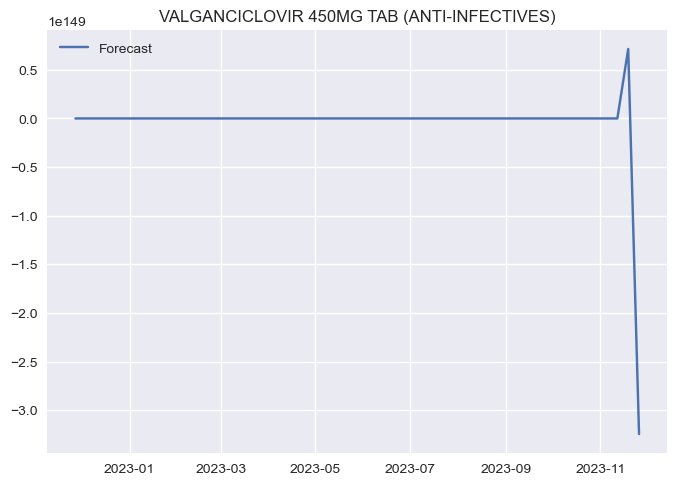


VALGANCICLOVIR 450MG TAB (ANTI-INFECTIVES) Forecasted Quantities by Week:

         Week                                           Quantity
1643   Week 1                                           23289.26
1644   Week 2                                     -5645634943.33
1645   Week 3                                       486913837.33
1646   Week 4                                2068703574952951.50
1647   Week 5                                -547591541771839.00
1648   Week 6                          -758174588273866309632.00
1649   Week 7                           335939202402064531456.00
1650   Week 8                     277869026086620853545467904.00
1651   Week 9                    -172689017838313146735919104.00
1652  Week 10              -101838270670674578826601315696640.00
1653  Week 11                81456686623954233177384419328000.00
1654  Week 12          37323456386974128393131716151569547264.00
1655  Week 13         -36511680154214236671043184396670599168.00
1656  Week 14 

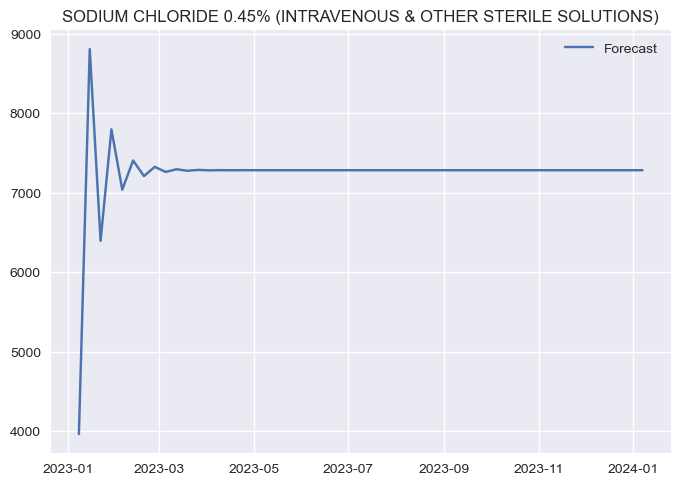


SODIUM CHLORIDE 0.45% (INTRAVENOUS & OTHER STERILE SOLUTIONS) Forecasted Quantities by Week:

         Week  Quantity
1696   Week 1   3962.17
1697   Week 2   8805.29
1698   Week 3   6391.89
1699   Week 4   7795.17
1700   Week 5   7035.99
1701   Week 6   7403.40
1702   Week 7   7206.73
1703   Week 8   7322.80
1704   Week 9   7259.29
1705  Week 10   7292.84
1706  Week 11   7273.66
1707  Week 12   7284.68
1708  Week 13   7278.88
1709  Week 14   7281.78
1710  Week 15   7280.37
1711  Week 16   7280.94
1712  Week 17   7280.83
1713  Week 18   7280.73
1714  Week 19   7280.91
1715  Week 20   7280.72
1716  Week 21   7280.90
1717  Week 22   7280.74
1718  Week 23   7280.87
1719  Week 24   7280.77
1720  Week 25   7280.84
1721  Week 26   7280.79
1722  Week 27   7280.83
1723  Week 28   7280.80
1724  Week 29   7280.82
1725  Week 30   7280.81
1726  Week 31   7280.82
1727  Week 32   7280.81
1728  Week 33   7280.81
1729  Week 34   7280.81
1730  Week 35   7280.81
1731  Week 36   7280.81
1732  Week 37   7

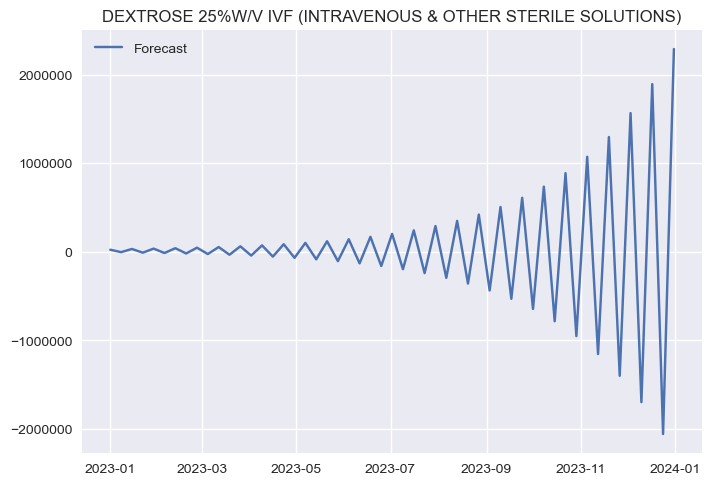


DEXTROSE 25%W/V IVF (INTRAVENOUS & OTHER STERILE SOLUTIONS) Forecasted Quantities by Week:

         Week    Quantity
1749   Week 1    24455.23
1750   Week 2    -2909.59
1751   Week 3    32926.15
1752   Week 4    -8860.28
1753   Week 5    37025.39
1754   Week 6   -12772.35
1755   Week 7    41518.93
1756   Week 8   -17893.01
1757   Week 9    47234.07
1758  Week 10   -24265.73
1759  Week 11    54333.03
1760  Week 12   -32128.31
1761  Week 13    62999.52
1762  Week 14   -41664.97
1763  Week 15    73492.84
1764  Week 16   -53211.53
1765  Week 17    86197.46
1766  Week 18   -67189.62
1767  Week 19   101576.70
1768  Week 20   -84110.68
1769  Week 21   120194.18
1770  Week 22  -104594.61
1771  Week 23   142731.69
1772  Week 24  -129391.62
1773  Week 25   170014.77
1774  Week 26  -159410.06
1775  Week 27   203042.83
1776  Week 28  -195749.50
1777  Week 29   243025.65
1778  Week 30  -239740.99
1779  Week 31   291427.72
1780  Week 32  -292995.83
1781  Week 33   350021.88
1782  Week 34  -357464.

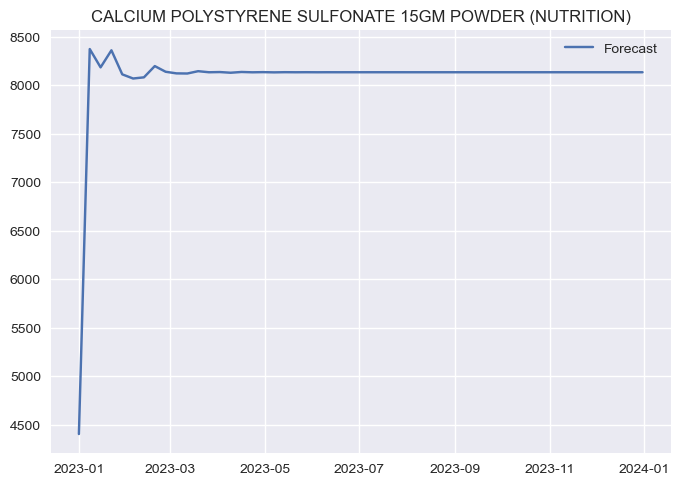


CALCIUM POLYSTYRENE SULFONATE 15GM POWDER (NUTRITION) Forecasted Quantities by Week:

         Week  Quantity
1802   Week 1   4403.66
1803   Week 2   8372.51
1804   Week 3   8183.52
1805   Week 4   8359.37
1806   Week 5   8111.45
1807   Week 6   8068.59
1808   Week 7   8080.64
1809   Week 8   8196.68
1810   Week 9   8138.18
1811  Week 10   8121.48
1812  Week 11   8120.12
1813  Week 12   8144.09
1814  Week 13   8133.01
1815  Week 14   8135.11
1816  Week 15   8128.11
1817  Week 16   8135.92
1818  Week 17   8132.56
1819  Week 18   8134.27
1820  Week 19   8131.98
1821  Week 20   8133.73
1822  Week 21   8132.99
1823  Week 22   8133.50
1824  Week 23   8132.96
1825  Week 24   8133.30
1826  Week 25   8133.14
1827  Week 26   8133.27
1828  Week 27   8133.15
1829  Week 28   8133.22
1830  Week 29   8133.19
1831  Week 30   8133.22
1832  Week 31   8133.19
1833  Week 32   8133.21
1834  Week 33   8133.20
1835  Week 34   8133.20
1836  Week 35   8133.20
1837  Week 36   8133.20
1838  Week 37   8133.20
1

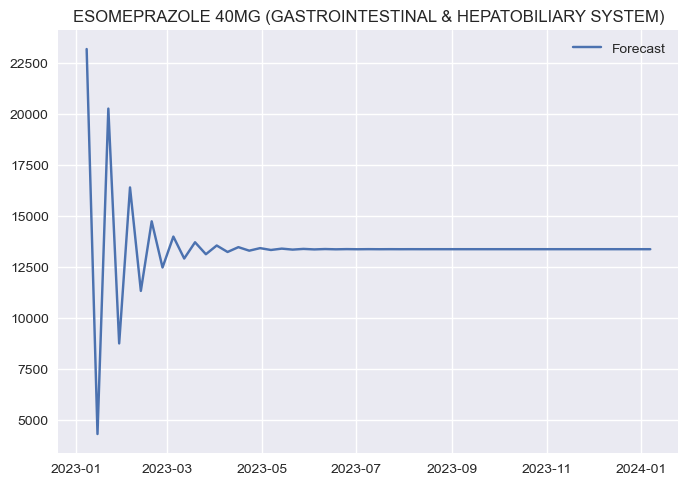


ESOMEPRAZOLE 40MG (GASTROINTESTINAL & HEPATOBILIARY SYSTEM) Forecasted Quantities by Week:

         Week  Quantity
1855   Week 1  23189.49
1856   Week 2   4288.42
1857   Week 3  20264.84
1858   Week 4   8736.08
1859   Week 5  16394.76
1860   Week 6  11314.96
1861   Week 7  14730.96
1862   Week 8  12463.88
1863   Week 9  13981.61
1864  Week 10  12904.48
1865  Week 11  13702.63
1866  Week 12  13114.92
1867  Week 13  13543.88
1868  Week 14  13226.20
1869  Week 15  13462.99
1870  Week 16  13289.65
1871  Week 17  13414.61
1872  Week 18  13324.11
1873  Week 19  13390.04
1874  Week 20  13342.36
1875  Week 21  13376.61
1876  Week 22  13351.87
1877  Week 23  13369.87
1878  Week 24  13356.81
1879  Week 25  13366.24
1880  Week 26  13359.41
1881  Week 27  13364.38
1882  Week 28  13360.77
1883  Week 29  13363.38
1884  Week 30  13361.49
1885  Week 31  13362.86
1886  Week 32  13361.87
1887  Week 33  13362.59
1888  Week 34  13362.07
1889  Week 35  13362.44
1890  Week 36  13362.17
1891  Week 37  1336

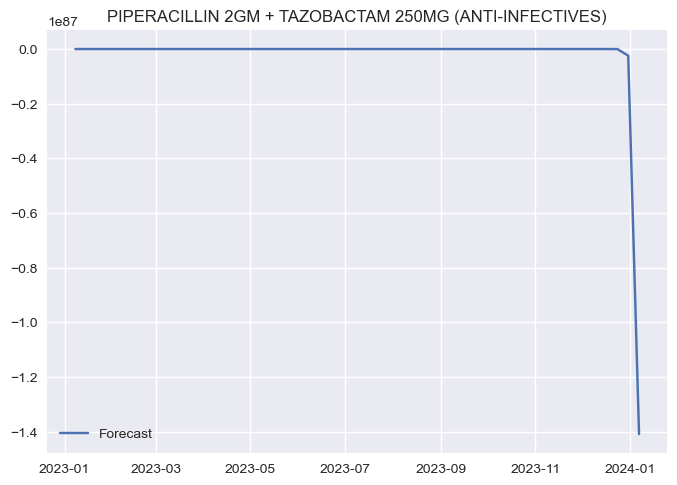


PIPERACILLIN 2GM + TAZOBACTAM 250MG (ANTI-INFECTIVES) Forecasted Quantities by Week:

         Week                                           Quantity
1908   Week 1                                          967733.41
1909   Week 2                                        57524828.99
1910   Week 3                                      2860522020.71
1911   Week 4                                    110046143247.06
1912   Week 5                                   3491665317927.57
1913   Week 6                                  85402606787774.00
1914   Week 7                                1061834341292016.50
1915   Week 8                              -40874224096076072.00
1916   Week 9                            -4026637079465488384.00
1917  Week 10                          -209370156848368910336.00
1918  Week 11                         -8438428540943634268160.00
1919  Week 12                       -279482892560293242601472.00
1920  Week 13                      -7320044893799208645033984.00
192

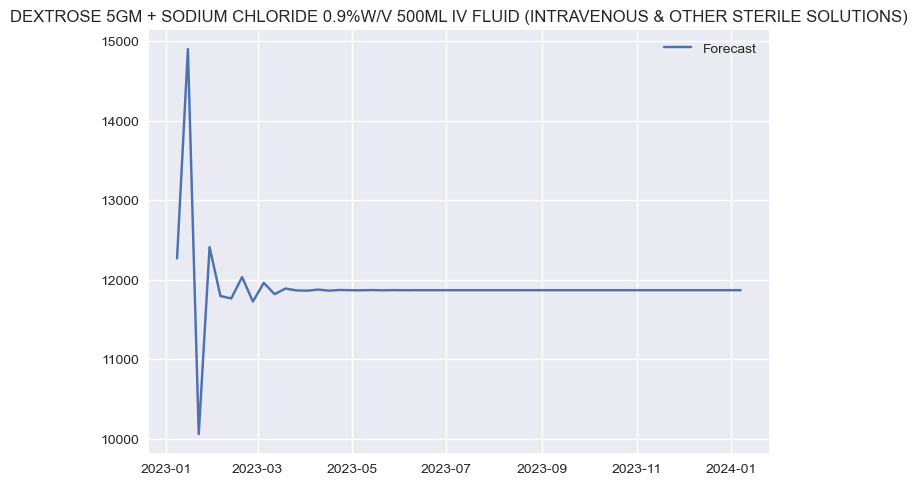


DEXTROSE 5GM + SODIUM CHLORIDE 0.9%W/V 500ML IV FLUID (INTRAVENOUS & OTHER STERILE SOLUTIONS) Forecasted Quantities by Week:

         Week  Quantity
1961   Week 1  12267.53
1962   Week 2  14901.35
1963   Week 3  10057.95
1964   Week 4  12409.85
1965   Week 5  11793.92
1966   Week 6  11763.78
1967   Week 7  12032.00
1968   Week 8  11724.97
1969   Week 9  11959.95
1970  Week 10  11817.37
1971  Week 11  11887.86
1972  Week 12  11864.95
1973  Week 13  11861.34
1974  Week 14  11874.98
1975  Week 15  11861.70
1976  Week 16  11870.15
1977  Week 17  11866.94
1978  Week 18  11866.45
1979  Week 19  11868.73
1980  Week 20  11866.12
1981  Week 21  11868.26
1982  Week 22  11866.85
1983  Week 23  11867.61
1984  Week 24  11867.30
1985  Week 25  11867.36
1986  Week 26  11867.40
1987  Week 27  11867.35
1988  Week 28  11867.37
1989  Week 29  11867.38
1990  Week 30  11867.36
1991  Week 31  11867.38
1992  Week 32  11867.36
1993  Week 33  11867.38
1994  Week 34  11867.36
1995  Week 35  11867.37
1996  Wee

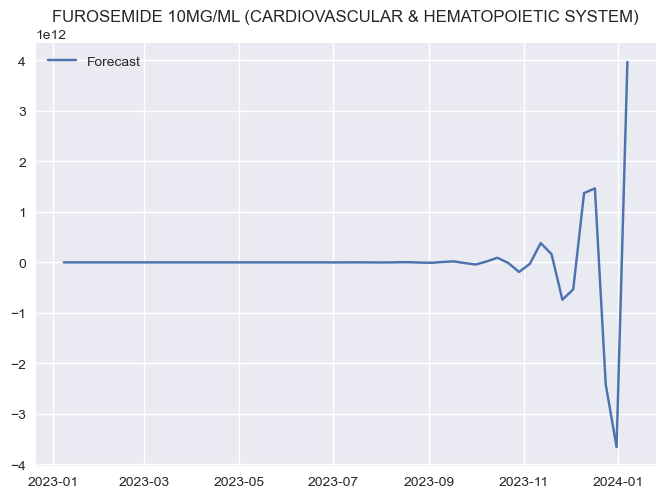


FUROSEMIDE 10MG/ML (CARDIOVASCULAR & HEMATOPOIETIC SYSTEM) Forecasted Quantities by Week:

         Week          Quantity
2014   Week 1         -19055.79
2015   Week 2          79181.93
2016   Week 3         109318.23
2017   Week 4         -51591.14
2018   Week 5        -187487.76
2019   Week 6         136343.01
2020   Week 7         471738.52
2021   Week 8         -71470.68
2022   Week 9        -934867.21
2023  Week 10         -26119.70
2024  Week 11        1961716.68
2025  Week 12         661853.03
2026  Week 13       -3789293.08
2027  Week 14       -2301703.40
2028  Week 15        7200465.79
2029  Week 16        6738925.96
2030  Week 17      -12886010.24
2031  Week 18      -17216091.58
2032  Week 19       21823242.42
2033  Week 20       41257324.16
2034  Week 21      -33541730.00
2035  Week 22      -93551702.06
2036  Week 23       43560572.01
2037  Week 24      203602405.65
2038  Week 25      -34276607.52
2039  Week 26     -426538887.42
2040  Week 27      -44817021.58
2041  Week 2

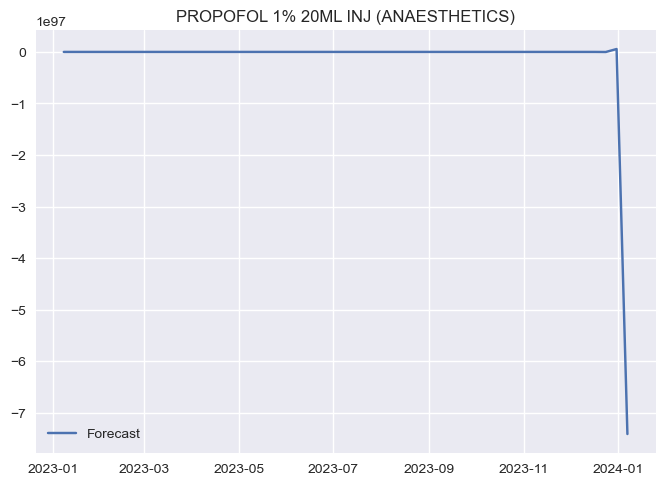


PROPOFOL 1% 20ML INJ (ANAESTHETICS) Forecasted Quantities by Week:

         Week                                           Quantity
2067   Week 1                                            6023.31
2068   Week 2                                           21936.89
2069   Week 3                                        -2800027.17
2070   Week 4                                        84263710.55
2071   Week 5                                    -12728802121.27
2072   Week 6                                    384719904585.56
2073   Week 7                                 -57758171279322.62
2074   Week 8                                1756487538823394.00
2075   Week 9                             -262085689815818752.00
2076  Week 10                             8019088875290591232.00
2077  Week 11                         -1189261467320965922816.00
2078  Week 12                         36608743630345940762624.00
2079  Week 13                      -5396541717358592141557760.00
2080  Week 14        

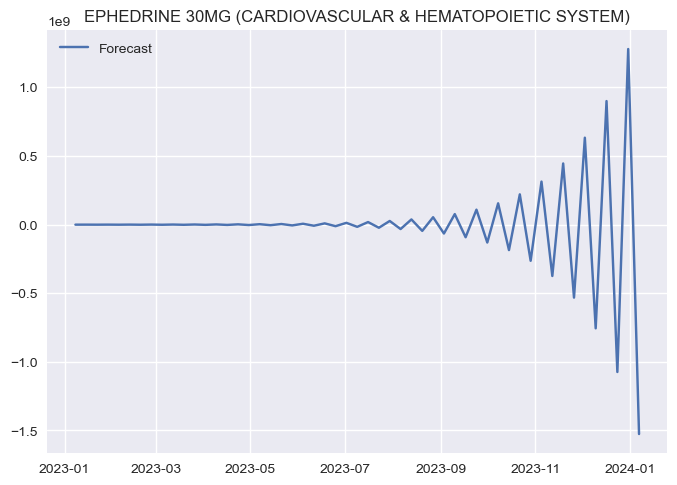


EPHEDRINE 30MG (CARDIOVASCULAR & HEMATOPOIETIC SYSTEM) Forecasted Quantities by Week:

         Week       Quantity
2120   Week 1      -61429.30
2121   Week 2       63980.03
2122   Week 3     -224105.38
2123   Week 4      182132.39
2124   Week 5     -359918.44
2125   Week 6      327966.78
2126   Week 7     -524694.69
2127   Week 8      508435.26
2128   Week 9     -732633.18
2129  Week 10      749972.05
2130  Week 11    -1016473.23
2131  Week 12     1085631.32
2132  Week 13    -1415532.61
2133  Week 14     1560973.45
2134  Week 15    -1982405.57
2135  Week 16     2237285.93
2136  Week 17    -2789350.47
2137  Week 18     3199979.72
2138  Week 19    -3937676.39
2139  Week 20     4569515.03
2140  Week 21    -5570814.64
2141  Week 22     6516790.04
2142  Week 23    -7892476.27
2143  Week 24     9284674.46
2144  Week 25   -11192234.50
2145  Week 26    13218426.27
2146  Week 27   -15881731.02
2147  Week 28    18808819.32
2148  Week 29   -22546066.36
2149  Week 30    26753393.12
2150  Week 31

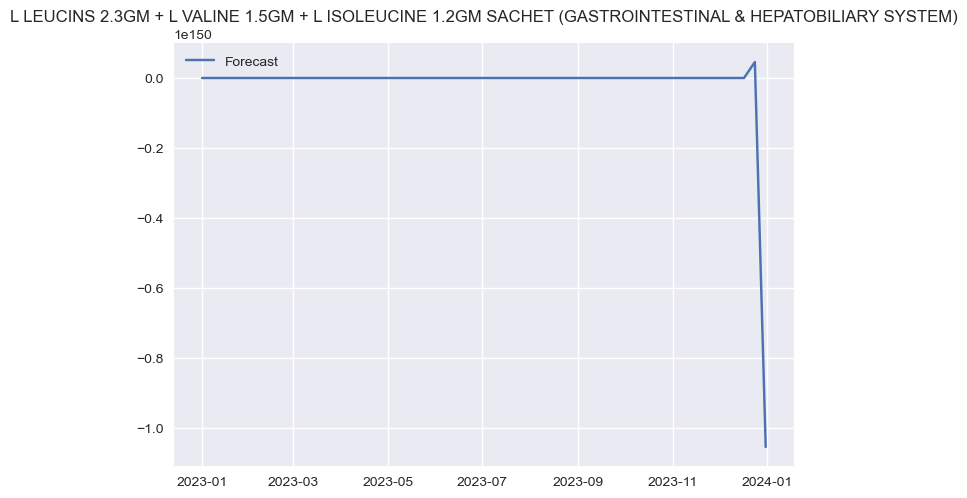


L LEUCINS 2.3GM + L VALINE 1.5GM + L ISOLEUCINE 1.2GM SACHET (GASTROINTESTINAL & HEPATOBILIARY SYSTEM) Forecasted Quantities by Week:

         Week                                           Quantity
2173   Week 1                                            6742.80
2174   Week 2                                     -8726435670.84
2175   Week 3                                     26834752087.38
2176   Week 4                                3089256421661476.00
2177   Week 5                              -11982729373231322.00
2178   Week 6                         -1092928475245814743040.00
2179   Week 7                          5114217263086735196160.00
2180   Week 8                     386659360403302186903142400.00
2181   Week 9                   -2118859323926369469158391808.00
2182  Week 10              -136793206066300848524047918563328.00
2183  Week 11               859125925491286414387688501149696.00
2184  Week 12          48394916165600368801126202689177255936.00
2185  Week 13      

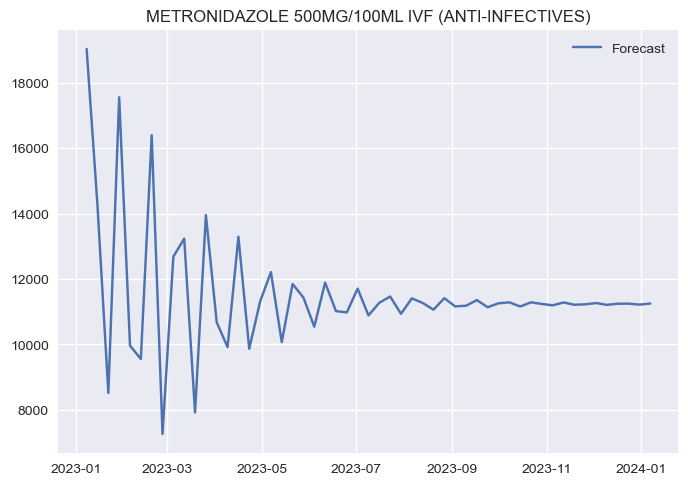


METRONIDAZOLE 500MG/100ML IVF (ANTI-INFECTIVES) Forecasted Quantities by Week:

         Week  Quantity
2226   Week 1  19033.71
2227   Week 2  14242.48
2228   Week 3   8518.82
2229   Week 4  17557.09
2230   Week 5   9963.92
2231   Week 6   9557.24
2232   Week 7  16398.10
2233   Week 8   7261.88
2234   Week 9  12688.32
2235  Week 10  13235.50
2236  Week 11   7922.50
2237  Week 12  13957.29
2238  Week 13  10676.55
2239  Week 14   9921.04
2240  Week 15  13293.01
2241  Week 16   9868.55
2242  Week 17  11308.71
2243  Week 18  12212.15
2244  Week 19  10071.04
2245  Week 20  11849.36
2246  Week 21  11431.97
2247  Week 22  10545.28
2248  Week 23  11890.87
2249  Week 24  11019.94
2250  Week 25  10981.30
2251  Week 26  11707.71
2252  Week 27  10889.35
2253  Week 28  11276.17
2254  Week 29  11466.20
2255  Week 30  10938.76
2256  Week 31  11409.16
2257  Week 32  11270.50
2258  Week 33  11064.41
2259  Week 34  11415.36
2260  Week 35  11164.37
2261  Week 36  11184.60
2262  Week 37  11357.14
2263  W

In [179]:
'''
This code employs a Vector Error Correction Model (VECM) to forecast future quantities for the top-selling drugs
in a dataset. It begins by loading the data into a DataFrame, converting the date column to a datetime format,
and setting it as the index. The code then selects the top 50 selling drug names and their corresponding subcategories.
For each drug, it resamples the data to a weekly frequency, checks for stationarity using the Augmented Dickey-Fuller
(ADF) test, and applies differencing if necessary. A VECM model is fit to the preprocessed data with a lag of 1, and
the next 53 weeks are forecasted. The forecasted quantities are stored and visualized using a line plot, and the results
are printed for each drug and subcategory.
'''
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import VECM
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the data into a DataFrame
data = pd.read_csv("opt.csv")

# Convert the date column to a datetime format and set it as the index
data['Dateofbill'] = pd.to_datetime(data['Dateofbill'])
data.set_index('Dateofbill', inplace=True)

# Get the top selling drug names and their corresponding subcategories
drug_names = data.groupby(['DrugName', 'SubCat1'])['Quantity'].sum().sort_values(ascending=False)[:50].index.tolist()

# Create a DataFrame to store the forecast results
forecast_df = pd.DataFrame(columns=['DrugName', 'SubCat1', 'Week', 'Quantity'])

# Loop through each drug name and forecast the next 53 weeks
for drug_name, subcat1 in drug_names:
  # Filter the data for the current drug name and subcategory
  drug_data = data[(data['DrugName'] == drug_name) & (data['SubCat1'] == subcat1)]

  # Resample the data to weekly frequency and fill any missing values with interpolation
  drug_data = drug_data.resample('W').sum().interpolate()

  # Perform Augmented Dickey-Fuller (ADF) test to check for stationarity
  adf_test = adfuller(drug_data['Quantity'])
  print(f"ADF test p-value for {drug_name} ({subcat1}): {adf_test[1]}")

  # If the p-value is greater than 0.05, the series is not stationary and needs differencing
  if adf_test[1] > 0.05:
    # Apply differencing by one time step
    drug_data['Quantity'] = drug_data['Quantity'].diff().diff()
    drug_data = drug_data.dropna()

  # Fit the VECM model with a lag of 1
  try:
    model = VECM(drug_data, k_ar_diff=1)
    model_fit = model.fit()
  except Exception as e:
    print(e)
    continue


  #model_fit.gamma = model_fit.gamma.astype('float64')
  model_fit.gamma = np.real(model_fit.gamma)

  # Forecast the next 53 weeks
  forecast = model_fit.predict(steps=53)

  # Store the forecast results in the DataFrame
  for i, quantity in enumerate(forecast[:,0]):
    week_start = drug_data.index[-1] + pd.Timedelta(days=7)
    week_end = week_start + pd.Timedelta(days=6)
    forecast_df = forecast_df.append({'DrugName': drug_name, 'SubCat1': subcat1, 'Week': f"Week {i+1}", 'Quantity': quantity}, ignore_index=True)

  # Create a variable containing the forecasted values for each week
  forecast_plot = pd.Series(forecast[:,0], index=pd.date_range(start=week_start, periods=53, freq='W'))
  plt.plot(forecast_plot, label='Forecast')

  plt.title(f"{drug_name} ({subcat1})")
  plt.legend()
  plt.show()

  # Print the forecasted quantities by week
  print(f"\n{drug_name} ({subcat1}) Forecasted Quantities by Week:\n")
  print(forecast_df[(forecast_df['DrugName']==drug_name) & (forecast_df['SubCat1']==subcat1)][['Week', 'Quantity']].astype({'Quantity': 'float'}))